# Unsupervised Learning: Trade&Ahead

**Marks: 60**

Submitted by : Neha Biswas

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## **Importing necessary libraries**

In [1]:
# Importing libraries for reading the data manipulation:
import numpy as np
import pandas as pd

# Importing libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
# Removes the limit for the number of displayed columns:
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows:
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
# Scaling the data using z-score:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Computing the distances:
from scipy.spatial.distance import cdist, pdist

In [ ]:
# Functions for performing k-means clustering and computing silhouette scores:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function for visualizing the elbow curve and silhouette scores:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# Functions for performing hierarchical clustering, computing cophenetic correlation, and creating dendrograms:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [ ]:
from time import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Function Definition for different functions used**

In [ ]:
# Function to create histogram and box plots:
def creating_hist_box(df, feature, kde= True, bins=None, figsize =(10, 4)):
      f2, (ax_hist, ax_box) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
      f2.tight_layout(pad=5.0)

      if bins:
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist, bins=bins)
        ax_hist.set_title(f'Histogram with bins = {bins}')
      else:
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist)
        ax_hist.set_title(f'Histogram with default no of bins.')

      sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, color="violet")
      ax_box.set_title('Boxplot')

In [ ]:
# Function to create labeled barplots:
def labeled_barplot(data, feature, perc=False, n=None, rotatn=0):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    rotatn: how to display x labels (default is horizontally(0), vertically(90))
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=rotatn,fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot


        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## **Loading the dataset**

In [ ]:
# Loading the data:
trade_df = pd.read_csv('/content/drive/MyDrive/Univ_Texas/Unsupervised_Learning/Project/stock_data.csv')

## **Data Overview**

In [ ]:
# Displaying first 5 rows of the dataset:
trade_df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines       42.35000       9.99999     1.68715  135   
1        Pharmaceuticals       59.24000       8.33943     2.19789  130   
2  Health Care Equipment       44.91000      11.30112     1.27365   21   
3   Application Software       93.94000      13.97720     1.35768    9   
4         Semiconductors       55.32000      -1.82786     1.70117   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000            11.39000   
1          77       51000000  5144000000             3.15000   
2          67      938000000  4423000000             2.94000   
3         180     -240840000   629551000             1.26000   
4         272      315120000   696878000             0.31000   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0               668129938.50000    3.71817   -8.78422  
1              1633015873.00000   18.80635   -8.75007  
2              1504421769.00000   15.27551   -0.39417  
3               499643650.80000   74.55556    4.19965  
4              2247993548.00000  178.45161    1.05981

In [ ]:
# Displaying the last 5 rows of the dataset:
trade_df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services       33.26000      14.88773     1.84515   
336                   Restaurants       52.51618      -8.69892     1.47888   
337         Health Care Equipment      102.59000       9.34768     1.40421   
338                Regional Banks       27.30000      -1.15859     1.46818   
339               Pharmaceuticals       47.92000      16.67884     1.61028   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000            -4.64000   
336  142          27      159000000  1293000000             2.97000   
337    1         100      376000000   147000000             0.78000   
338    4          99      -43623000   309471000             1.20000   
339   32          65      272000000   339000000             0.68000   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335               939457327.60000   28.97619    6.26177  
336               435353535.40000   17.68221   -3.83826  
337               188461538.50000  131.52564  -23.88445  
338               257892500.00000   22.75000   -0.06310  
339               498529411.80000   70.47059    1.72307

In [ ]:
# Checking shape of the dataset:
trade_df.shape
print(f'No. of rows in the dataset: {trade_df.shape[0]}')
print(f'No. of columns in the dataset: {trade_df.shape[1]}')

No. of rows in the dataset: 340
No. of columns in the dataset: 15


In [ ]:
# Info table: Checking the datatypes of the columns for the dataset:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
# Checking percentage of missing values:
trade_df.isnull().sum()/trade_df.shape[0]

Ticker Symbol                  0.00000
Security                       0.00000
GICS Sector                    0.00000
GICS Sub Industry              0.00000
Current Price                  0.00000
Price Change                   0.00000
Volatility                     0.00000
ROE                            0.00000
Cash Ratio                     0.00000
Net Cash Flow                  0.00000
Net Income                     0.00000
Earnings Per Share             0.00000
Estimated Shares Outstanding   0.00000
P/E Ratio                      0.00000
P/B Ratio                      0.00000
dtype: float64

In [ ]:
# Checking for duplicate rows:
trade_df.duplicated().sum()

0

Observations:

*   The data frame has 15 columns. The data comprises stock prices and some financial indicators for a few companies listed under the New York Stock Exchange.
*   There are 340 rows and 15 columns in the dataset.
*   The columns have int, float, and object datatypes.
*   4 columns that are of object datatype are 'Ticker Symbol', 'Security', 'GICS Sector', and 'GICS Sub Industry'.
*   4 columns that are of int datatype are 'ROE', 'Cash Ratio', 'Net Cash Flow' and 'Net Income'.
*   7 columns that are of float datatype are 'Current Price', 'Price Change', 'Volatility', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', and 'P/B Ratio'.
*   There are no missing values of data in any of the columns.
*   There are no duplicate records in the dataset.


In [ ]:
# Making a copy of the datset to prevent causing any changes in the original dataset,
# We will use the copied dataset for futher analysis:
df = trade_df.copy()

## **Exploratory Data Analysis (EDA)**


### **Statistical Summary of the data**

In [ ]:
# Statistical summary of the dataset:
df.describe().T

count             mean              std  \
Current Price                340.00000         80.86234         98.05509   
Price Change                 340.00000          4.07819         12.00634   
Volatility                   340.00000          1.52598          0.59180   
ROE                          340.00000         39.59706         96.54754   
Cash Ratio                   340.00000         70.02353         90.42133   
Net Cash Flow                340.00000   55537620.58824 1946365312.17579   
Net Income                   340.00000 1494384602.94118 3940150279.32794   
Earnings Per Share           340.00000          2.77666          6.58778   
Estimated Shares Outstanding 340.00000  577028337.75403  845849595.41769   
P/E Ratio                    340.00000         32.61256         44.34873   
P/B Ratio                    340.00000         -1.71825         13.96691   

                                            min              25%  \
Current Price                           4.50000         38.55500   
Price Change                          -47.12969         -0.93948   
Volatility                              0.73316          1.13488   
ROE                                     1.00000          9.75000   
Cash Ratio                              0.00000         18.00000   
Net Cash Flow                -11208000000.00000 -193906500.00000   
Net Income                   -23528000000.00000  352301250.00000   
Earnings Per Share                    -61.20000          1.55750   
Estimated Shares Outstanding     27672156.86000  158848216.10000   
P/E Ratio                               2.93545         15.04465   
P/B Ratio                             -76.11908         -4.35206   

                                         50%              75%  \
Current Price                       59.70500         92.88000   
Price Change                         4.81950         10.69549   
Volatility                           1.38559          1.69555   
ROE                                 15.00000         27.00000   
Cash Ratio                          47.00000         99.00000   
Net Cash Flow                  2098000.00000  169810750.00000   
Net Income                   707336000.00000 1899000000.00000   
Earnings Per Share                   2.89500          4.62000   
Estimated Shares Outstanding 309675137.80000  573117457.32500   
P/E Ratio                           20.81988         31.76476   
P/B Ratio                           -1.06717          3.91707   

                                           max  
Current Price                       1274.94995  
Price Change                          55.05168  
Volatility                             4.58004  
ROE                                  917.00000  
Cash Ratio                           958.00000  
Net Cash Flow                20764000000.00000  
Net Income                   24442000000.00000  
Earnings Per Share                    50.09000  
Estimated Shares Outstanding  6159292035.00000  
P/E Ratio                            528.03907  
P/B Ratio                            129.06459

In [ ]:
# Statistical summary of the dataset for 'object' columns:
df.describe(include='object').T

count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

Observations:

*   There are 340 unique stocks in the dataset.
*   There are 340 unique companies in the dataset.
*   There are 11 unique sectors in the dataset. The most popular sector on the dataset is the Industrials sector.
*   There are 104 unique sub-industries in the dataset. The most popular sub-industry is Oil & Gas Exploration & Production.
*   Current stock prices range from \$4.5 to \$1274.95. The majority of the stocks are priced under \$ 92.88.
*   Price changes range from -47.13% to 55.05%. The negative price change implies a drop in the stock prices over the last 13 weeks time period.
*   There are stocks with very high volatility(value at 4.58).
*   Many columns have a skew in them as the mean values are much higher than the median values.
*   There are companies in the dataset with negative net income, and
 net cash flow, earnings per share, and P/B Ratio.
*   The range for many columns is large suggesting there are outliers in the data.






### **Univariate Analysis**

#### Current Price

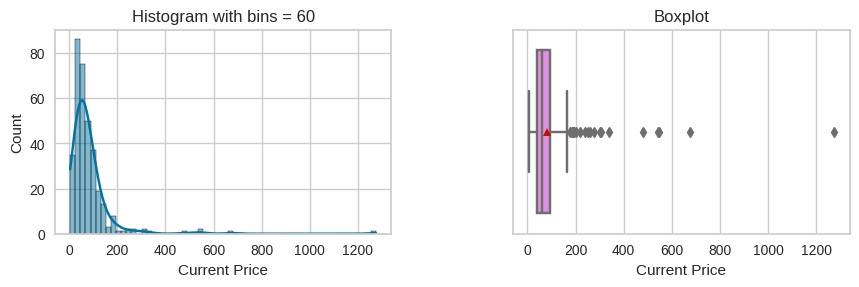

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Current Price':
creating_hist_box(df, 'Current Price' , kde= True, bins=60)

In [ ]:
df['Current Price'].describe()

count    340.00000
mean      80.86234
std       98.05509
min        4.50000
25%       38.55500
50%       59.70500
75%       92.88000
max     1274.94995
Name: Current Price, dtype: float64

Observations:

*   The distribution for the current stock price is highly right-skewed.
*   The average current stock price is \$80.86 which is more than the median prevailing wage at \$59.70.
*   The minimum current stock price is \$4.50 while the maximum current stock price is \$1274.95.
*   The standard deviation is \$98.05.
*   There are outlier values on the higher end of the distribution for the column 'Current Price'.
*   Majority of the stocks have current price within \$200.

#### Price Change

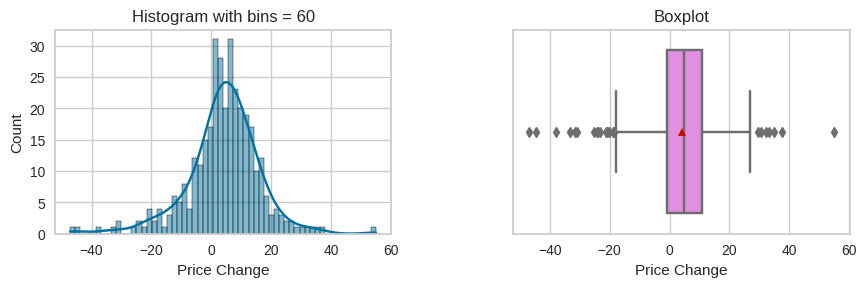

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Price Change':
creating_hist_box(df, 'Price Change' , kde= True, bins=60)

In [ ]:
df['Price Change'].describe()

count   340.00000
mean      4.07819
std      12.00634
min     -47.12969
25%      -0.93948
50%       4.81950
75%      10.69549
max      55.05168
Name: Price Change, dtype: float64

Observations:

*   The distribution for percentage change in stock prices in 13 weeks is almost symmetrical.
*   The average change in stock prices is around 4.08% which is close to the median at 4.82%.
*   The minimum percentage change in stock prices is -47.13 while the maximum is 55.05.
*   The standard deviation is 12.01%.
*   There are outlier values on both the lower and higher end of the distribution for the column 'Price Change'.

#### Volatility

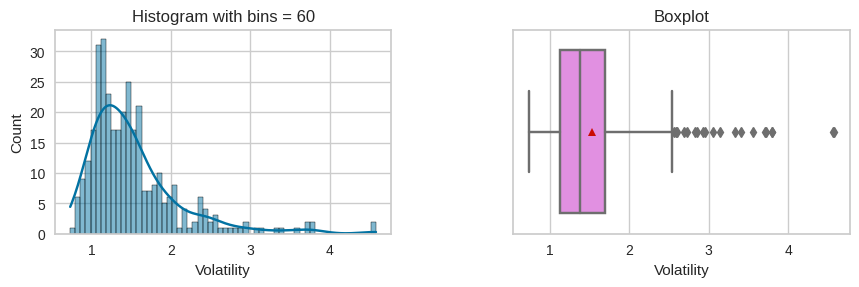

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Volatility':
creating_hist_box(df, 'Volatility' , kde= True, bins=60)

In [ ]:
df['Volatility'].describe()

count   340.00000
mean      1.52598
std       0.59180
min       0.73316
25%       1.13488
50%       1.38559
75%       1.69555
max       4.58004
Name: Volatility, dtype: float64

Observations:

*   The distribution for the standard deviation of the stock prices over the past 13 weeks is right skewed.
*   The average standard deviation of the stock price over the past 13 weeks is \$1.52 which is more than the median value at \$1.38.
*   The minimum volatility is \$0.73 while the maximum volatility is \$4.58.
*   The standard deviation of the column is \$0.59.
*   There are outlier values on the higher end of the distribution for the column 'Volatility'.

#### ROE

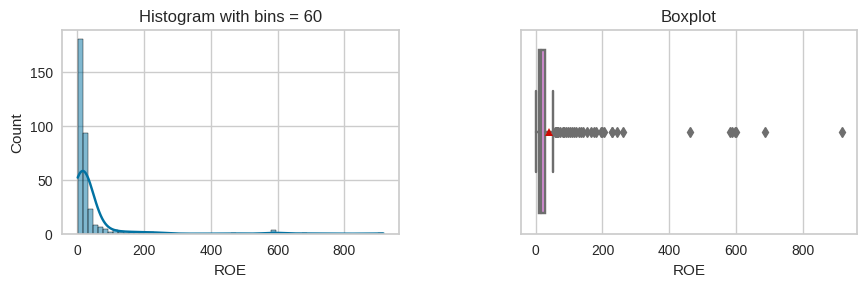

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'ROE':
creating_hist_box(df, 'ROE' , kde= True, bins=60)

In [ ]:
df['ROE'].describe()

count   340.00000
mean     39.59706
std      96.54754
min       1.00000
25%       9.75000
50%      15.00000
75%      27.00000
max     917.00000
Name: ROE, dtype: float64

Observations:

*   The distribution for the current stock price is highly right-skewed.
*   The average value of 'ROE' is 39.60 which is more than twice the median value at 15.00.
*   The minimum value for 'ROE' is 1.00 while the maximum value is 917.00.
*   The standard deviation is 96.55.
*   There are outlier values on the higher end of the distribution for the column 'ROE'.

#### Cash Ratio

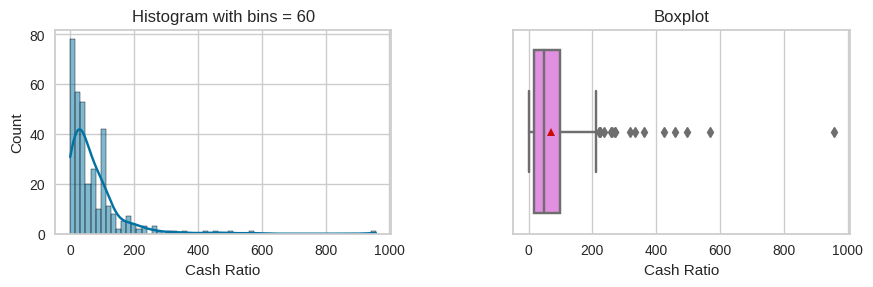

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Cash Ratio':
creating_hist_box(df, 'Cash Ratio' , kde= True, bins=60)

In [ ]:
df['Cash Ratio'].describe()

count   340.00000
mean     70.02353
std      90.42133
min       0.00000
25%      18.00000
50%      47.00000
75%      99.00000
max     958.00000
Name: Cash Ratio, dtype: float64

Observations:

*   The distribution for the ratio of a company's total reserves of cash and cash equivalents to its total current liabilities is highly right-skewed.
*   The average value of cash ratio is 70.02 which is more than the median value at 47.00.
*   The minimum value for the cash ratio is 0.00 while the maximum value is 958.00.
*   The standard deviation is 90.42.
*   There are outlier values on the higher end of the distribution for the column 'Cash Ratio'.
*   Majority of the companies have a cash ratio of under 200.


#### Net Cash Flow

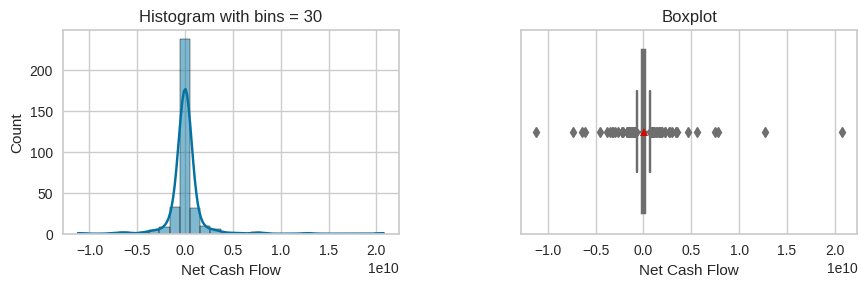

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Net Cash Flow':
creating_hist_box(df, 'Net Cash Flow' , kde= True, bins=30)

In [ ]:
df['Net Cash Flow'].describe()

count            340.00000
mean        55537620.58824
std       1946365312.17579
min     -11208000000.00000
25%       -193906500.00000
50%          2098000.00000
75%        169810750.00000
max      20764000000.00000
Name: Net Cash Flow, dtype: float64

Observations:

*   The distribution for the difference between a company's cash inflows and outflows is right-skewed (as the mean value is a lot greater than the median).
*   The average value of net cash flow is \$55537620.59 which is more than the median value at \$2098000.00.
*   The minimum value for net cash flow is -\$11208000000.00 while the maximum value is \$20764000000.00.
*   The standard deviation is \$194635812.17.
*   There are outlier values on both the higher and lower ends of the distribution for the column 'Net Cash Flow'.

#### Net Income

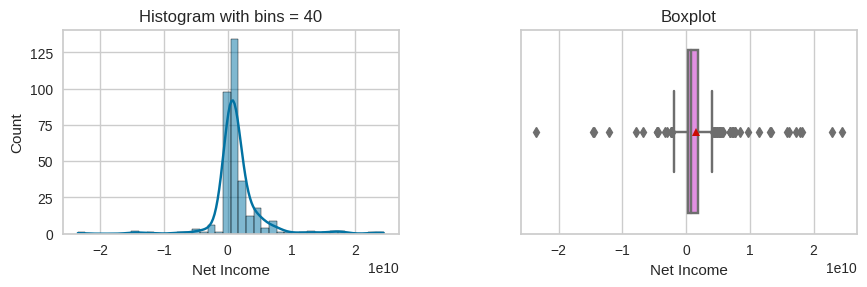

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Net Income':
creating_hist_box(df, 'Net Income' , kde= True, bins=40)

In [ ]:
df['Net Income'].describe()

count            340.00000
mean      1494384602.94118
std       3940150279.32794
min     -23528000000.00000
25%        352301250.00000
50%        707336000.00000
75%       1899000000.00000
max      24442000000.00000
Name: Net Income, dtype: float64

Observations:

*   The distribution for the net income of a company is right-skewed.
*   The average value of net income is \$1494384602.94 which is more than twice the median value at \$707336000.00.
*   The minimum value for net cash flow is -\$23528000000.00 while the maximum value is \$244420000000.00.
*   The standard deviation is \$3940150279.33.
*   There are outlier values on both the higher and lower ends of the distribution for the column 'Net Cash Flow'.

#### Earning Per Share

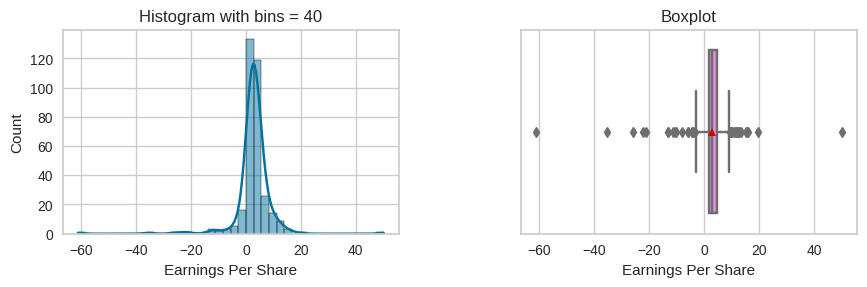

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Earnings Per Share':
creating_hist_box(df, 'Earnings Per Share' , kde= True, bins=40)

In [ ]:
df['Earnings Per Share'].describe()

count   340.00000
mean      2.77666
std       6.58778
min     -61.20000
25%       1.55750
50%       2.89500
75%       4.62000
max      50.09000
Name: Earnings Per Share, dtype: float64

Observations:

*   The distribution for the earnings per share is almost symmetrical.
*   The average value of the earning per share is \$2.78 which is close to the median value at \$2.89.
*   The minimum value for the earning per share is -\$61.20 while the maximum value is \$50.09.
*   The standard deviation is \$6.59.
*   There are outlier values on both the higher and lower ends of the distribution for the column 'Earnings Per Share'.

#### Estimated Shares Outstanding

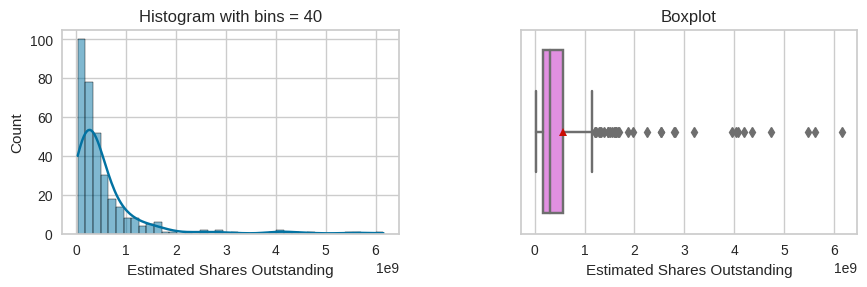

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Estimated Shares Outstanding':
creating_hist_box(df, 'Estimated Shares Outstanding' , kde= True, bins=40)

In [ ]:
df['Estimated Shares Outstanding'].describe()

count          340.00000
mean     577028337.75403
std      845849595.41769
min       27672156.86000
25%      158848216.10000
50%      309675137.80000
75%      573117457.32500
max     6159292035.00000
Name: Estimated Shares Outstanding, dtype: float64

Observations:

*   The distribution for the company's stocks currently held by all its shareholders is right-skewed.
*   The average value of estimated outstanding shares is \$577028337.75 which is more than the median value at \$309675137.80.
*   The minimum value for estimated outstanding shares is \$27672156.86 while the maximum value is \$6159292035.00.
*   The standard deviation is \$845849595.42.
*   There are outlier values on the higher end of the distribution for the column 'Estimated Shares Outstanding'.


#### P/E Ratio

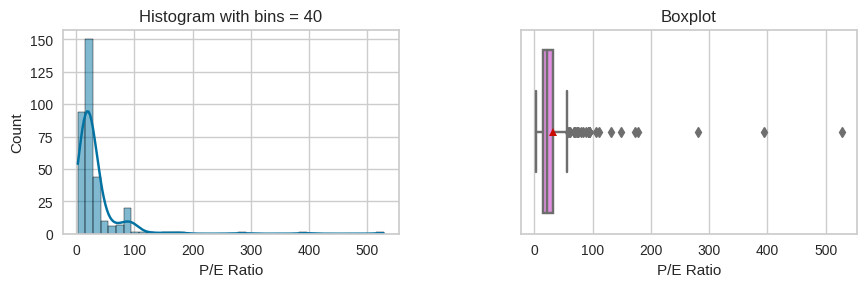

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'P/E Ratio':
creating_hist_box(df, 'P/E Ratio' , kde= True, bins=40)

In [ ]:
df['P/E Ratio'].describe()

count   340.00000
mean     32.61256
std      44.34873
min       2.93545
25%      15.04465
50%      20.81988
75%      31.76476
max     528.03907
Name: P/E Ratio, dtype: float64

Observations:

*   The distribution for the ratio of a company's current stock price to the earnings per share is right-skewed.
*   The average value of the P/E Ratio is 32.61 which is more than the median value at 20.82.
*   The minimum value for P/E Ratio is 2.93 while the maximum value is 528.04.
*   The standard deviation is 44.35.
*   There are outlier values on the higher end of the distribution for the column 'P/E Ratio'.

#### P/B Ratio

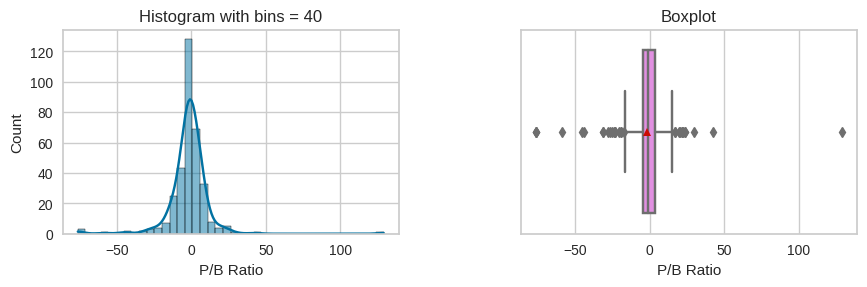

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'P/B Ratio':
creating_hist_box(df, 'P/B Ratio' , kde= True, bins=40)

In [ ]:
df['P/B Ratio'].describe()

count   340.00000
mean     -1.71825
std      13.96691
min     -76.11908
25%      -4.35206
50%      -1.06717
75%       3.91707
max     129.06459
Name: P/B Ratio, dtype: float64

Observations:

*   The distribution for the ratio of the company's stock price per share to its book value per share is almost symmetrical.
*   The average value of the P/B Ratio is -1.72 which is close to the median value at -1.07.
*   The minimum value for P/B Ratio is -76.12 while the maximum value is 129.06.
*   The standard deviation is 13.97.
*   There are outlier values on both the higher and lower ends of the distribution for the column 'P/B Ratio'.

#### GICS Sector

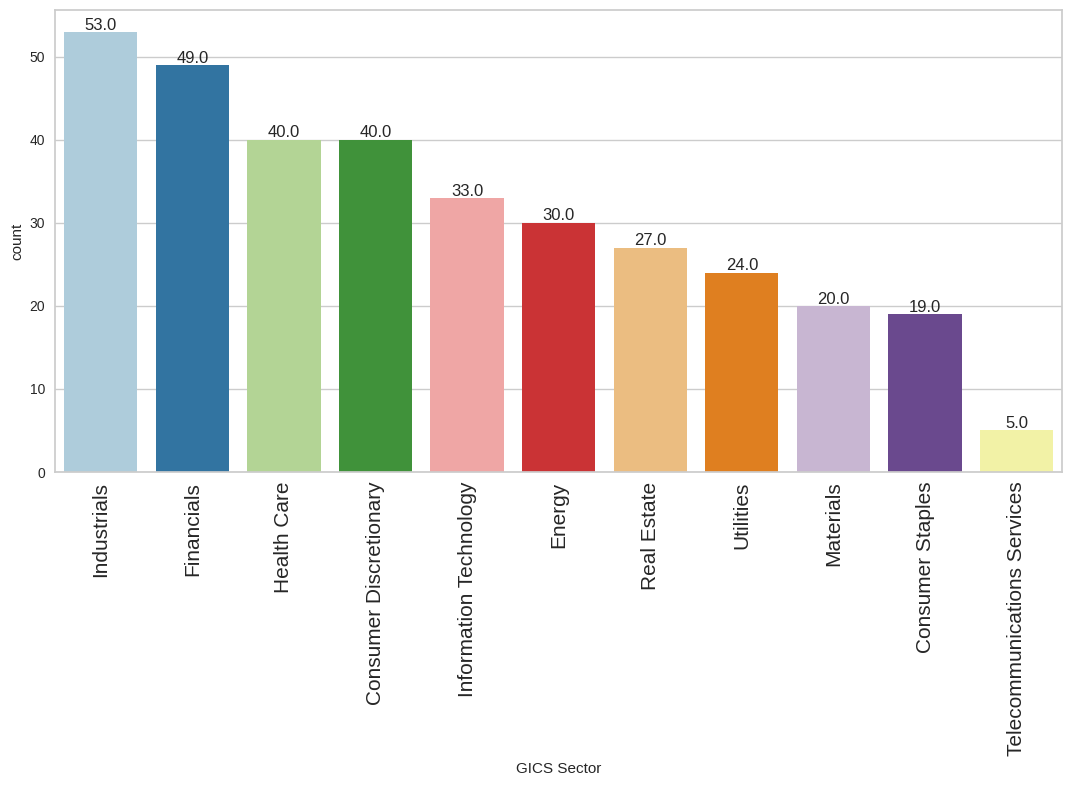

In [ ]:
# Barplot for the cloumn 'GICS Sector' in the dataset:
labeled_barplot(df, 'GICS Sector', perc=False, rotatn=90)

Observations:

*   Industrials Sector has the most number of stocks in the dataset while Telecommunication Services have the least.
*   Five most popular economic sectors in the dataset are:

Economic Sector | No. of stocks | Percentage of stocks (%)
-|-|-
Industrials | 53 | 15.6
Financials | 49 | 14.4
Health Care | 40 | 11.8
Consumer Discretionary | 40 | 11.8
Information Technology | 33 | 9.7

*   Five least popular  economic sectors in the dataset are:

Economic Sector | No. of stocks | Percentage of stocks (%)
-|-|-
Telecommunications Sevices | 5 | 1.5
Consumer Staples | 19 | 5.6
Materials | 20 | 5.9
Utilities | 24 | 7.1
Real Estate | 27 | 7.9



#### GICS Sub Industry

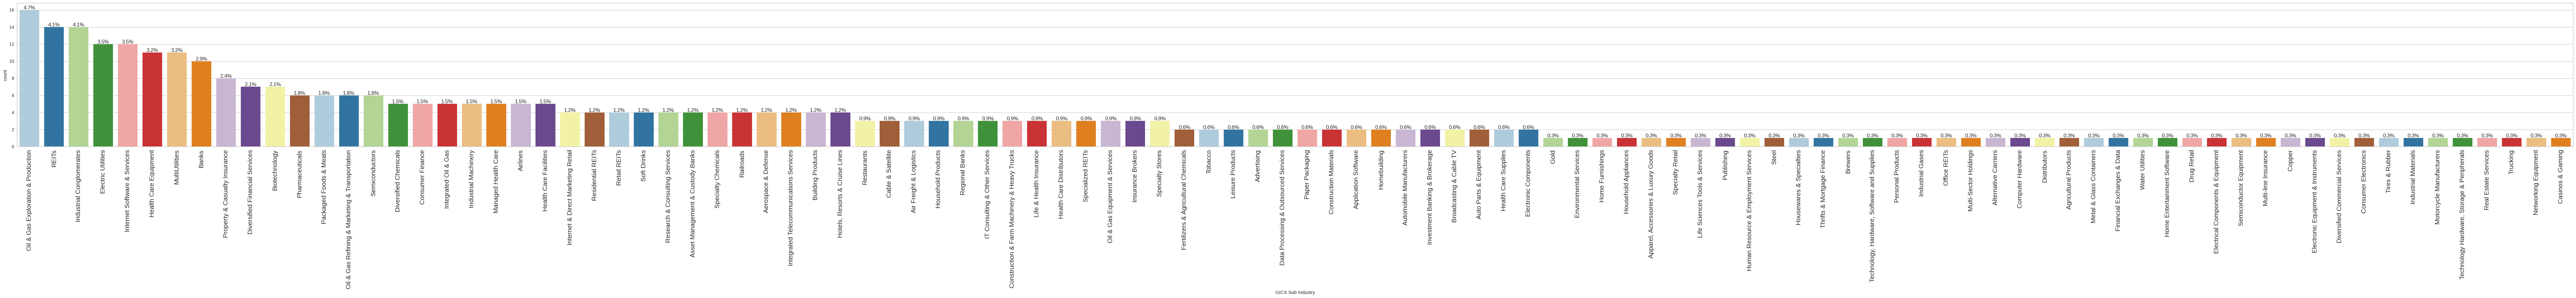

In [ ]:
# Barplot for the cloumn 'GICS Sub Industry' in the dataset:
labeled_barplot(df, 'GICS Sub Industry', perc=True, rotatn=90)

Observations:

*   Among the different sub-industries, Oil & Gas Exploration & Production Sector has the most number of stocks in the dataset while Casinos & Gaming have the least.
*   Five most popular sub-industries in the dataset are:

Economic Sector | No. of stocks | Percentage of stocks (%)
-|-|-
Oil & Gas Exploration & Production |16 | 4.7
REITs | 14 | 4.1
Industrial Conglomerates | 14 | 4.1
Electric Utilities| 12 | 3.5
Internet Software & Services | 12 | 3.5

*   Five least popular sub-industries sectors in the dataset are:

Economic Sector | No. of stocks | Percentage of stocks (%)
-|-|-
Casinos & Gaming | 1 | 0.3
Networking Equipment | 1 | 0.3
Trucking | 1 | 0.3
Real Estate Services | 1 | 0.3
Technology Hardware, Storage & Peripherals| 1 | 0.3

#### Company

In [ ]:
len(df['Security'].unique())

340

Observations:

*   There are 340 unique companies in the dataset.




### **Multivariate Analysis**

#### Correlation between the variables

In [ ]:
num_cols = df.select_dtypes(include='number').columns.to_list()
num_cols

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
df_corr = df[num_cols].corr()
df_corr

Current Price  Price Change  Volatility  \
Current Price                       1.00000       0.13498    -0.12426   
Price Change                        0.13498       1.00000    -0.40828   
Volatility                         -0.12426      -0.40828     1.00000   
ROE                                -0.00055      -0.04331     0.16253   
Cash Ratio                          0.12782       0.16859     0.02061   
Net Cash Flow                      -0.02196       0.02675    -0.01417   
Net Income                          0.03663       0.17930    -0.38343   
Earnings Per Share                  0.47960       0.17540    -0.37931   
Estimated Shares Outstanding       -0.14531       0.03366    -0.09570   
P/E Ratio                           0.26027      -0.00249     0.26360   
P/B Ratio                           0.12463       0.03433     0.04653   

                                  ROE  Cash Ratio  Net Cash Flow  Net Income  \
Current Price                -0.00055     0.12782       -0.02196     0.03663   
Price Change                 -0.04331     0.16859        0.02675     0.17930   
Volatility                    0.16253     0.02061       -0.01417    -0.38343   
ROE                           1.00000    -0.06912       -0.05220    -0.28852   
Cash Ratio                   -0.06912     1.00000        0.11382     0.02859   
Net Cash Flow                -0.05220     0.11382        1.00000     0.04423   
Net Income                   -0.28852     0.02859        0.04423     1.00000   
Earnings Per Share           -0.40529     0.02476        0.01935     0.55775   
Estimated Shares Outstanding -0.03029     0.13587       -0.05139     0.58931   
P/E Ratio                     0.02334     0.08948        0.02688    -0.22402   
P/B Ratio                    -0.06322     0.22967        0.05704    -0.06154   

                              Earnings Per Share  \
Current Price                            0.47960   
Price Change                             0.17540   
Volatility                              -0.37931   
ROE                                     -0.40529   
Cash Ratio                               0.02476   
Net Cash Flow                            0.01935   
Net Income                               0.55775   
Earnings Per Share                       1.00000   
Estimated Shares Outstanding            -0.02691   
P/E Ratio                               -0.26066   
P/B Ratio                                0.01491   

                              Estimated Shares Outstanding  P/E Ratio  \
Current Price                                     -0.14531    0.26027   
Price Change                                       0.03366   -0.00249   
Volatility                                        -0.09570    0.26360   
ROE                                               -0.03029    0.02334   
Cash Ratio                                         0.13587    0.08948   
Net Cash Flow                                     -0.05139    0.02688   
Net Income                                         0.58931   -0.22402   
Earnings Per Share                                -0.02691   -0.26066   
Estimated Shares Outstanding                       1.00000   -0.01455   
P/E Ratio                                         -0.01455    1.00000   
P/B Ratio                                         -0.02816    0.03642   

                              P/B Ratio  
Current Price                   0.12463  
Price Change                    0.03433  
Volatility                      0.04653  
ROE                            -0.06322  
Cash Ratio                      0.22967  
Net Cash Flow                   0.05704  
Net Income                     -0.06154  
Earnings Per Share              0.01491  
Estimated Shares Outstanding   -0.02816  
P/E Ratio                       0.03642  
P/B Ratio                       1.00000

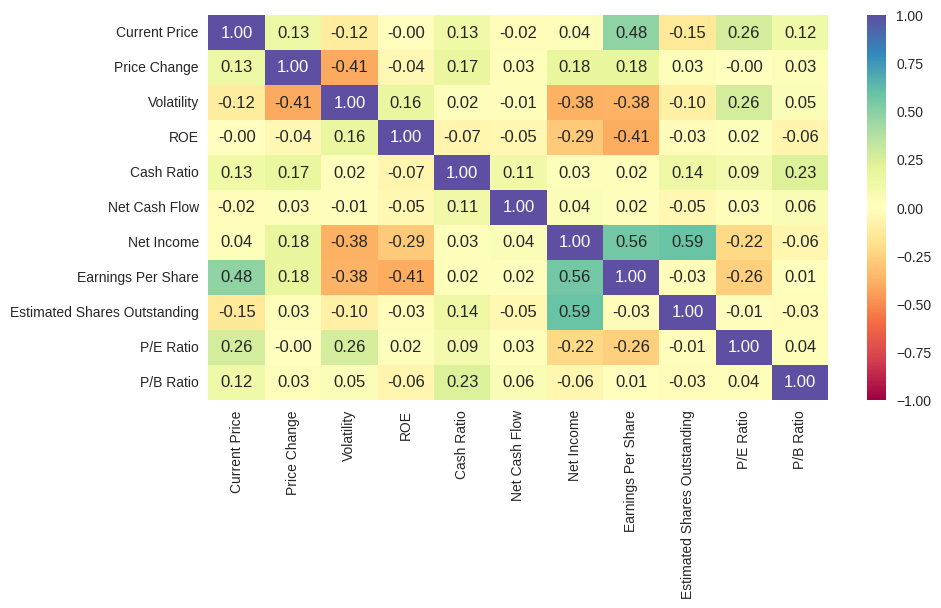

In [ ]:
#Heatmap showing correlation values between different variables.
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

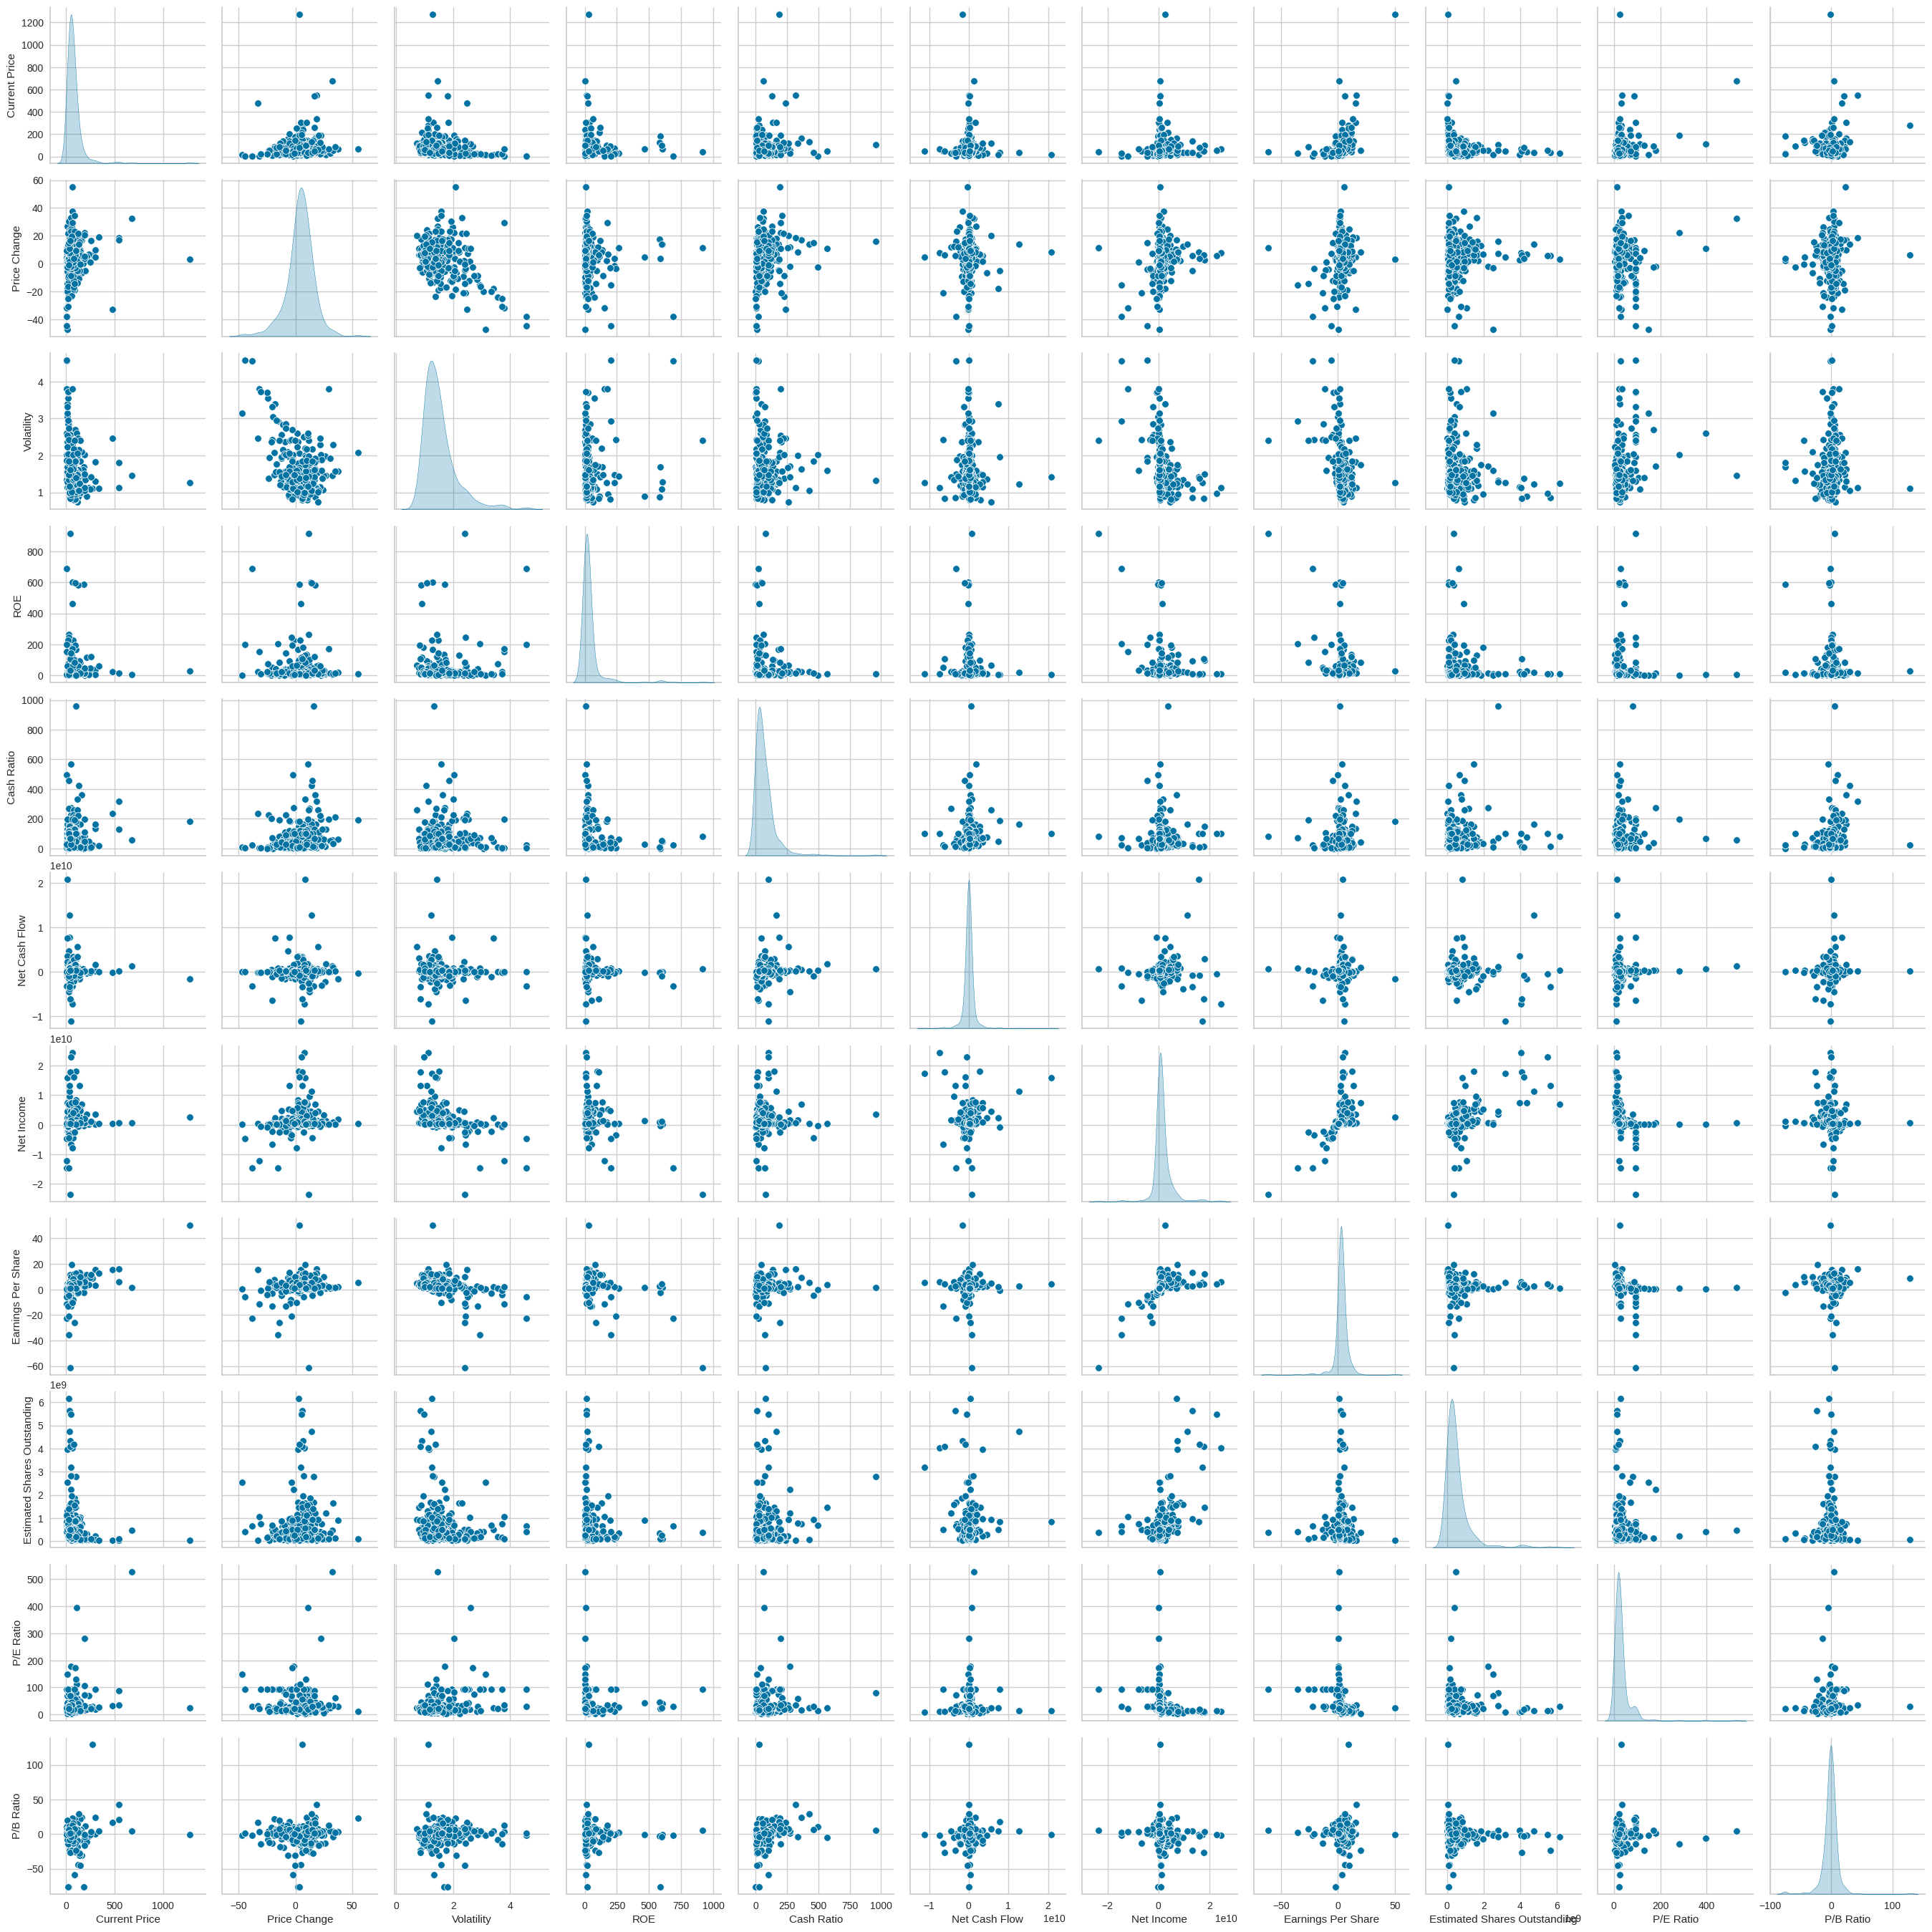

In [ ]:
sns.pairplot(data=df, diag_kind="kde");
plt.show()

Observations:

*   No significant values of high correlation among variables were observed.
*   Most positive correlation value is at 0.59, while the most negative correlation value is at -0.41
*   Most positively correlated variables are:

Variables | Correlation Value
----------|-------------------
Estimated Shares Outstanding & Net Income | 0.59
Earnings Per Share & Net Income | 0.56
Earnings Per Share & Current Price | 0.48


*   Most negatively correlated variables are:

Variables | Correlation Value
----------|-------------------
Earnings Per Share & ROE | -0.41
Volatility & Price Change | -0.41
Volatility & Net Income | -0.38
Volatility & Earnings Per Share | -0.38
ROE & Net Income | -0.29

#### GICS Sector vs GICS Sub Industry

In [ ]:
df.groupby(['GICS Sector'])['GICS Sub Industry'].count().reset_index().sort_values(by='GICS Sub Industry', ascending=False)

GICS Sector  GICS Sub Industry
5                   Industrials                 53
3                    Financials                 49
0        Consumer Discretionary                 40
4                   Health Care                 40
6        Information Technology                 33
2                        Energy                 30
8                   Real Estate                 27
10                    Utilities                 24
7                     Materials                 20
1              Consumer Staples                 19
9   Telecommunications Services                  5

Observations:

*   Sector that has the highest number of sub-industries is Industrials, followed by Financials, Consumer Discretionary, and Health care.
*   Sector that has the least number of sub-industries is Telecommunications Services, followed by Consumer Staples, and Materials.



#### GICS Sector vs Price Change

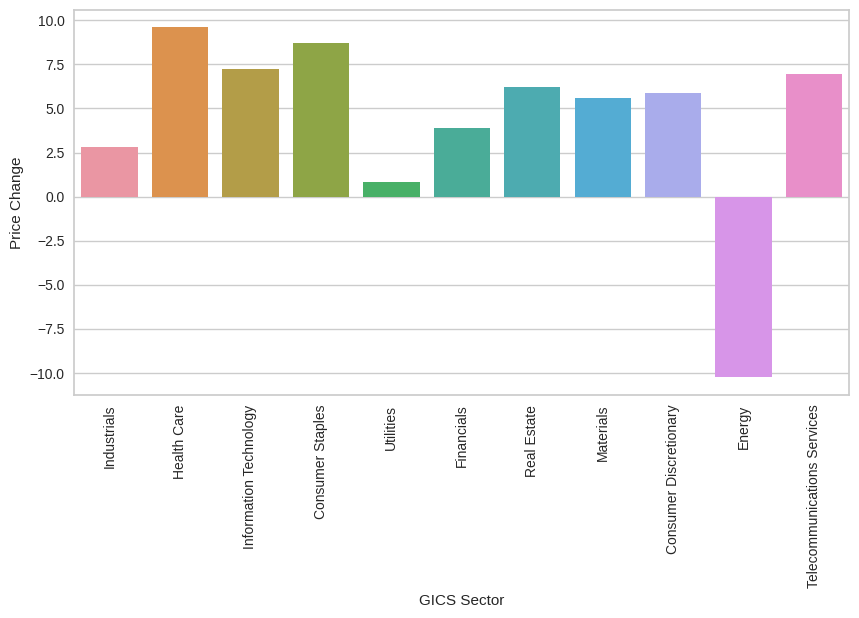

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.58565
Consumer Staples                8.68475
Information Technology          7.21748
Telecommunications Services     6.95698
Real Estate                     6.20555
Consumer Discretionary          5.84609
Materials                       5.58974
Financials                      3.86541
Industrials                     2.83313
Utilities                       0.80366
Energy                        -10.22829
Name: Price Change, dtype: float64

Observations:

*   The Energy sector has the highest percentage change in the stock prices in 13 weeks (in terms of magnitude), while the Utilities sector has the least percentage change.
*   However, the change in the energy sector is negative, which indicates over the past 13 weeks the stock prices of the energy sector have dropped.
*   All the other sectors have a positive change in stock prices which indicates an increase in the respective stock prices over past 13 weeks .
*   Below are the sectors with the highest changes in stock prices:

GISC Sector| Price Change(%)
-|-
Energy | -10.23
Health Care | 9.58
Consumer Staples | 8.68
Information Technology | 7.22
Telecommunications Services | 6.96

*   Below are the sectors with the lowest changes in stock prices:

GISC Sector| Price Change(%)
-|-
Uitilities | 0.80
Industrials | 2.83
Financials | 3.86



#### GICS Sector vs Cash Ratio

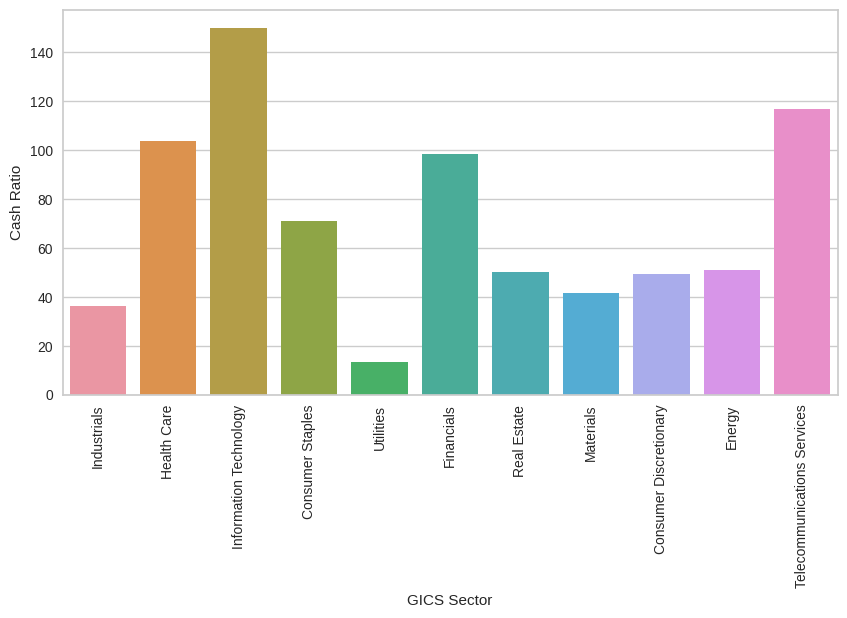

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology        149.81818
Telecommunications Services   117.00000
Health Care                   103.77500
Financials                     98.59184
Consumer Staples               70.94737
Energy                         51.13333
Real Estate                    50.11111
Consumer Discretionary         49.57500
Materials                      41.70000
Industrials                    36.18868
Utilities                      13.62500
Name: Cash Ratio, dtype: float64

Observations:

*   The companies in the Information Technology sector have the highest cash ratios, while the Utilities sector has the least.
*   Below are the sectors with the highest cash ratios:

GISC Sector| Cash Ratio
-|-
Information Technology | 149.82
Telecommunications Services | 117.00
Health Care | 103.77
Financials | 98.59
Consumer Staples | 70.95

*   Below are the sectors with the lowest cash ratios:

GISC Sector| Cash Ratio
-|-
Uitilities | 13.62
Industrials | 36.19
Materials | 41.70


#### GICS Sector vs P/E Ratio

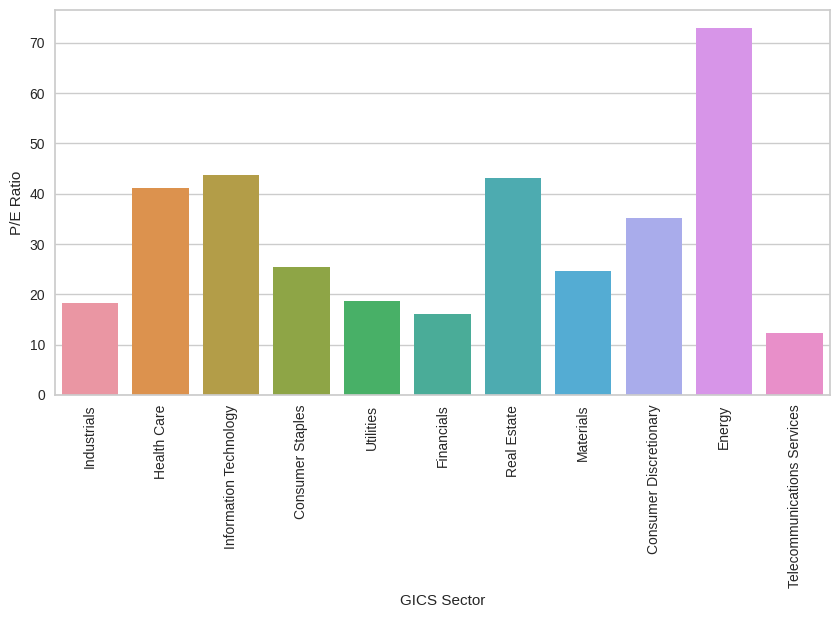

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                        72.89771
Information Technology        43.78255
Real Estate                   43.06558
Health Care                   41.13527
Consumer Discretionary        35.21161
Consumer Staples              25.52120
Materials                     24.58535
Utilities                     18.71941
Industrials                   18.25938
Financials                    16.02315
Telecommunications Services   12.22258
Name: P/E Ratio, dtype: float64

Observations:

*   The companies in the Energy sector have the highest P/E ratios, while the Telecommunications Sevices sector has the least.
*   Below are the sectors with the highest P/E ratios:

GISC Sector| P/E Ratio
-|-
Energy | 72.88
Information Technology | 43.78
Real Estate | 43.06
Health Care | 41.13
Consumer Discretionary | 35.21

*   Below are the sectors with the lowest P/E ratios:

GISC Sector| P/E Ratio
-|-
Telecommunications Services  | 12.22
Financials | 16.02
Industrials | 18.26

#### GICS Sector vs Volatility

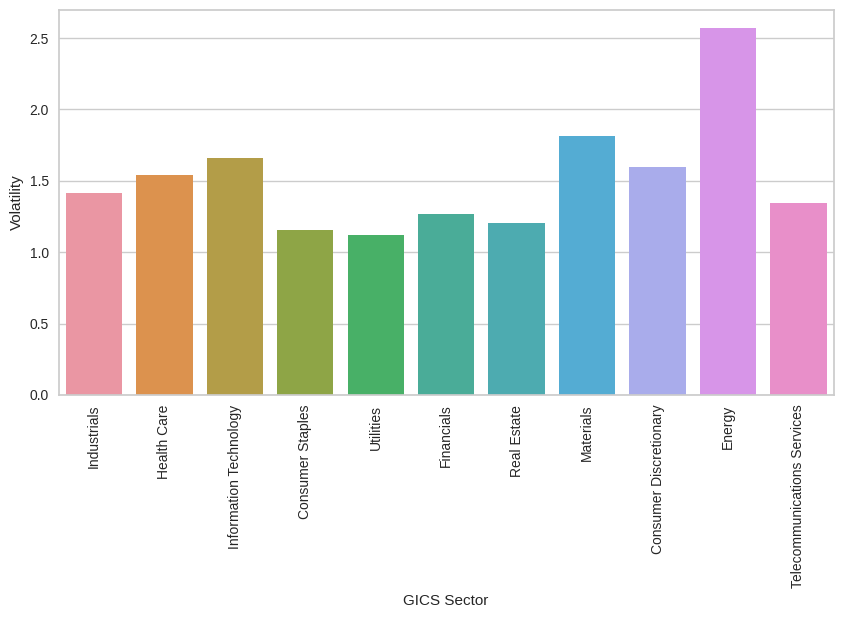

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False)

GICS Sector
Energy                        2.56878
Materials                     1.81673
Information Technology        1.65980
Consumer Discretionary        1.59548
Health Care                   1.54102
Industrials                   1.41699
Telecommunications Services   1.34161
Financials                    1.26725
Real Estate                   1.20605
Consumer Staples              1.15267
Utilities                     1.11802
Name: Volatility, dtype: float64

Observations:

*   The companies in the Energy sector have the highest standard deviation of the stock price over the past 13 weeks, while the Utilities sector has the least.
*   Below are the sectors with the highest volatility:

GISC Sector| Volatility($)
-|-
Energy | 2.57
Materials | 1.82
Information Technology | 1.66
Consumer Discretionary | 1.59
Health Care | 1.54

*   Below are the sectors with the lowest volatility:

GISC Sector| Volatility($)
-|-
Utilities  | 1.12
Consumer Staples | 1.15
Real Estate | 1.21

#### GICS Sector vs Current Price

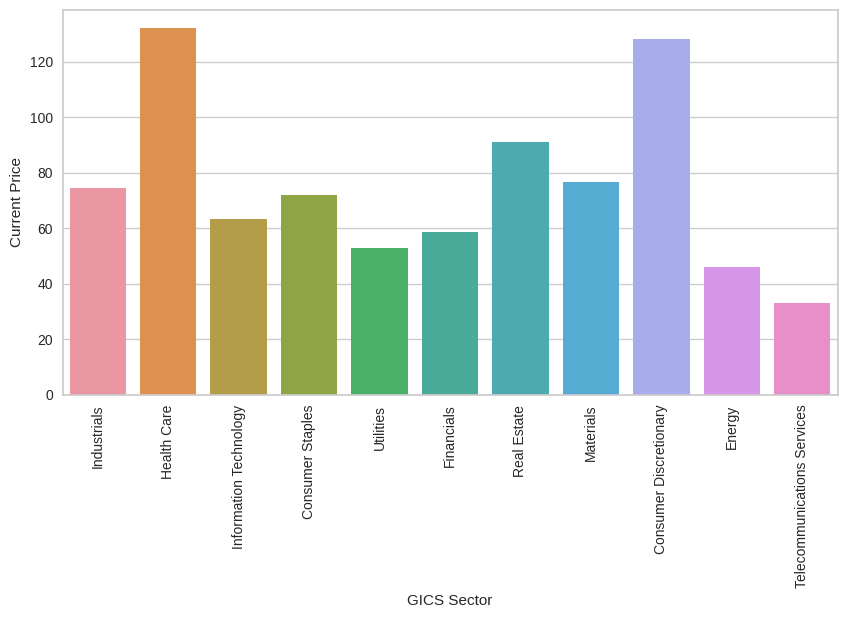

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Current Price', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Current Price'].mean().sort_values(ascending=False)

GICS Sector
Health Care                   132.04825
Consumer Discretionary        128.09540
Real Estate                    90.97692
Materials                      76.55150
Industrials                    74.41181
Consumer Staples               71.97281
Information Technology         63.54848
Financials                     58.65918
Utilities                      52.96854
Energy                         46.04233
Telecommunications Services    32.96400
Name: Current Price, dtype: float64

Observations:

*   The companies in the Health Care sector have the highest current stock prices, while the Telecommunications Sevices sector has the least.
*   Below are the 3 sectors with the highest current stock prices:

GISC Sector| Current Stock Price($)
-|-
Health Care | 132.05
Consumer Discretionary | 128.10
Real Estate | 90.98

*   Below are the 3 sectors with the lowest current stock prices:

GISC Sector| Current Stock Price($)
-|-
Telecommunications Sevices  | 32.96
Energy | 46.04
Utilities | 52.97

#### GICS Sector vs ROE

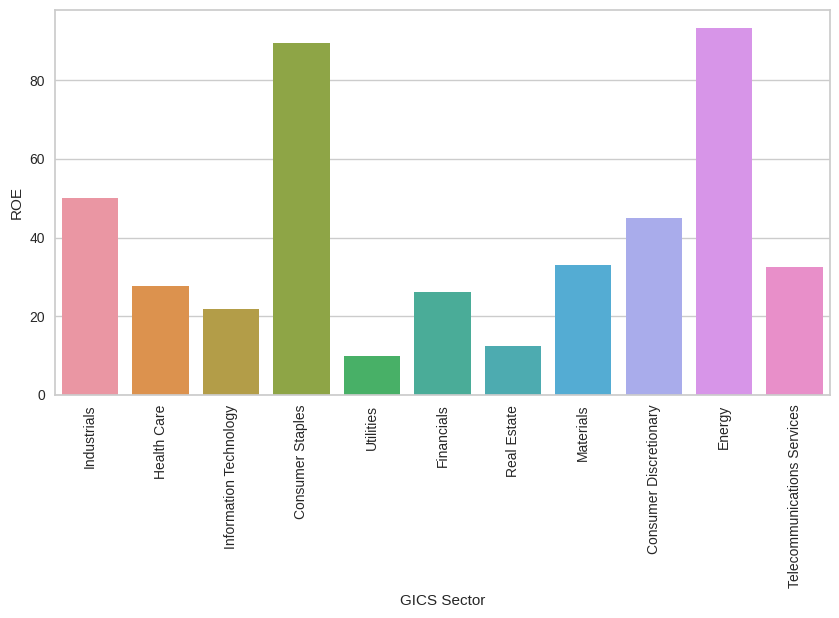

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='ROE', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['ROE'].mean().sort_values(ascending=False)

GICS Sector
Energy                        93.20000
Consumer Staples              89.42105
Industrials                   50.15094
Consumer Discretionary        44.90000
Materials                     33.00000
Telecommunications Services   32.60000
Health Care                   27.77500
Financials                    26.28571
Information Technology        21.78788
Real Estate                   12.44444
Utilities                      9.87500
Name: ROE, dtype: float64

Observations:

*   The companies in the Energy sector have the highest ROE, while the Utilities sector has the least.
*   Below are the 3 sectors with the highest ROE:

GISC Sector| ROE
-|-
Energy | 93.20
Consumer Staples | 89.42
Industrials | 50.15

*   Below are the 3 sectors with the lowest ROE:

GISC Sector| ROE
-|-
Utilities  | 9.87
Real Estate | 12.44
Information Technology | 21.79

#### GICS Sector vs Net Cash Flow

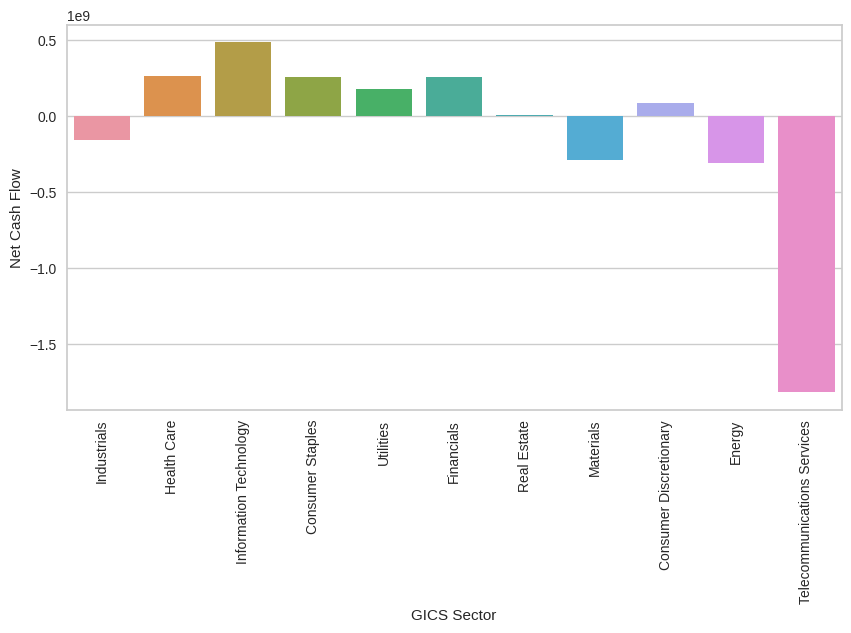

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Net Cash Flow', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Net Cash Flow'].mean().sort_values(ascending=False)

GICS Sector
Information Technology          483099121.21212
Health Care                     262687800.00000
Consumer Staples                258627210.52632
Financials                      254356306.12245
Utilities                       176462291.66667
Consumer Discretionary           84213175.00000
Real Estate                       3546703.70370
Industrials                    -160103150.94340
Materials                      -291236850.00000
Energy                         -308318233.33333
Telecommunications Services   -1816800000.00000
Name: Net Cash Flow, dtype: float64

Observations:

*   The companies in the Information Technology sector have the highest net cash flow.
*   The companies in the Telecommunications Services sector have negative net cash flow.
*   Below are the 3 sectors with the highest net cash flow:

GISC Sector| Net Cash Flow($)
-|-
Information Technology | 483099121.21
Health Care | 262687800.00
Consumer Staples | 258627210.53

*   Below are the 4 sectors with the negative net cash flow:

GISC Sector| Net Cash Flow($)
-|-
Telecommunications Services  | -1816800000.00
Energy | -308318233.33
Materials | -291236850.00
Industrials | -160103150.94

#### GICS Sector vs Net Income

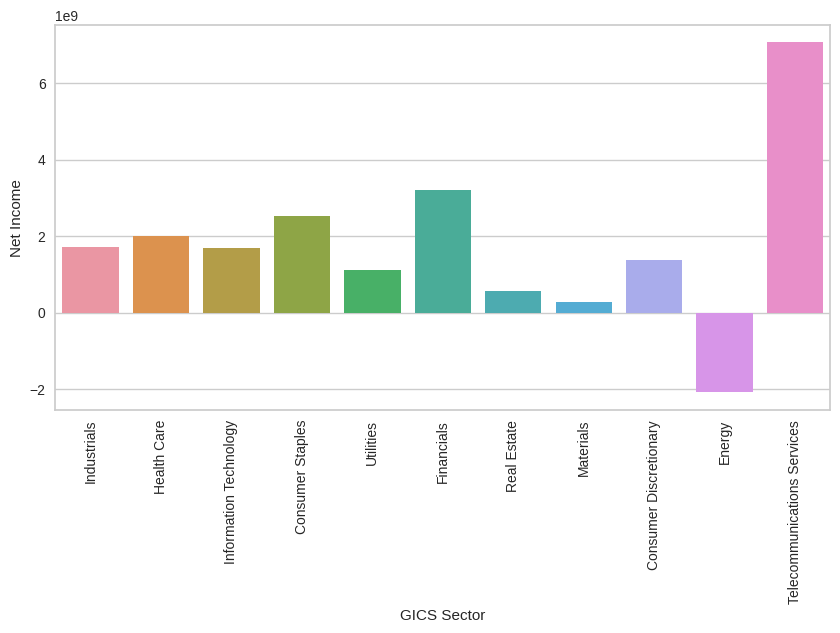

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Net Income', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Net Income'].mean().sort_values(ascending=False)

GICS Sector
Telecommunications Services    7067800000.00000
Financials                     3202677979.59184
Consumer Staples               2518833052.63158
Health Care                    2018515350.00000
Industrials                    1722373113.20755
Information Technology         1701587272.72727
Consumer Discretionary         1373450075.00000
Utilities                      1107145541.66667
Real Estate                     567775740.74074
Materials                       278516500.00000
Energy                        -2087527466.66667
Name: Net Income, dtype: float64

Observations:

*   The companies in the Telecommunications Services sector have the highest net income.
*   The companies in the Energy sector have negative net income.
*   Below are the 3 sectors with the highest net income:

GISC Sector| Net Income($)
-|-
Telecommunications Services | 7067800000.00
Financials| 3202677979.59
Consumer Staples | 2518833052.63

*   Below are the 3 sectors with the lowest net income:

GISC Sector| Net Income($)
-|-
Energy  | -2087527466.67
Materials | 278516500.00
Real Estate | 567775740.74

#### GICS Sector vs Earnings Per Share

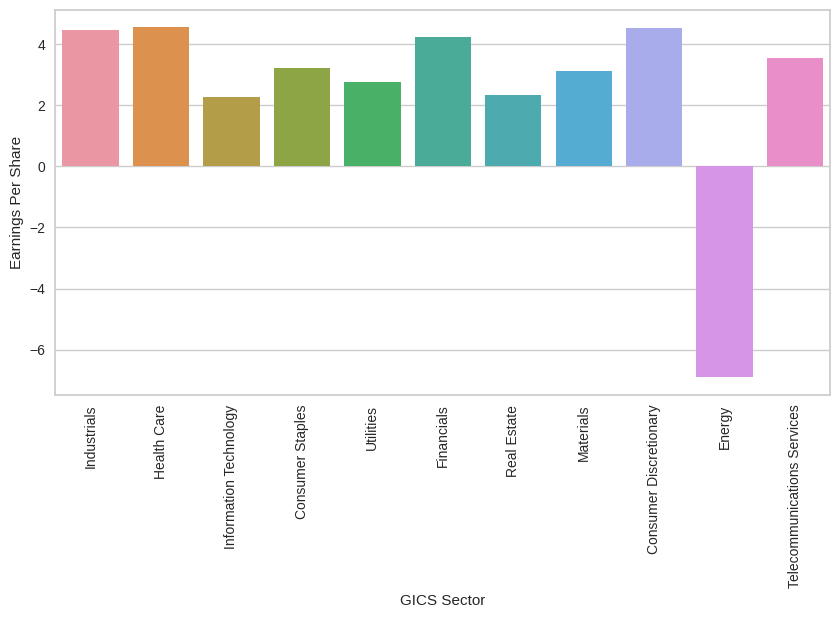

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Earnings Per Share', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Earnings Per Share'].mean().sort_values(ascending=False)

GICS Sector
Health Care                    4.54125
Consumer Discretionary         4.52575
Industrials                    4.45679
Financials                     4.22041
Telecommunications Services    3.55000
Consumer Staples               3.22421
Materials                      3.12900
Utilities                      2.75313
Real Estate                    2.34000
Information Technology         2.26606
Energy                        -6.90833
Name: Earnings Per Share, dtype: float64

Observations:

*   The companies in the Health Care sector have the highest earnings per share.
*   The companies in the Energy sector have negative earnings per share.
*   Below are the 3 sectors with the highest net income:

GISC Sector| Earnings Per Share($)
-|-
Health Care | 4.54
Consumer Discretionary| 4.52
Industrials | 4.46

*   Below are the 3 sectors with the lowest net income:

GISC Sector| Earnings Per Share($)
-|-
Energy  | -6.91
Information Technology | 2.27
Real Estate | 2.34

#### GICS Sector vs Estimated Shares Outstanding

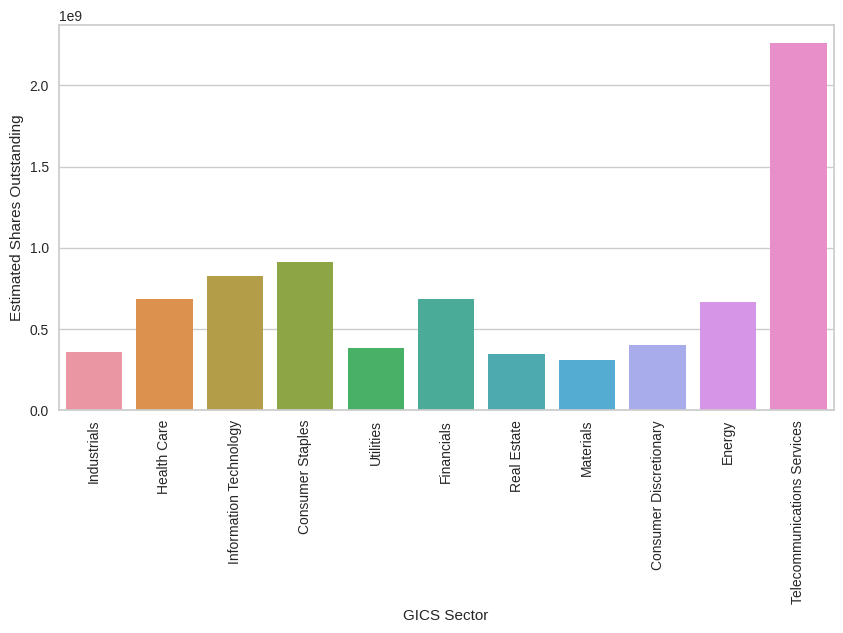

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Estimated Shares Outstanding', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Estimated Shares Outstanding'].mean().sort_values(ascending=False)

GICS Sector
Telecommunications Services   2259575293.52000
Consumer Staples               913685176.71053
Information Technology         828278930.79242
Health Care                    684595513.88675
Financials                     683877334.85306
Energy                         663528783.07133
Consumer Discretionary         399651258.32450
Utilities                      380919306.56250
Industrials                    354716946.84377
Real Estate                    344454019.89000
Materials                      308524571.47400
Name: Estimated Shares Outstanding, dtype: float64

Observations:

*   The companies in the Telecommunications Services sector have the highest estimated shares outstanding.
*   The companies in the Materials sector have the lowest estimated shares outstanding.
*   Below are the 3 sectors with the highest estimated shares outstanding:

GISC Sector| Estimated Shares Outstanding
-|-
Telecommunations Services | 2259575293.52
Consumer Staples| 913685176.71
Information Technology | 828278930.79

*   Below are the 3 sectors with the lowest estimated shares outstanding:

GISC Sector| Estimated Shares Outstanding
-|-
Materials  | 308524571.47
Real Estate | 344454019.89
Industrials | 354716946.84

#### GICS Sector vs P/B Ratio

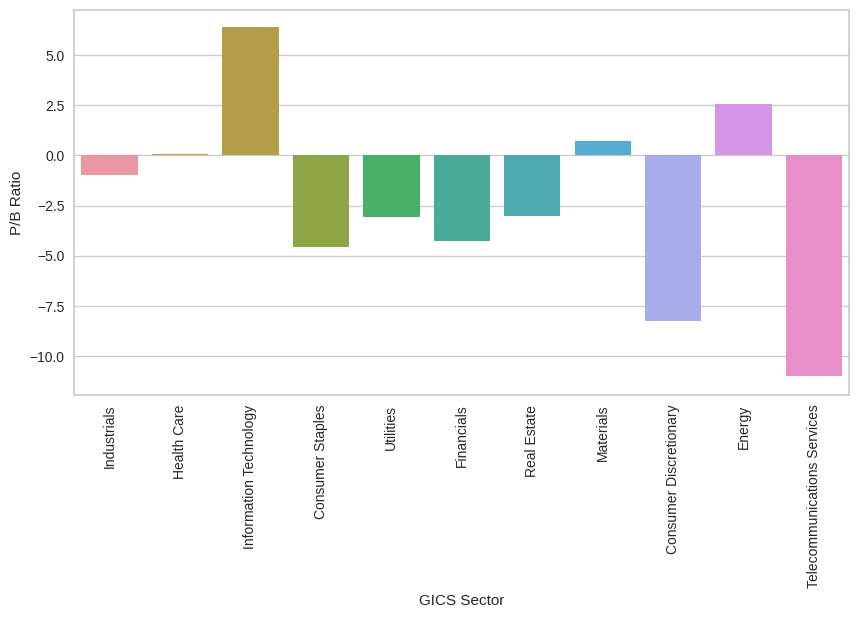

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='P/B Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['P/B Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology          6.37713
Energy                          2.53974
Materials                       0.72310
Health Care                     0.06887
Industrials                    -0.97927
Real Estate                    -3.00332
Utilities                      -3.08735
Financials                     -4.27051
Consumer Staples               -4.55400
Consumer Discretionary         -8.25354
Telecommunications Services   -11.00986
Name: P/B Ratio, dtype: float64

Observations:

*   The companies in the Information Technology sector have the highest positive P/B ratios, while the Telecommunications Sevices sector has the least.
*   Below are the sectors with the highest P/B ratios:

GISC Sector| P/B Ratio
-|-
Information Technology | 6.38
Energy | 2.54
Materials | 0.72

*   Below are 3 sectors with negative P/B ratios:

GISC Sector| P/B Ratio
-|-
Telecommunications Services  | -11.01
Consumer Discretionary | -8.25
Consumer Staples | -4.55

#### GICS Sub Industry vs Price Change

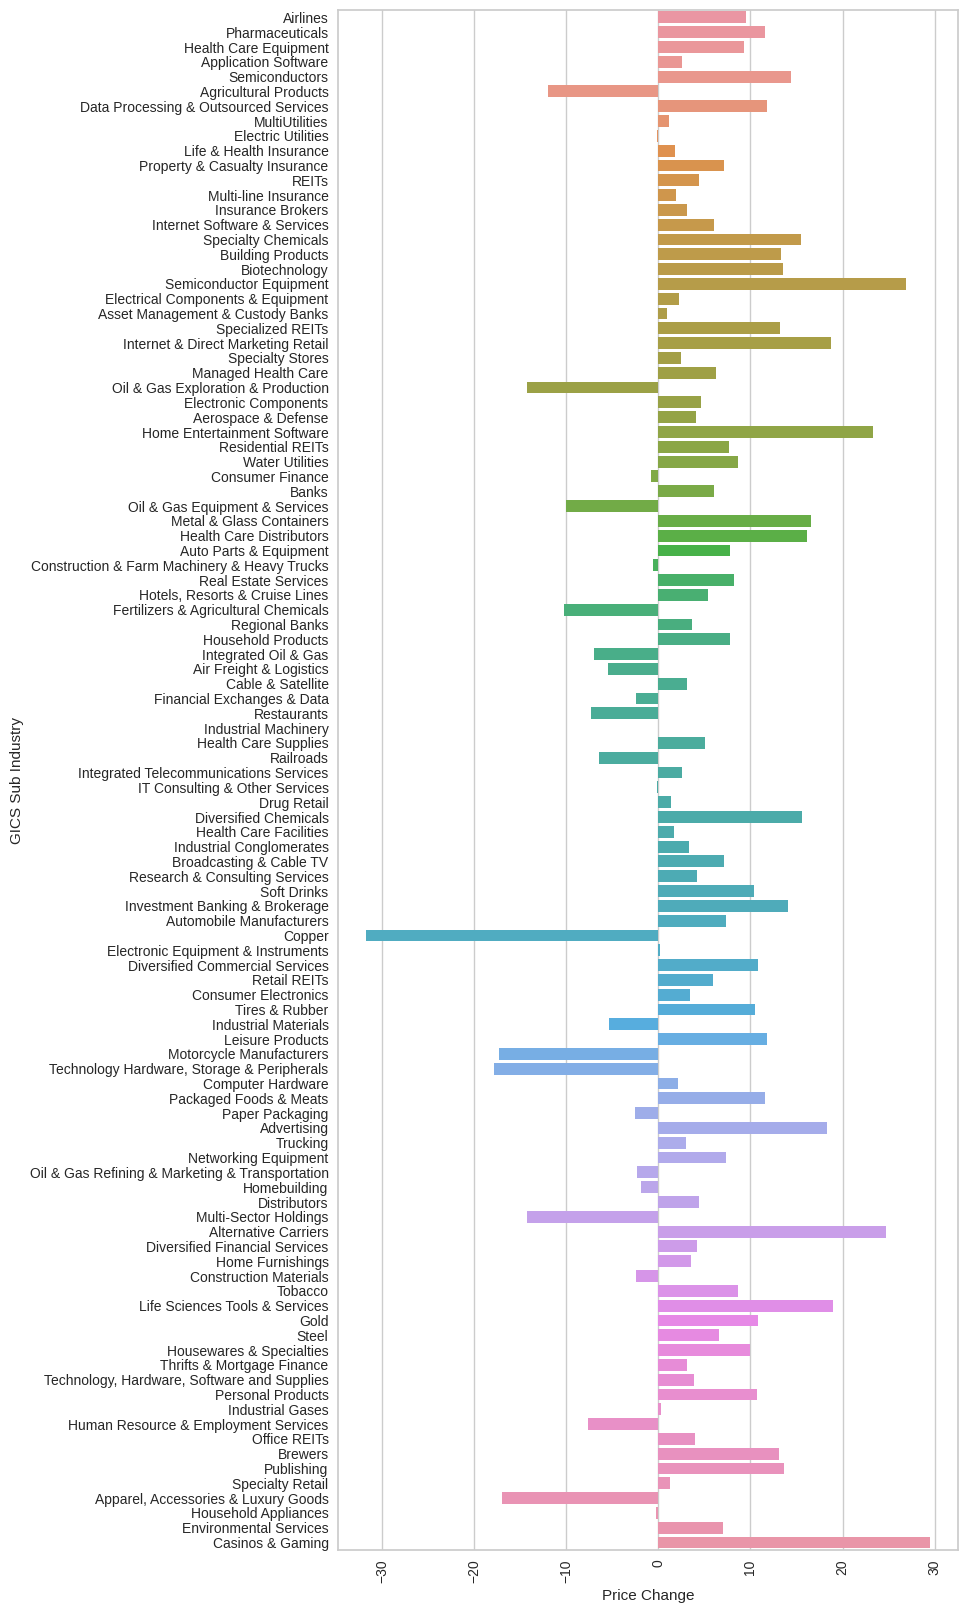

In [ ]:
plt.figure(figsize=(8, 20))
sns.barplot(data=df, y='GICS Sub Industry', x='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sub Industry')['Price Change'].mean().sort_values(ascending=False).head()

GICS Sub Industry
Casinos & Gaming                 29.49654
Semiconductor Equipment          26.83424
Alternative Carriers             24.70750
Home Entertainment Software      23.31953
Life Sciences Tools & Services   18.94291
Name: Price Change, dtype: float64

In [ ]:
df.groupby('GICS Sub Industry')['Price Change'].mean().sort_values(ascending=False).tail()

GICS Sub Industry
Multi-Sector Holdings                        -14.29276
Apparel, Accessories & Luxury Goods          -16.94828
Motorcycle Manufacturers                     -17.24704
Technology Hardware, Storage & Peripherals   -17.83784
Copper                                       -31.68517
Name: Price Change, dtype: float64

Observations:

*   Below are the sub industries with highest positive price changes:

GICS Sub Industry | Price Change (%)
-|-
Casinos & Gaming | 29.50
Semiconductor Equipment | 26.83
Alternative Carriers | 24.71

*   Below are the sub-industries with the highest negative price changes:

GICS Sub Industry | Price Change (%)
-|-
Copper | -31.68
Technology Hardware, Storage & Peripherals |-17.84
Motorcycle Manufacturers | -17.25



#### GICS Sub Industry vs Cash Ratio

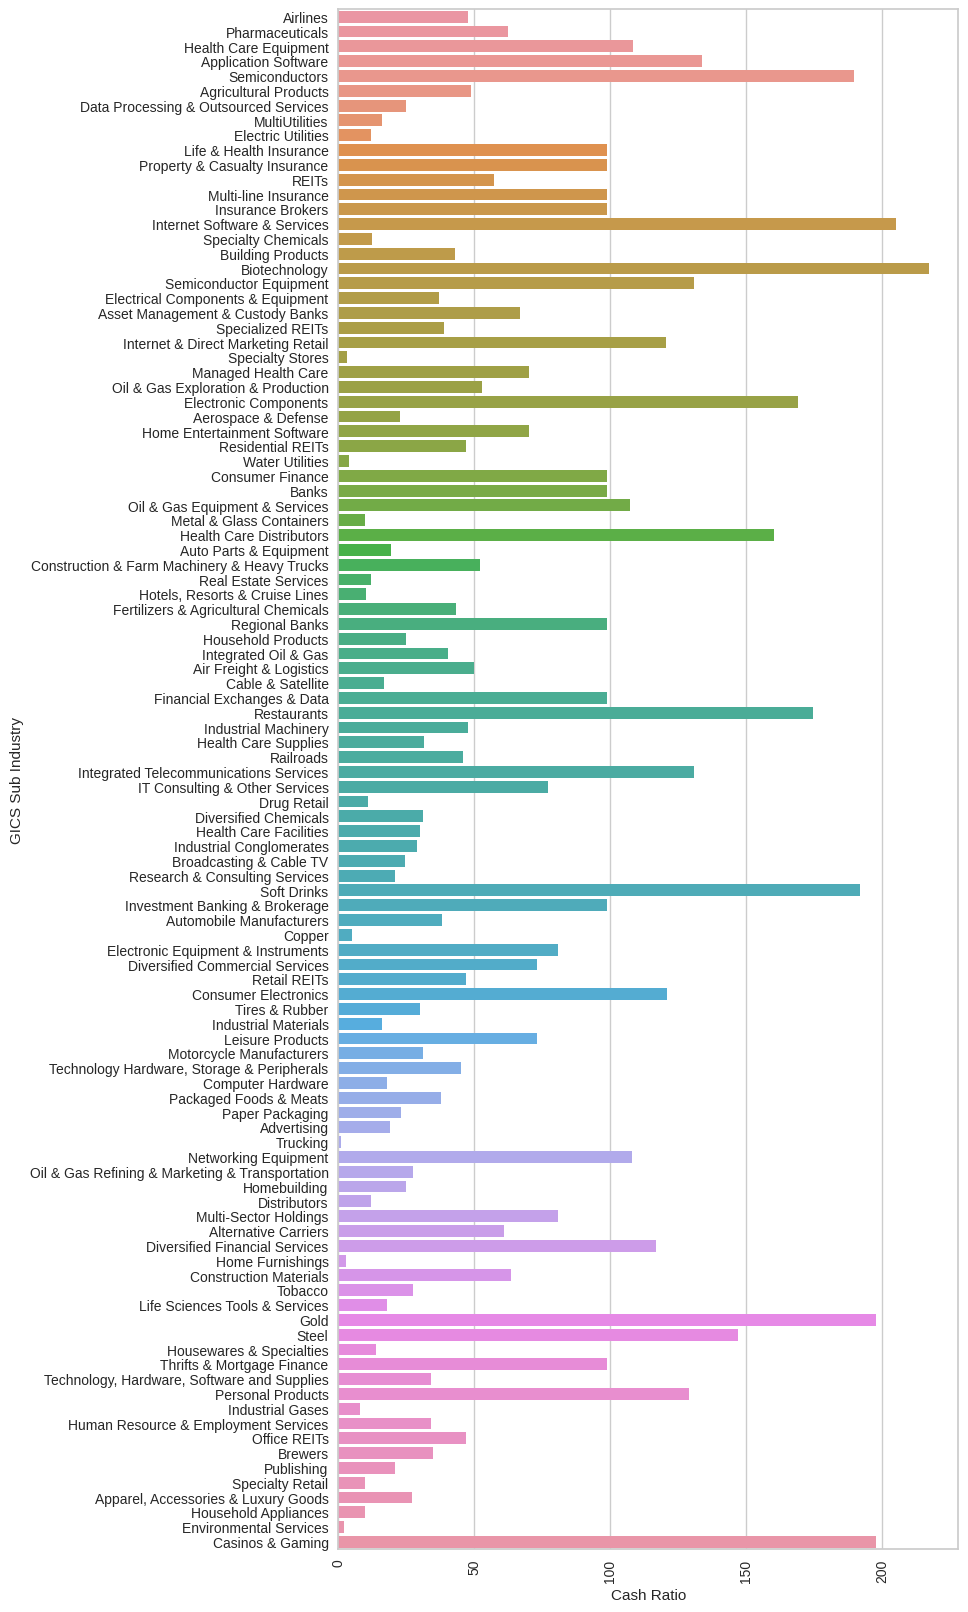

In [ ]:
plt.figure(figsize=(8, 20))
sns.barplot(data=df, y='GICS Sub Industry', x='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sub Industry')['Cash Ratio'].mean().sort_values(ascending=False).head()

GICS Sub Industry
Biotechnology                  217.28571
Internet Software & Services   205.41667
Gold                           198.00000
Casinos & Gaming               198.00000
Soft Drinks                    192.00000
Name: Cash Ratio, dtype: float64

In [ ]:
df.groupby('GICS Sub Industry')['Cash Ratio'].mean().sort_values(ascending=False).tail()

GICS Sub Industry
Water Utilities          4.00000
Specialty Stores         3.33333
Home Furnishings         3.00000
Environmental Services   2.00000
Trucking                 1.00000
Name: Cash Ratio, dtype: float64

Observations:

*   Below are the sub industries with highest cash ratio:

GICS Sub Industry | Cash Ratio
-|-
Biotechnology | 217.28
Internet Software & Services | 205.42
Gold | 198.00
Casinos & Gaming | 198.00

*   Below are the sub-industries with the lowest cash ratios

GICS Sub Industry | Cash Ratio
-|-
Trucking | 1.00
Environmental Services | 2.00
Home Furnishings | 3.00

#### GICS Sub Industry vs P/E Ratio

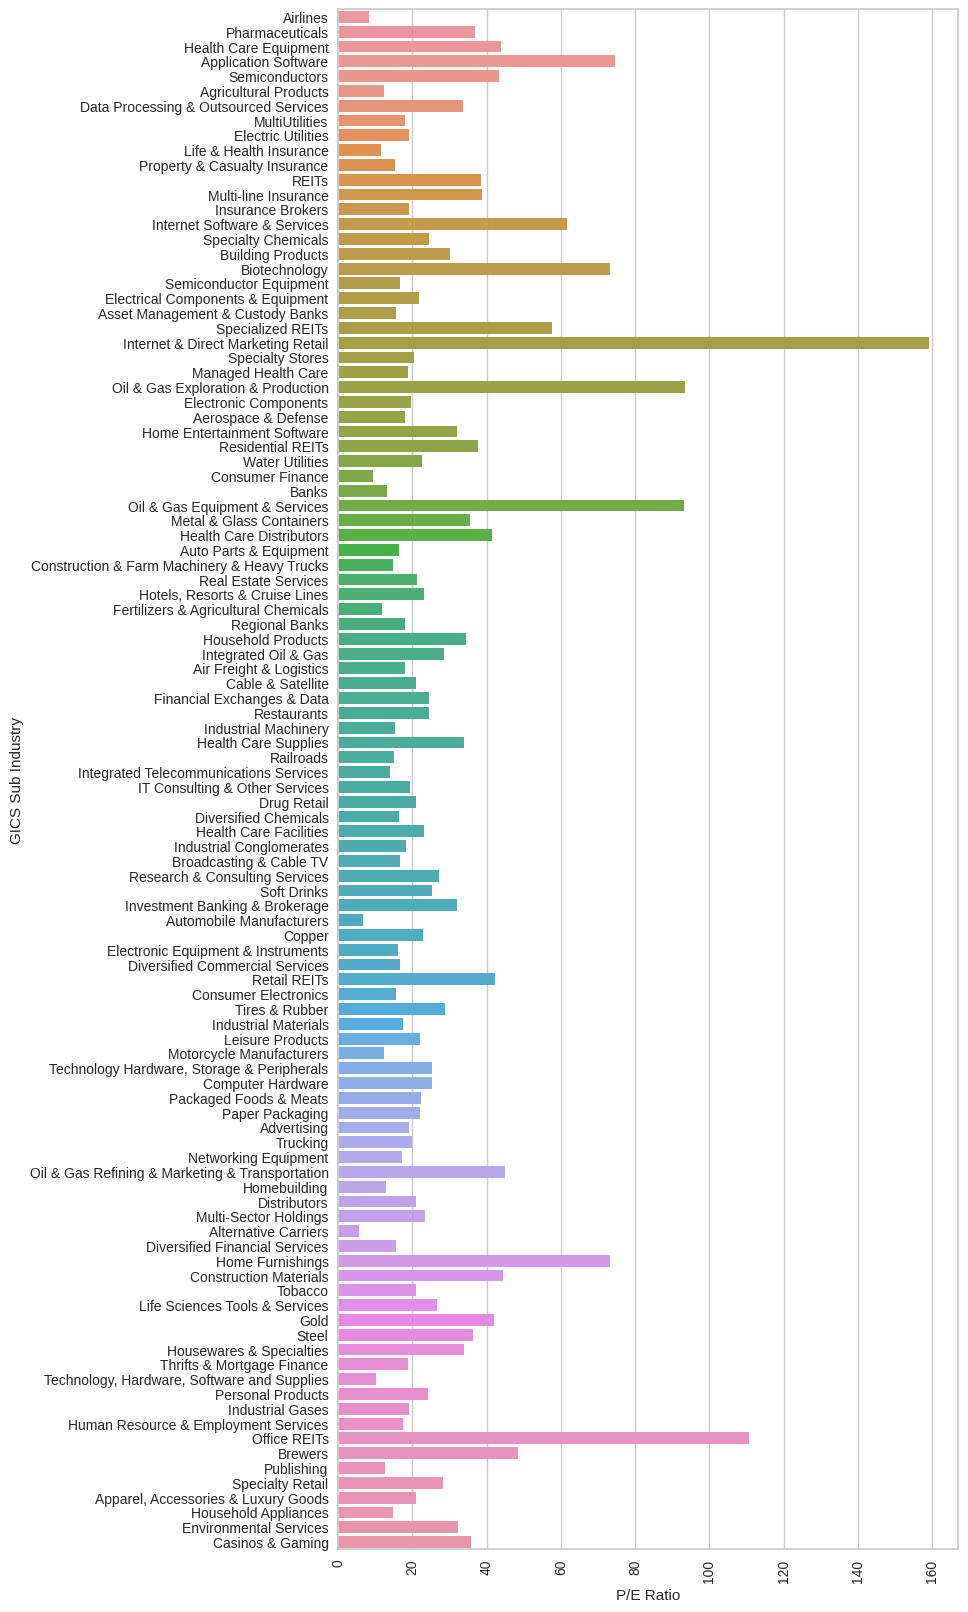

In [ ]:
plt.figure(figsize=(8, 20))
sns.barplot(data=df, y='GICS Sub Industry', x='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sub Industry')['P/E Ratio'].mean().sort_values(ascending=False).head()

GICS Sub Industry
Internet & Direct Marketing Retail   159.11077
Office REITs                         110.76471
Oil & Gas Exploration & Production    93.51812
Oil & Gas Equipment & Services        93.08929
Application Software                  74.55556
Name: P/E Ratio, dtype: float64

In [ ]:
df.groupby('GICS Sub Industry')['P/E Ratio'].mean().sort_values(ascending=False).tail()

GICS Sub Industry
Technology, Hardware, Software and Supplies   10.12255
Consumer Finance                               9.30547
Airlines                                       8.16129
Automobile Manufacturers                       6.57078
Alternative Carriers                           5.59835
Name: P/E Ratio, dtype: float64

Observations:

*   Below are the sub-industries with the highest P/E ratio:

GICS Sub Industry | P/E Ratio
-|-
Internet & Direct Marketing Retail | 159.11
Office REITs | 110.76
Oil & Gas Exploration & Production | 93.52

*   Below are the sub-industries with the lowest P/E ratios

GICS Sub Industry | P/E Ratio
-|-
Alternative Carriers | 5.60
Automobile Manufacturers | 6.57
Airlines | 8.16

#### GICS Sub Industry vs Net Income

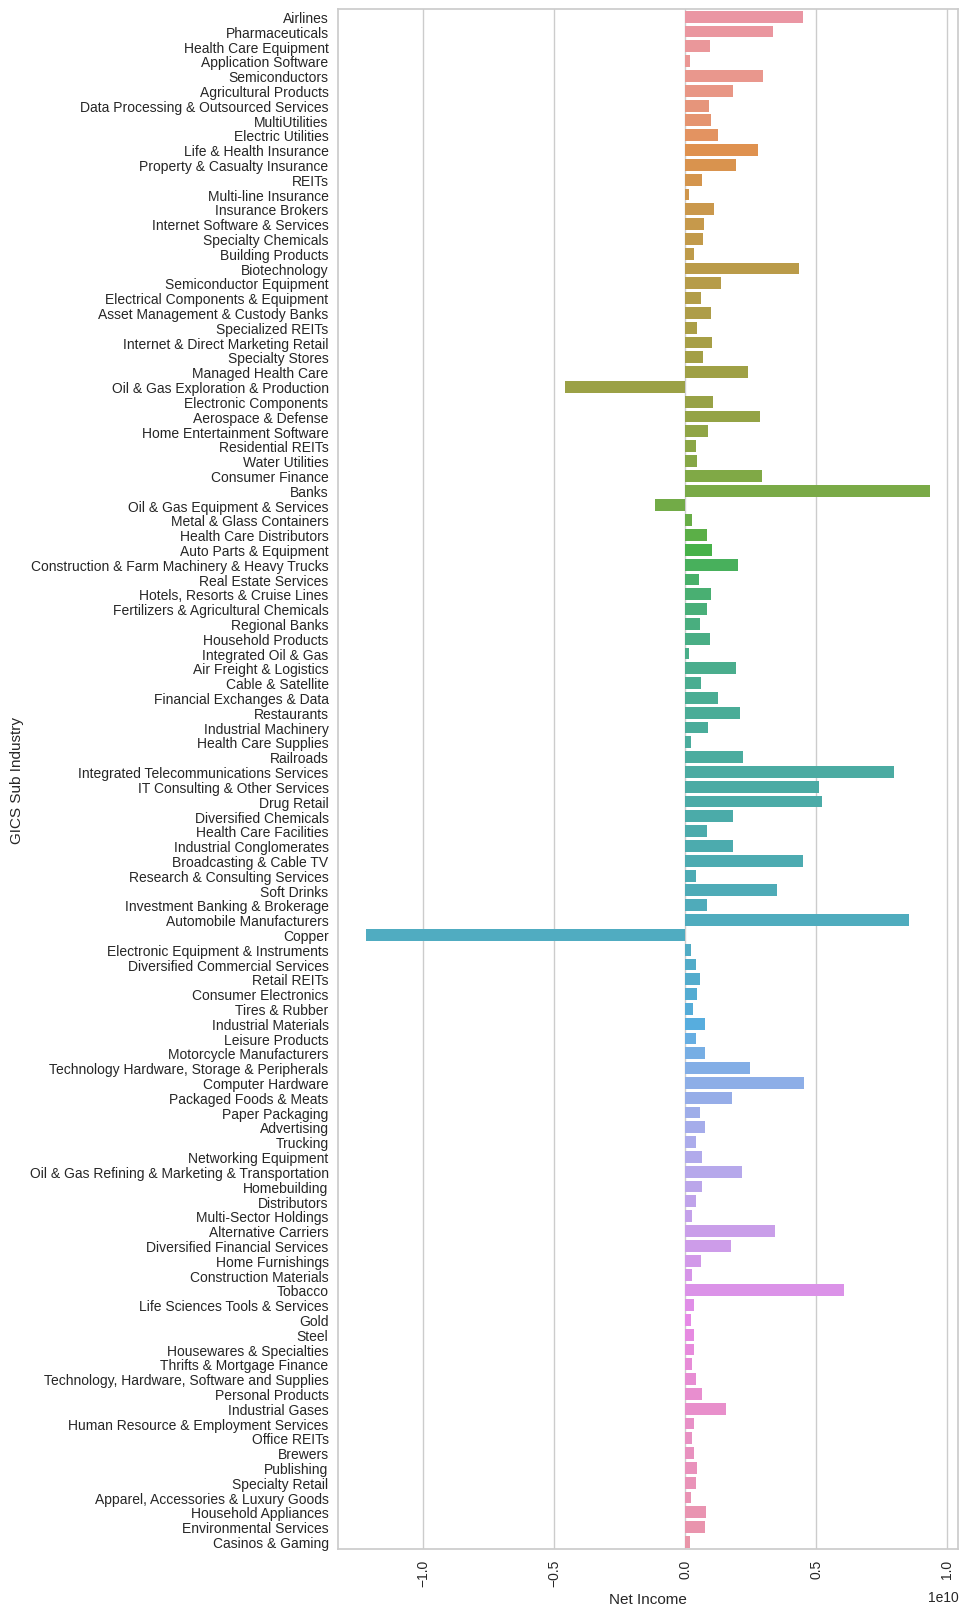

In [ ]:
plt.figure(figsize=(8, 20))
sns.barplot(data=df, y='GICS Sub Industry', x='Net Income', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sub Industry')['Net Income'].mean().sort_values(ascending=False).head()

GICS Sub Industry
Banks                                    9351962400.00000
Automobile Manufacturers                 8530000000.00000
Integrated Telecommunications Services   7976500000.00000
Tobacco                                  6057000000.00000
Drug Retail                              5237000000.00000
Name: Net Income, dtype: float64

In [ ]:
df.groupby('GICS Sub Industry')['Net Income'].mean().sort_values(ascending=False).tail()

GICS Sub Industry
Integrated Oil & Gas                    145033400.00000
Multi-line Insurance                    141555000.00000
Oil & Gas Equipment & Services        -1135666666.66667
Oil & Gas Exploration & Production    -4562624437.50000
Copper                               -12156000000.00000
Name: Net Income, dtype: float64

Observations:

*   Below are the sub-industries with the highest net income:

GICS Sub Industry | Net Income ($)
-|-
Banks | 9351962400.00
Automobile Manufacturers | 8530000000.00
Intergrated Telecommunications Services | 7976500000.00

*   Below are the sub-industries with the lowest net income:

GICS Sub Industry | Net Income ($)
-|-
Copper | -12156000000.00
Oil & Gas Exploration & Production | -4562624437.50000
Oil & Gas Equipment & Sevices | -1135666666.66667

#### GICS Sub Industry vs Net Cash Flow

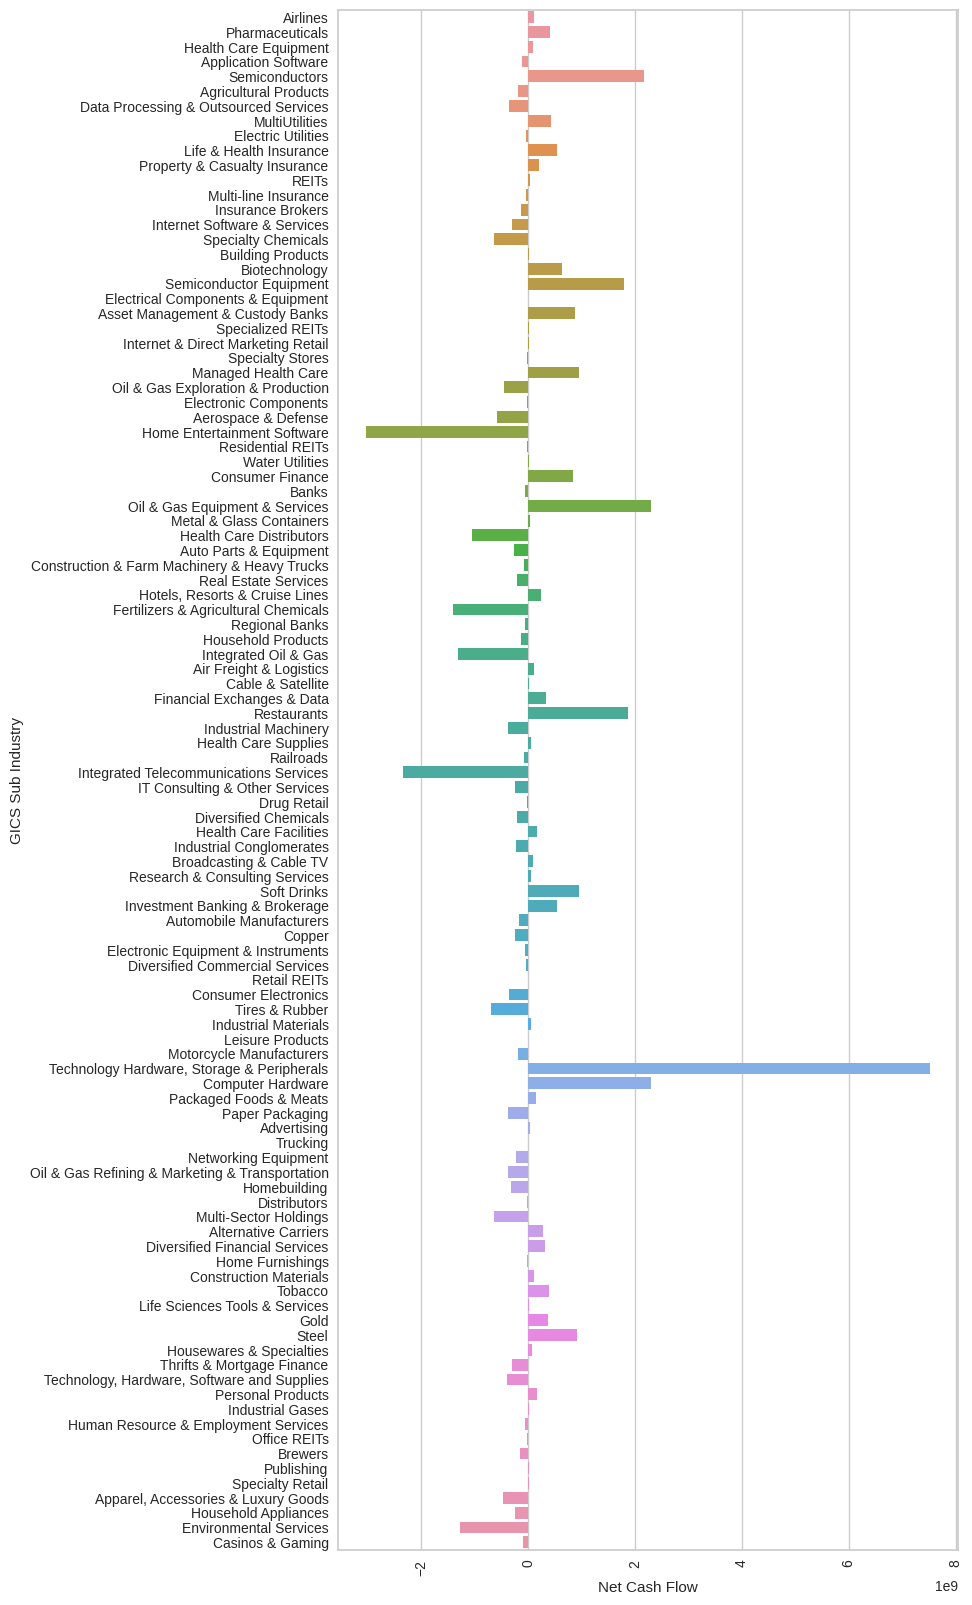

In [ ]:
plt.figure(figsize=(8, 20))
sns.barplot(data=df, y='GICS Sub Industry', x='Net Cash Flow', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sub Industry')['Net Cash Flow'].mean().sort_values(ascending=False).head()

GICS Sub Industry
Technology Hardware, Storage & Peripherals   7523000000.00000
Oil & Gas Equipment & Services               2304666666.66667
Computer Hardware                            2300000000.00000
Semiconductors                               2160615333.33333
Restaurants                                  1865046666.66667
Name: Net Cash Flow, dtype: float64

In [ ]:
df.groupby('GICS Sub Industry')['Net Cash Flow'].mean().sort_values(ascending=False).tail()

GICS Sub Industry
Environmental Services                   -1268000000.00000
Integrated Oil & Gas                     -1319025000.00000
Fertilizers & Agricultural Chemicals     -1404450000.00000
Integrated Telecommunications Services   -2339500000.00000
Home Entertainment Software              -3025000000.00000
Name: Net Cash Flow, dtype: float64

Observations:

*   Below are the sub-industries with the highest net cash flow:

GICS Sub Industry | Net Cash Flow
-|-
Technology Hardware, Storage & Peripherals | 7523000000.00
Oil & Gas Equipment & Services | 2304666666.67
Computer Hardware | 2300000000.00

*   Below are the sub-industries with the lowest net cash:

GICS Sub Industry | Net Cash Flow
-|-
Home Entertainment Software | -3025000000.00000
Integrated Telecommunications Services | -2339500000.00000
Fetilizers & Agricultural Chemicals | -1404450000.00000

#### Estimated Shares Outstanding vs Net Income

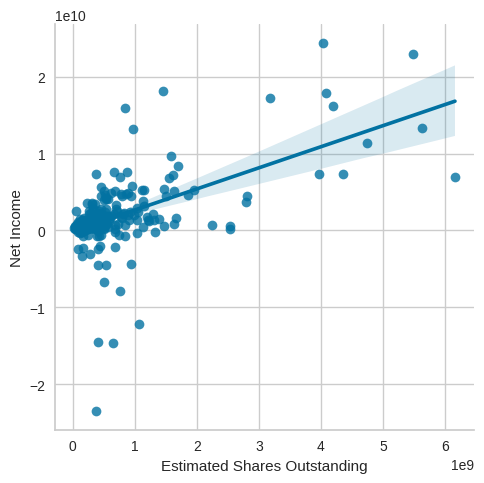

In [ ]:
sns.lmplot(data=df, x='Estimated Shares Outstanding', y='Net Income')
plt.show()

In [ ]:
df['Estimated Shares Outstanding']. corr(df['Net Income'])

0.5893104799543772

Observations:

*   There is a slight positive correlation between the variables 'Estimated Shares Outstanding' and 'Net Income', as seen in the correlation table.

#### Earnings Per Share vs Net Income

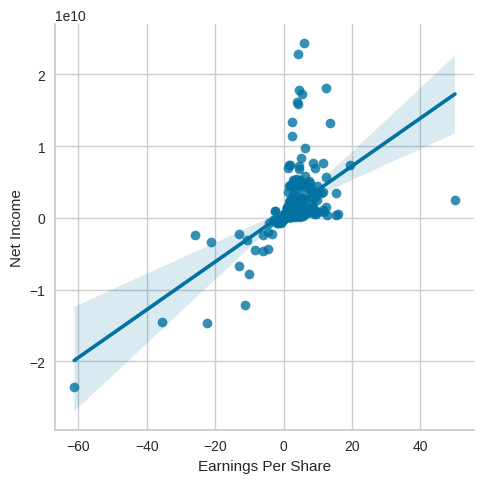

In [ ]:
sns.lmplot(data=df, x='Earnings Per Share', y='Net Income')
plt.show()

In [ ]:
df['Earnings Per Share']. corr(df['Net Income'])

0.5577524308905693

Observations:

*   There is a slight positive correlation between the variables 'Earnings Per Share' and 'Net Income', as seen in the correlation table.




#### Earnings Per Share vs ROE

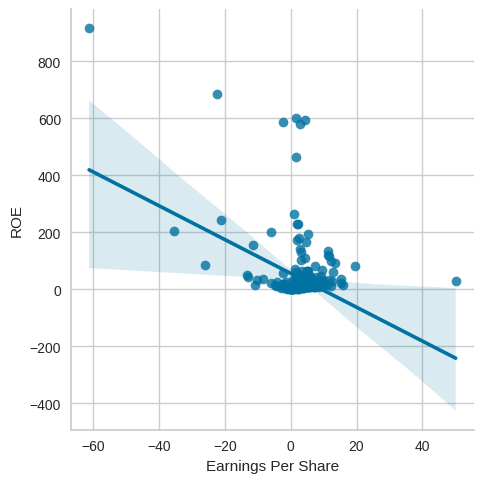

In [ ]:
sns.lmplot(data=df, x='Earnings Per Share', y='ROE')
plt.show()

In [ ]:
df['Earnings Per Share']. corr(df['ROE'])

-0.4052909235510204

Observations:

*   There is a slight negative correlation between the variables 'Earnings Per Share' and 'ROE', as seen in the correlation table.

#### Volatility vs Price Change

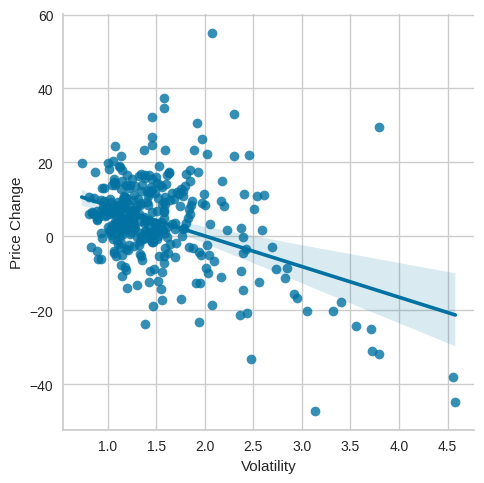

In [ ]:
sns.lmplot(data=df, x='Volatility', y='Price Change')
plt.show()

In [ ]:
df['Volatility']. corr(df['Price Change'])

-0.4082813872724409

Observations:

*   There is a slight negative correlation between the variables 'Volatility' and 'Price Change', as seen in the correlation table.

#### Security vs Current Price

In [ ]:
df_company_cp = df.groupby(['Security'])['Current Price'].mean().sort_values(ascending=False).reset_index()

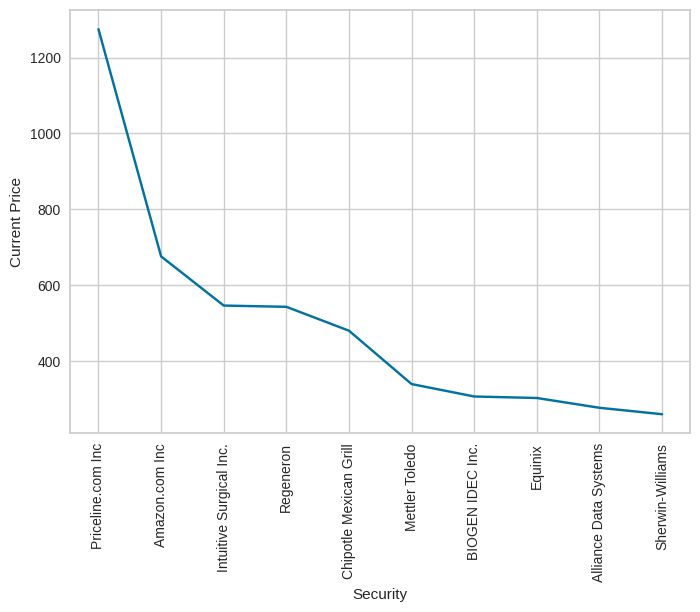

In [ ]:
# Companies with the highest current stock prices:
sns.lineplot(data=df_company_cp.head(10), x='Security', y='Current Price')
plt.xticks(rotation=90)
plt.show()

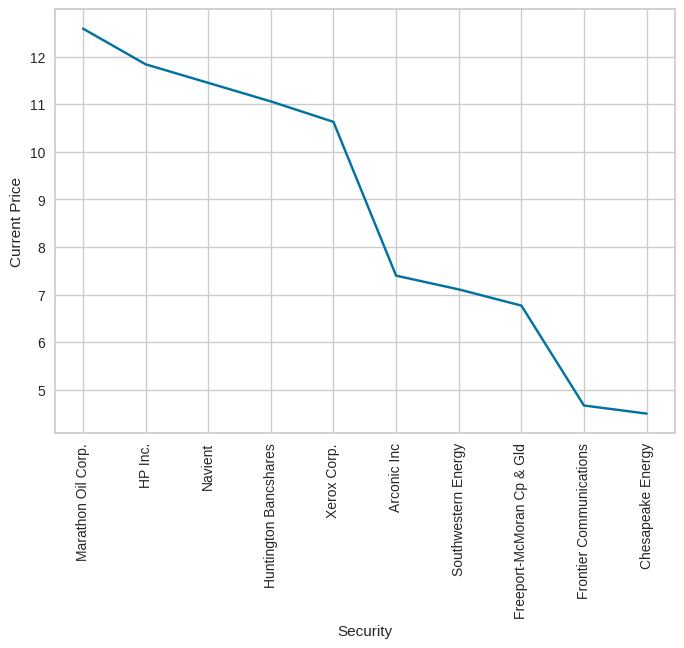

In [ ]:
# Companies with the lowest current stock prices:
sns.lineplot(data=df_company_cp.tail(10), x='Security', y='Current Price')
plt.xticks(rotation=90)
plt.show()

Observations:

*   5 companies with the highest current stock prices are:
      1. Priceline.com Inc
      2. Amazon.com Inc
      3. Intuitive Surgical Inc.
      4. Regeneron
      5. Chipotle Mexican Grill
      
*   5 companies with the lowest current stock prices are:
      1. Chesapeake Energy
      2. Frontier Communications
      3. Freeport-McMoran Cp & Gld
      4. Southwestern Energy
      5. Arconic Inc



#### Security vs Price Change

In [ ]:
df_company_pricechange = df.groupby(['Security'])['Price Change'].mean().sort_values(ascending=False).reset_index()

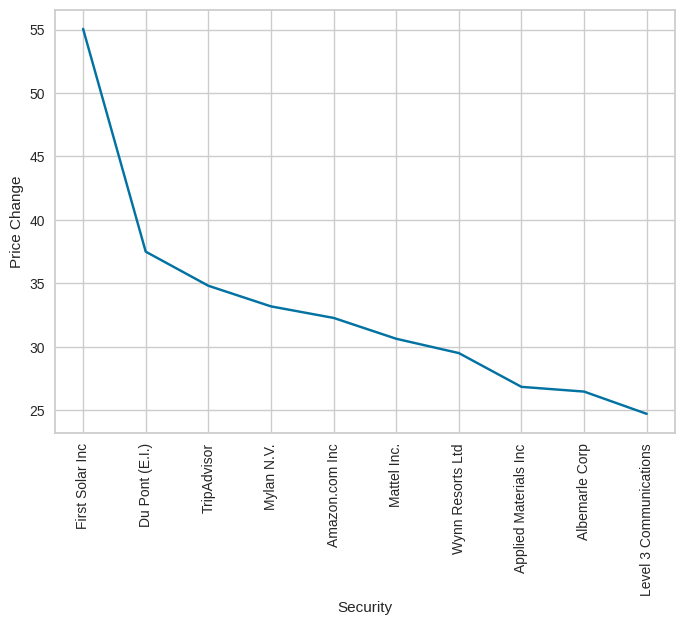

In [ ]:
# Companies with the highest positive percentage change in the stock price in 13 weeks:
sns.lineplot(data=df_company_pricechange.head(10), x='Security', y='Price Change')
plt.xticks(rotation=90)
plt.show()

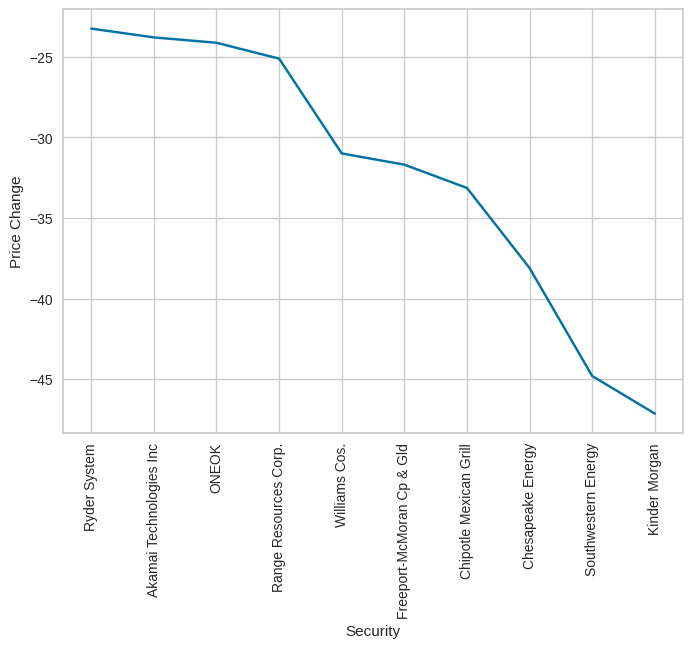

In [ ]:
# Companies with the highest negative percentage change in the stock price in 13 weeks:
sns.lineplot(data=df_company_pricechange.tail(10), x='Security', y='Price Change')
plt.xticks(rotation=90)
plt.show()

Observations:

*   5 Companies with the highest positive percentage change in the stock price in 13 weeks are as follows:
    1. First Solar Inc
    2. Du Pont (E.I.)
    3. TripAdvisor
    4. Mylan N.V.
    5. Amazon.com Inc<br>
    The stock prices of these comapnies seem to have increased and hence they have a positive percentage change.
*   5 Companies with the highest negative percentage change in the stock price in 13 weeks are:
    1. Kinder Morgan
    2. Southwestern Energy
    3. Chesapeake Energy
    4. Chipotle Mexican Grill
    5. Freeport-McMoran Cp & Gld	 <br>
    The stock prices of these companies seem to have decreased and hence they have a negative percentage change.



#### Security vs Volatility

In [ ]:
df_company_volatility = df.groupby(['Security'])['Volatility'].mean().sort_values(ascending=False).reset_index()

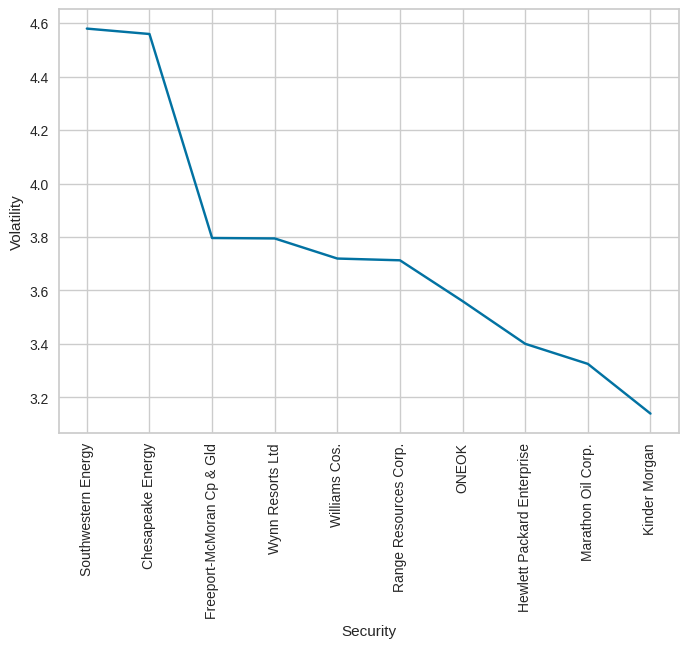

In [ ]:
# Companies with the highest standard deviation of the stock price over the past 13 weeks:
sns.lineplot(data=df_company_volatility.head(10), x='Security', y='Volatility')
plt.xticks(rotation=90)
plt.show()

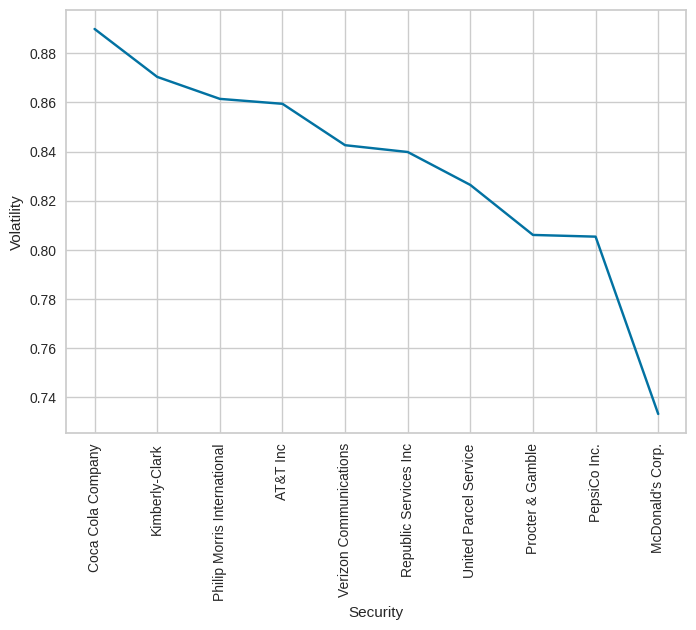

In [ ]:
# Companies with the lowest standard deviation of the stock price over the past 13 weeks:
sns.lineplot(data=df_company_volatility.tail(10), x='Security', y='Volatility')
plt.xticks(rotation=90)
plt.show()

Observations:

*   5 Companies with the highest volatility are as follows:
    1. Southwestern Energy
    2. Chesapeake Energy
    3. Freeport-McMoran Cp & Gld
    4. Wynn Resorts Ltd
    5. Williams Cos.

*   5 Companies with the lowest volatility are as follows:
    1. McDonald's Corp.
    2. PepsiCo Inc.
    3. Procter & Gamble
    4. United Parcel Service
    5. Republic Services Inc

#### Security vs Net Cash Flow

In [ ]:
df_company_ncf = df.groupby(['Security'])['Net Cash Flow'].mean().sort_values(ascending=False).reset_index()

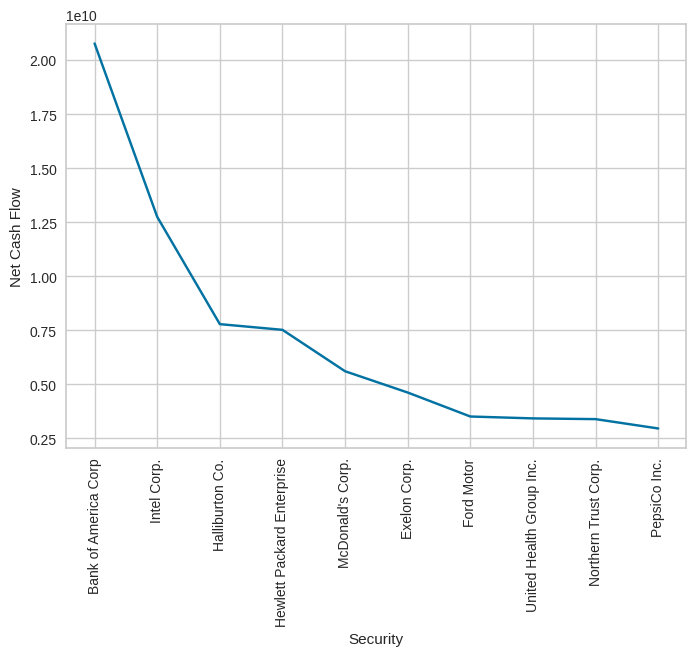

In [ ]:
# Companies with the highest difference between their cash inflows and outflows:
sns.lineplot(data=df_company_ncf.head(10), x='Security', y='Net Cash Flow')
plt.xticks(rotation=90)
plt.show()

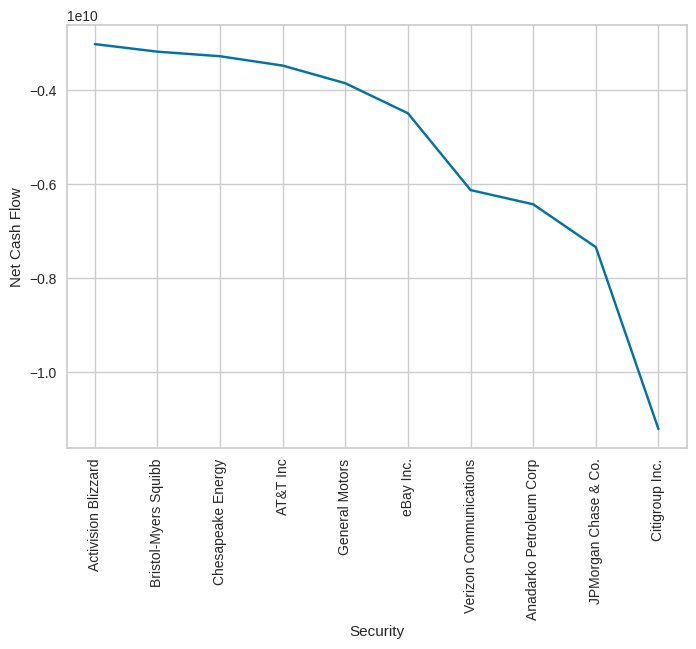

In [ ]:
# Companies with the highest difference between their cash inflows and outflows:
sns.lineplot(data=df_company_ncf.tail(10), x='Security', y='Net Cash Flow')
plt.xticks(rotation=90)
plt.show()

Observations:

*   5 Companies with the highest net cash flow are as follows:
    1. Bank of America Corp
    2. Intel Corp.
    3. Halliburton Co.
    4. Hewlett Packard Enterprise
    5. McDonald's Corp.

*   5 Companies with the lowest net cash flow are as follows:
    1. Citigroup Inc.
    2. JPMorgan Chase & Co.
    3. Anadarko Petroleum Corp
    4. Verizon Communications
    5. eBay Inc.

#### Security vs Net Income

In [ ]:
df_company_ninc = df.groupby(['Security'])['Net Income'].mean().sort_values(ascending=False).reset_index()

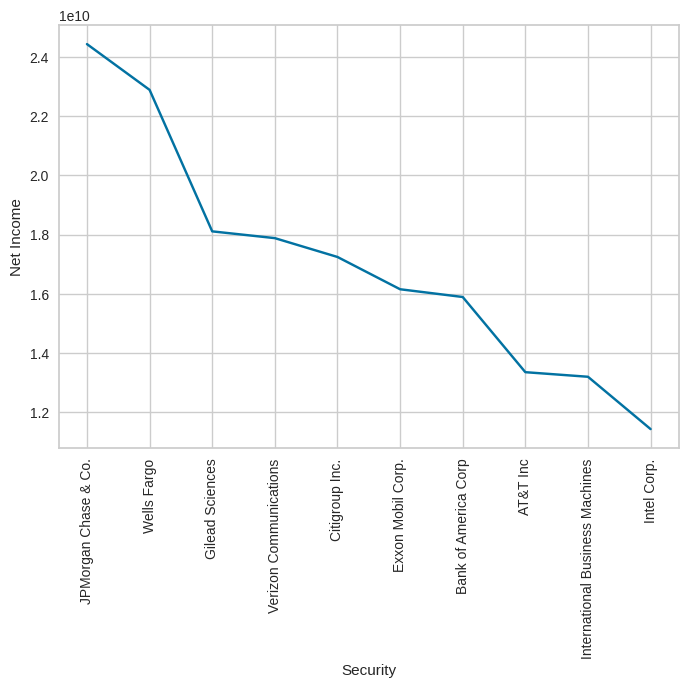

In [ ]:
# Companies with the highest net income:
sns.lineplot(data=df_company_ninc.head(10), x='Security', y='Net Income')
plt.xticks(rotation=90)
plt.show()

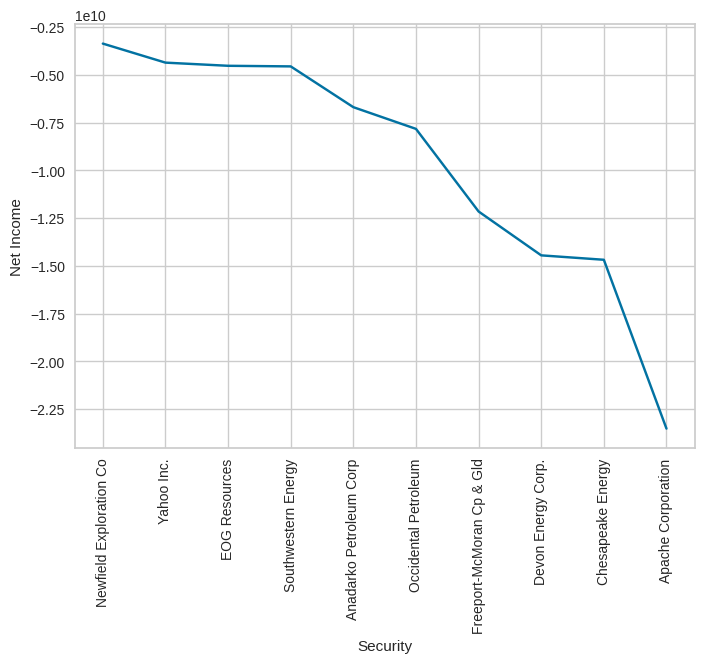

In [ ]:
# Companies with the lowest net income:
sns.lineplot(data=df_company_ninc.tail(10), x='Security', y='Net Income')
plt.xticks(rotation=90)
plt.show()

Observations:

*   5 Companies with the highest net income are as follows:
    1. JPMorgan Chase & Co.
    2. Wells Fargo
    3. Gilead Sciences
    4. Verizon Communications
    5. Citigroup Inc.

*   5 Companies with the lowest net income are as follows:
    1. Apache Corporation
    2. Chesapeake Energy
    3. Devon Energy Corp.
    4. Freeport-McMoran Cp & Gld
    5. Occidental Petroleum<br>
    The net income of these companies is negative, which indicates that these companies are incurring losses.

#### Security vs Earning Per Share

In [ ]:
df_company_eps = df.groupby(['Security'])['Earnings Per Share'].mean().sort_values(ascending=False).reset_index()

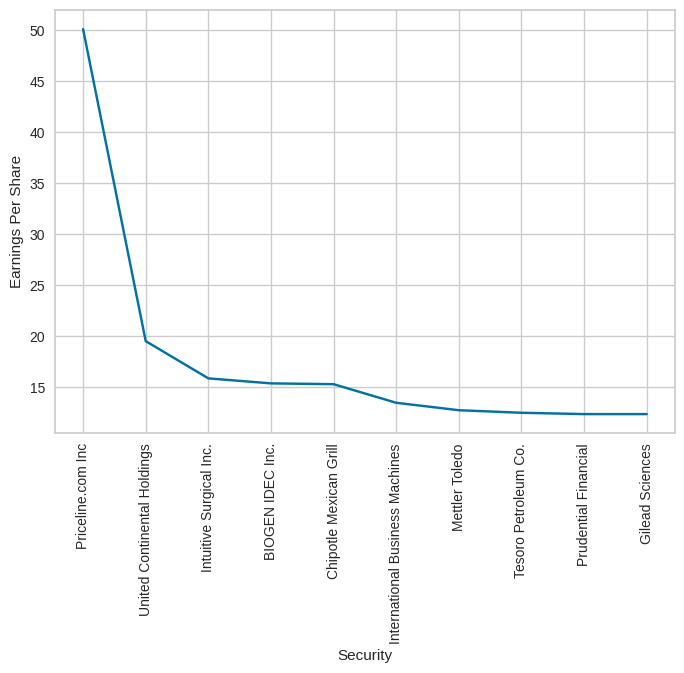

In [ ]:
# Companies with the highest earnings per share:
sns.lineplot(data=df_company_eps.head(10), x='Security', y='Earnings Per Share')
plt.xticks(rotation=90)
plt.show()

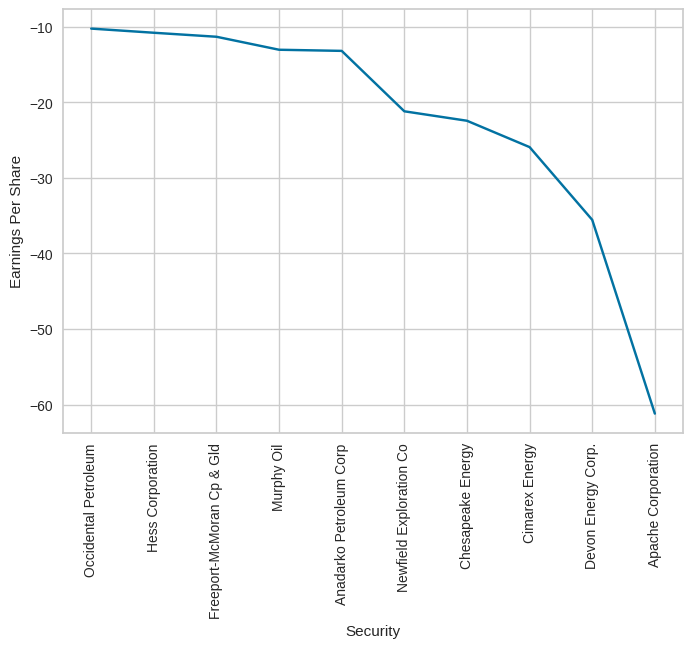

In [ ]:
# Companies with the lowest earnings per share:
sns.lineplot(data=df_company_eps.tail(10), x='Security', y='Earnings Per Share')
plt.xticks(rotation=90)
plt.show()

Observations:

*   5 Companies with the highest earnings per share are as follows:
    1. Priceline.com Inc
    2. United Continental Holdings
    3. Intuitive Surgical Inc.
    4. BIOGEN IDEC Inc.
    5. Chipotle Mexican Grill

*   5 Companies with the lowest earnings per share are as follows:
    1. Apache Corporation
    2. Devon Energy Corp.
    3. Cimarex Energy
    4. Chesapeake Energy
    5. Newfield Exploration Co	<br>
    The earnings per share of these companies is negative, which indicates that these companies are losing money, or spending more than they are earning.


### **Questions**

#### Q1: What does the distribution of stock prices look like?


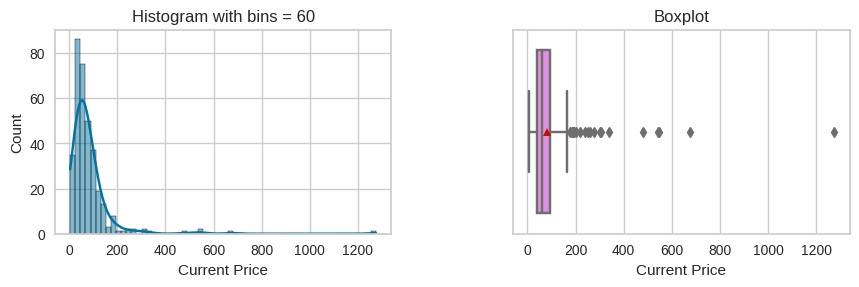

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'Current Price':
creating_hist_box(df, 'Current Price' , kde= True, bins=60)

In [ ]:
df['Current Price'].describe()

count    340.00000
mean      80.86234
std       98.05509
min        4.50000
25%       38.55500
50%       59.70500
75%       92.88000
max     1274.94995
Name: Current Price, dtype: float64

Observations:

*   The distribution for the current stock price is highly right-skewed.
*   The average current stock price is \$80.86 which is more than the median prevailing wage at \$59.70.
*   The minimum current stock price is \$4.50 while the maximum current stock price is \$1274.95.
*   The standard deviation is \$98.05.
*   There are outlier values on the higher end of the distribution for the column 'Current Price'.
*   Majority of the stocks have current price within \$200.

#### Q2: The stocks of which economic sector have seen the maximum price increase on average?


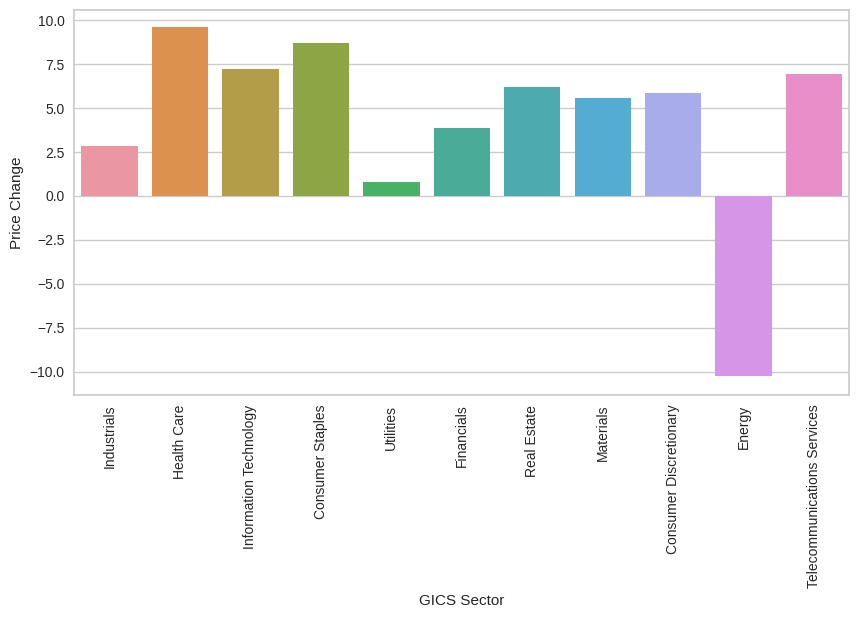

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.58565
Consumer Staples                8.68475
Information Technology          7.21748
Telecommunications Services     6.95698
Real Estate                     6.20555
Consumer Discretionary          5.84609
Materials                       5.58974
Financials                      3.86541
Industrials                     2.83313
Utilities                       0.80366
Energy                        -10.22829
Name: Price Change, dtype: float64

Observations:

*   The Energy sector has the highest percentage change in the stock prices in 13 weeks (in terms of magnitude), while the Utilities sector has the least percentage change.
*   However, the change in the energy sector is negative, which indicates over the past 13 weeks the stock prices of the energy sector have dropped.
*   All the other sectors have a positive change in stock prices which indicates an increase in the respective stock prices over past 13 weeks .
*   Below are the sectors with the highest changes in stock prices:

GISC Sector| Price Change(%)
-|-
Energy | -10.23
Health Care | 9.58
Consumer Staples | 8.68
Information Technology | 7.22
Telecommunications Services | 6.96

*   Below are the sectors with the lowest changes in stock prices:

GISC Sector| Price Change(%)
-|-
Uitilities | 0.80
Industrials | 2.83
Financials | 3.86

*   Health care sector has the the maximum price increase while Energy sector has the maximum price decrease.

#### Q3: How are the different variables correlated with each other?


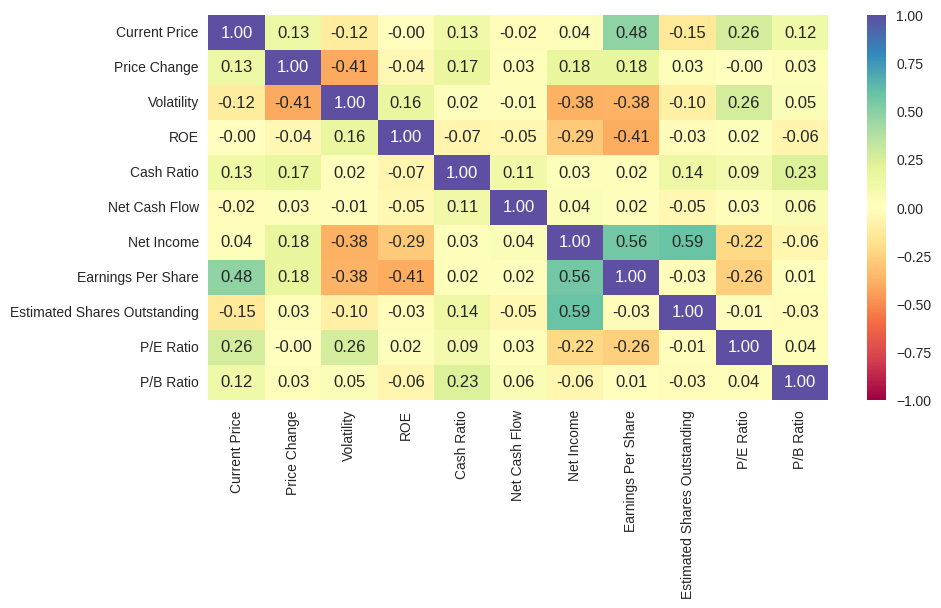

In [ ]:
num_cols = df.select_dtypes(include='number').columns.to_list()
#Heatmap showing correlation values between different variables.
plt.figure(figsize=(10, 5))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

*   No significant values of high correlation among variables were observed.
*   Most positive correlation value is at 0.59, while the most negative correlation value is at -0.41
*   Most positively correlated variables are:

Variables | Correlation Value
----------|-------------------
Estimated Shares Outstanding & Net Income | 0.59
Earnings Per Share & Net Income | 0.56
Earnings Per Share & Current Price | 0.48


*   Most negatively correlated variables are:

Variables | Correlation Value
----------|-------------------
Earnings Per Share & ROE | -0.41
Volatility & Price Change | -0.41
Volatility & Net Income | -0.38
Volatility & Earnings Per Share | -0.38
ROE & Net Income | -0.29

#### Q4: Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?


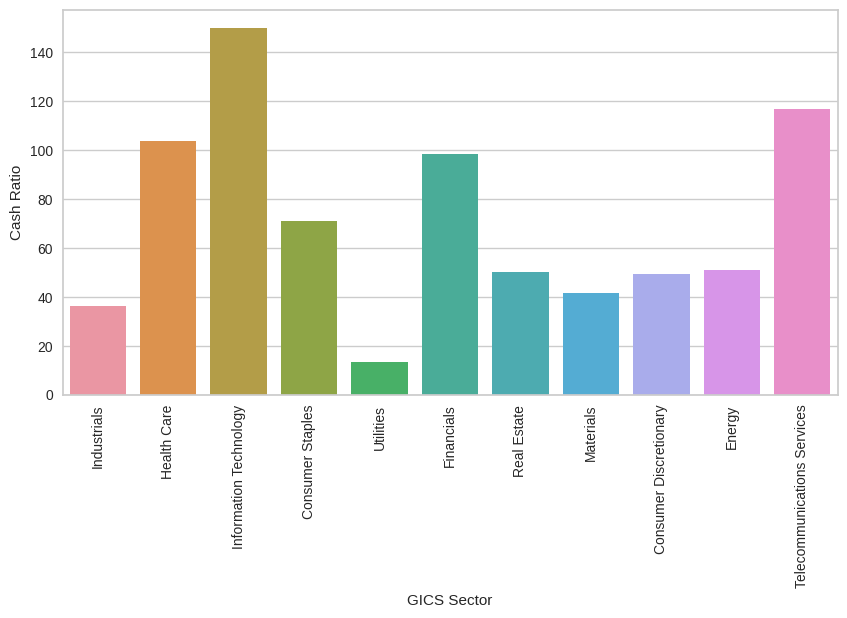

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology        149.81818
Telecommunications Services   117.00000
Health Care                   103.77500
Financials                     98.59184
Consumer Staples               70.94737
Energy                         51.13333
Real Estate                    50.11111
Consumer Discretionary         49.57500
Materials                      41.70000
Industrials                    36.18868
Utilities                      13.62500
Name: Cash Ratio, dtype: float64

Observations:

*   The companies in the Information Technology sector have the highest cash ratios, while the Utilities sector has the least.
*   Below are the sectors with the highest cash ratios:

GISC Sector| Cash Ratio
-|-
Information Technology | 149.82
Telecommunications Services | 117.00
Health Care | 103.77
Financials | 98.59
Consumer Staples | 70.95

*   Below are the sectors with the lowest cash ratios:

GISC Sector| Cash Ratio
-|-
Uitilities | 13.62
Industrials | 36.19
Materials | 41.70


#### Q5: P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

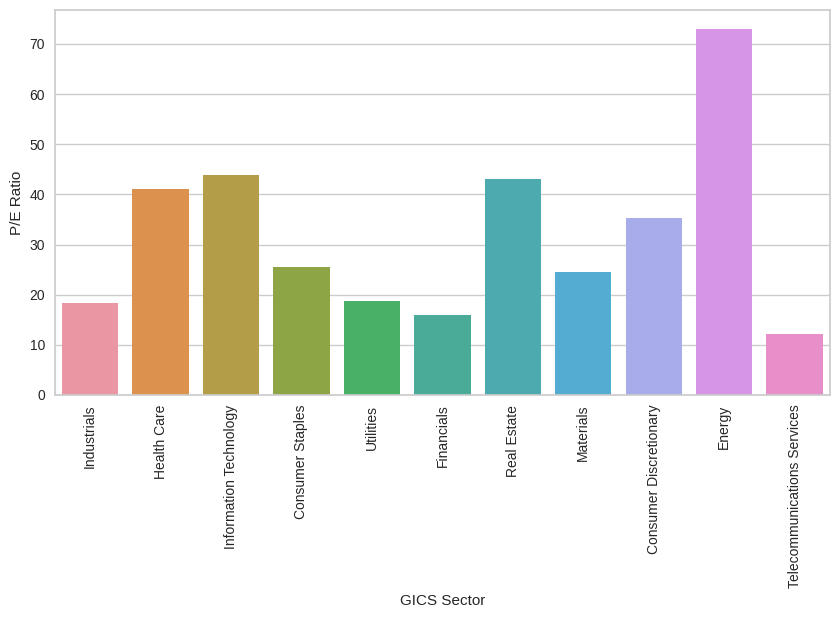

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                        72.89771
Information Technology        43.78255
Real Estate                   43.06558
Health Care                   41.13527
Consumer Discretionary        35.21161
Consumer Staples              25.52120
Materials                     24.58535
Utilities                     18.71941
Industrials                   18.25938
Financials                    16.02315
Telecommunications Services   12.22258
Name: P/E Ratio, dtype: float64

Observations:

*   The companies in the Energy sector have the highest P/E ratios, while the Telecommunications Sevices sector has the least.
*   Below are the sectors with the highest P/E ratios:

GISC Sector| P/E Ratio
-|-
Energy | 72.88
Information Technology | 43.78
Real Estate | 43.06
Health Care | 41.13
Consumer Discretionary | 35.21

*   Below are the sectors with the lowest P/E ratios:

GISC Sector| P/E Ratio
-|-
Telecommunications Services  | 12.22
Financials | 16.02
Industrials | 18.26

## **Data Preprocessing**


### **Outlier Treatment**




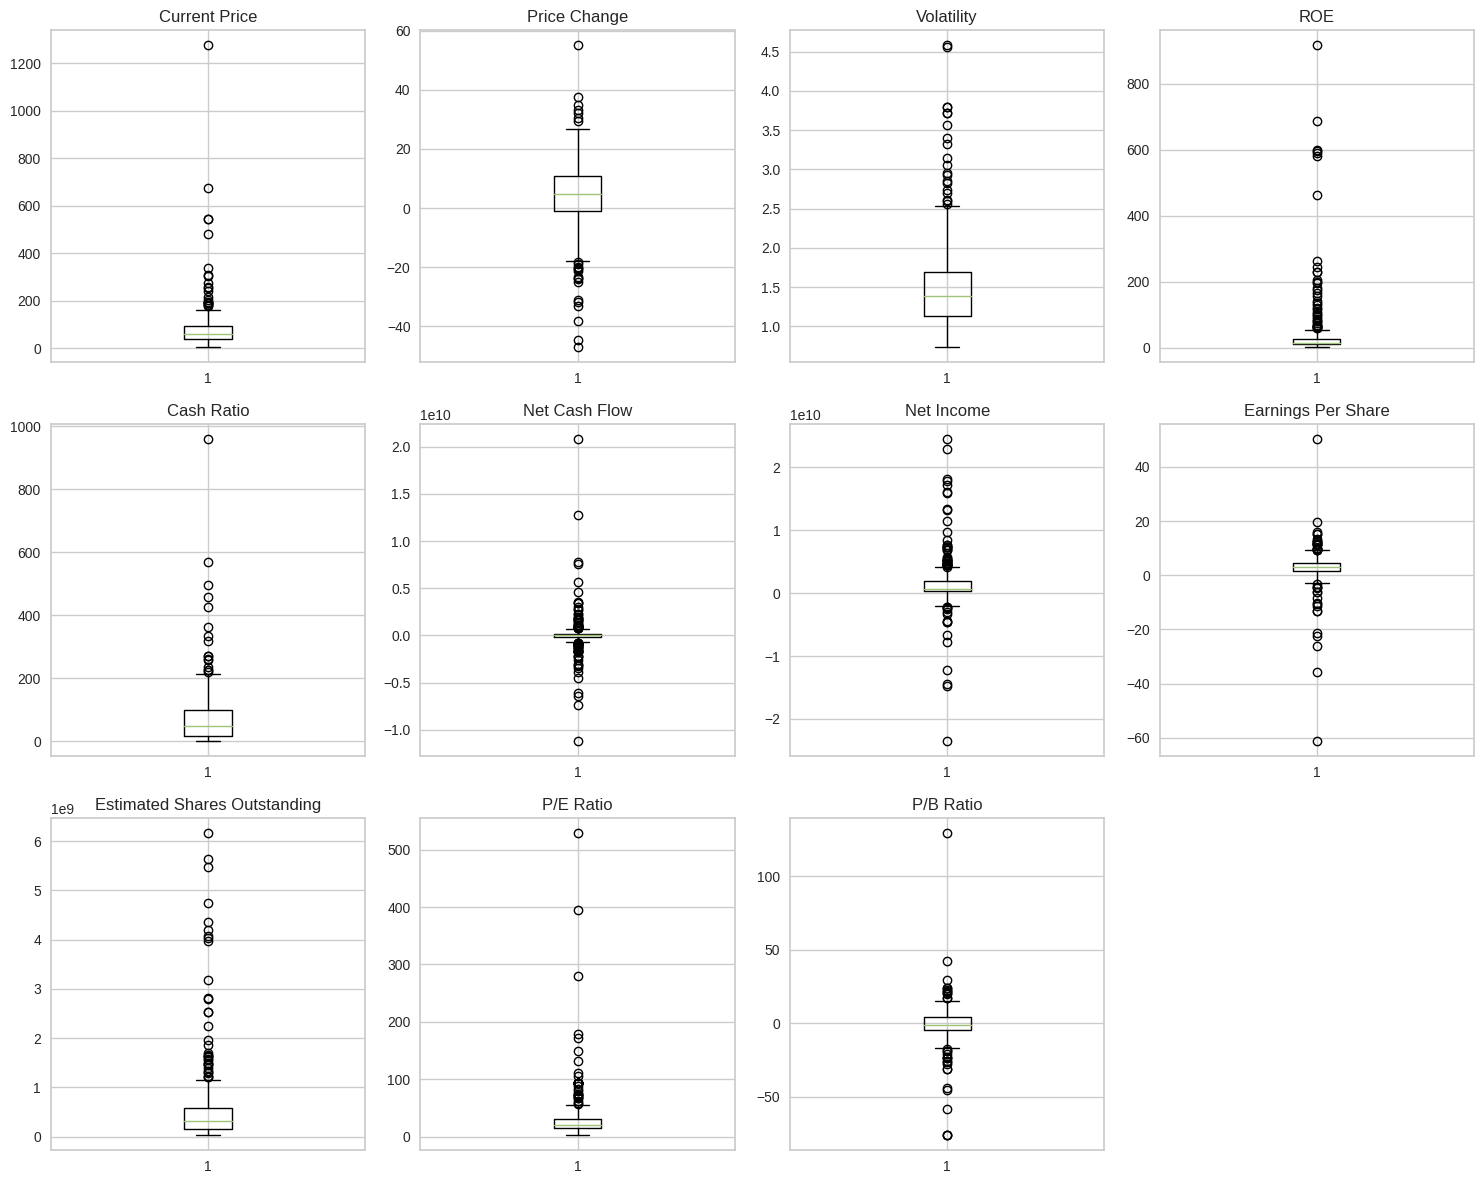

In [ ]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

*   There are quite a few outliers in the data. We will not treat them as they are proper values.

### **Scaling the Data**

The data needs to be scaled so that a similar weightage is given to all the variables. This has been done using the StandardScalar() function. This standardizes the features by removing the mean and scaling to unit variance.

In [ ]:
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe of the scaled columns:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    float64
 4   Cash Ratio                    340 non-null    float64
 5   Net Cash Flow                 340 non-null    float64
 6   Net Income                    340 non-null    float64
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
dtypes: float64(11)
memory usage: 29.3 KB


## **Exploratory Data Analysis (EDA)**
To check if performing feature engineering has resulted in any major changes to the dataset.

In [ ]:
# Statistical summary of the scaled dataset:
subset_scaled_df.describe().T

count     mean     std      min      25%  \
Current Price                340.00000  0.00000 1.00147 -0.77992 -0.43210   
Price Change                 340.00000 -0.00000 1.00147 -4.27136 -0.41854   
Volatility                   340.00000 -0.00000 1.00147 -1.34164 -0.66184   
ROE                          340.00000  0.00000 1.00147 -0.40036 -0.30960   
Cash Ratio                   340.00000 -0.00000 1.00147 -0.77556 -0.57619   
Net Cash Flow                340.00000  0.00000 1.00147 -5.79549 -0.12835   
Net Income                   340.00000  0.00000 1.00147 -6.35998 -0.29029   
Earnings Per Share           340.00000  0.00000 1.00147 -9.72573 -0.18534   
Estimated Shares Outstanding 340.00000 -0.00000 1.00147 -0.65043 -0.49512   
P/E Ratio                    340.00000  0.00000 1.00147 -0.67016 -0.39671   
P/B Ratio                    340.00000  0.00000 1.00147 -5.33479 -0.18885   

                                  50%      75%      max  
Current Price                -0.21609  0.12274 12.19567  
Price Change                  0.06183  0.55196  4.25181  
Volatility                   -0.23756  0.28696  5.16826  
ROE                          -0.25514 -0.13067  9.10118  
Cash Ratio                   -0.25500  0.32093  9.83491  
Net Cash Flow                -0.02750  0.05880 10.65524  
Net Income                   -0.20005  0.10284  5.83263  
Earnings Per Share            0.01799  0.28022  7.19257  
Estimated Shares Outstanding -0.31654 -0.00463  6.60932  
P/E Ratio                    -0.26630 -0.01915 11.18762  
P/B Ratio                     0.04668  0.40407  9.37756

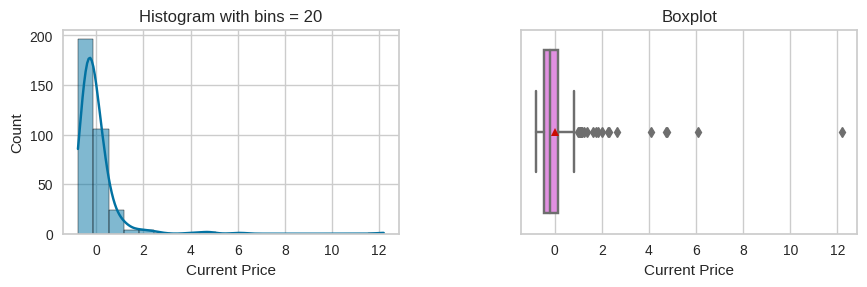

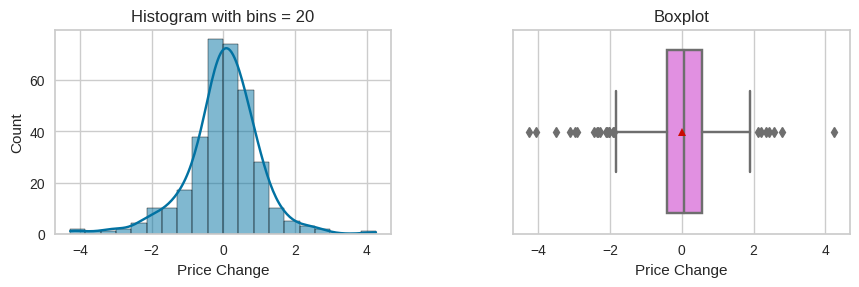

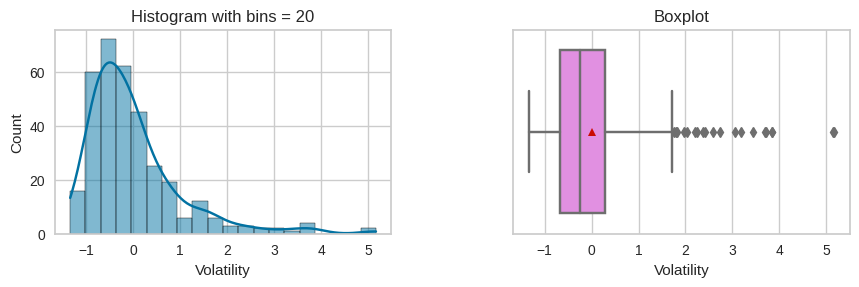

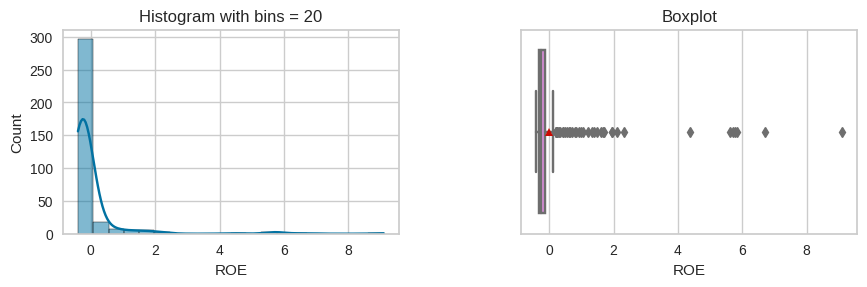

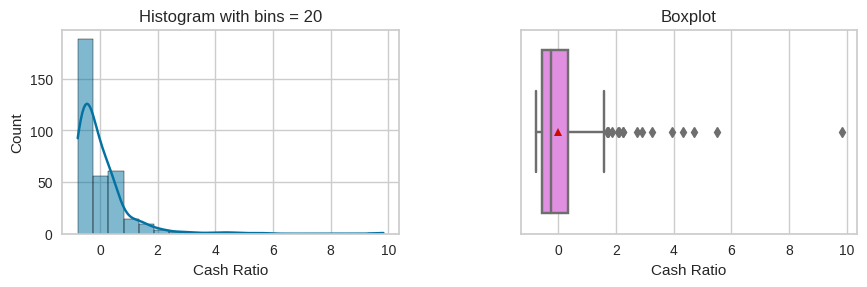

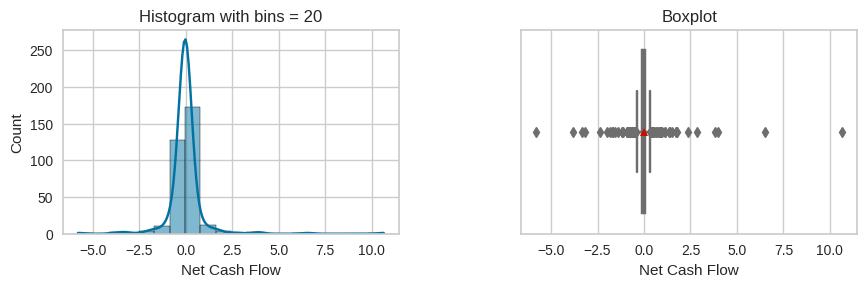

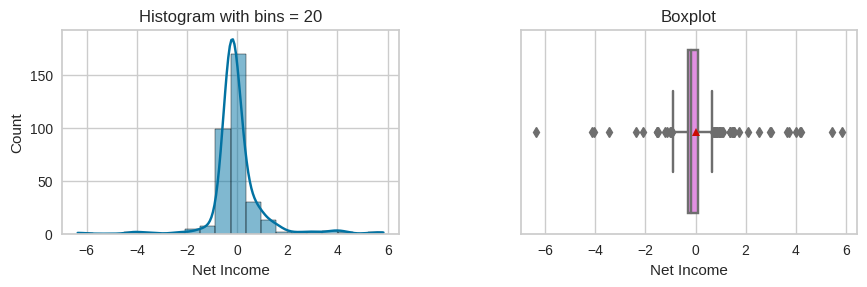

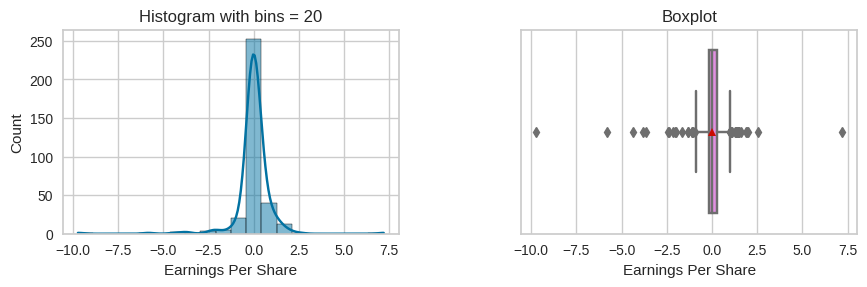

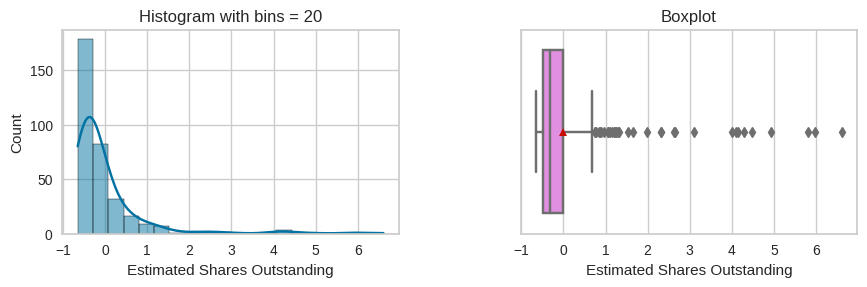

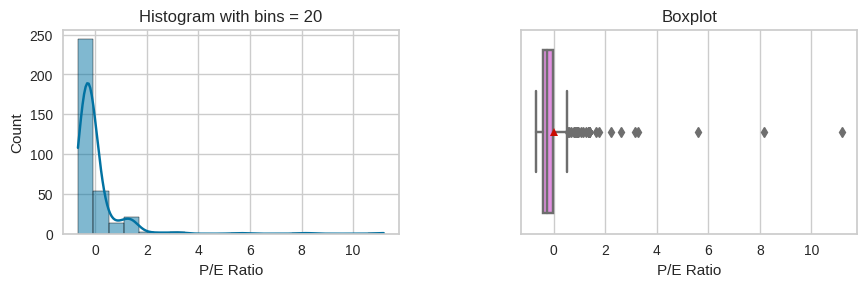

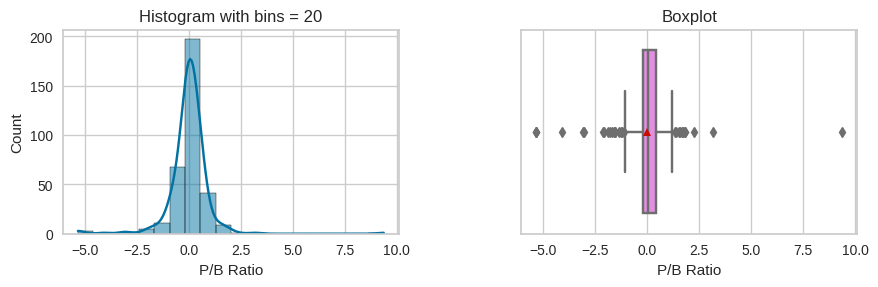

In [ ]:
# Plotting histograms and boxplots for all the variables in one go :
for feature in subset_scaled_df.columns:
    creating_hist_box(subset_scaled_df, feature, bins=20)

In [ ]:
#Calculating correlation among the variables :
subset_df_corr = subset_scaled_df[num_cols].corr()
subset_df_corr

Current Price  Price Change  Volatility  \
Current Price                       1.00000       0.13498    -0.12426   
Price Change                        0.13498       1.00000    -0.40828   
Volatility                         -0.12426      -0.40828     1.00000   
ROE                                -0.00055      -0.04331     0.16253   
Cash Ratio                          0.12782       0.16859     0.02061   
Net Cash Flow                      -0.02196       0.02675    -0.01417   
Net Income                          0.03663       0.17930    -0.38343   
Earnings Per Share                  0.47960       0.17540    -0.37931   
Estimated Shares Outstanding       -0.14531       0.03366    -0.09570   
P/E Ratio                           0.26027      -0.00249     0.26360   
P/B Ratio                           0.12463       0.03433     0.04653   

                                  ROE  Cash Ratio  Net Cash Flow  Net Income  \
Current Price                -0.00055     0.12782       -0.02196     0.03663   
Price Change                 -0.04331     0.16859        0.02675     0.17930   
Volatility                    0.16253     0.02061       -0.01417    -0.38343   
ROE                           1.00000    -0.06912       -0.05220    -0.28852   
Cash Ratio                   -0.06912     1.00000        0.11382     0.02859   
Net Cash Flow                -0.05220     0.11382        1.00000     0.04423   
Net Income                   -0.28852     0.02859        0.04423     1.00000   
Earnings Per Share           -0.40529     0.02476        0.01935     0.55775   
Estimated Shares Outstanding -0.03029     0.13587       -0.05139     0.58931   
P/E Ratio                     0.02334     0.08948        0.02688    -0.22402   
P/B Ratio                    -0.06322     0.22967        0.05704    -0.06154   

                              Earnings Per Share  \
Current Price                            0.47960   
Price Change                             0.17540   
Volatility                              -0.37931   
ROE                                     -0.40529   
Cash Ratio                               0.02476   
Net Cash Flow                            0.01935   
Net Income                               0.55775   
Earnings Per Share                       1.00000   
Estimated Shares Outstanding            -0.02691   
P/E Ratio                               -0.26066   
P/B Ratio                                0.01491   

                              Estimated Shares Outstanding  P/E Ratio  \
Current Price                                     -0.14531    0.26027   
Price Change                                       0.03366   -0.00249   
Volatility                                        -0.09570    0.26360   
ROE                                               -0.03029    0.02334   
Cash Ratio                                         0.13587    0.08948   
Net Cash Flow                                     -0.05139    0.02688   
Net Income                                         0.58931   -0.22402   
Earnings Per Share                                -0.02691   -0.26066   
Estimated Shares Outstanding                       1.00000   -0.01455   
P/E Ratio                                         -0.01455    1.00000   
P/B Ratio                                         -0.02816    0.03642   

                              P/B Ratio  
Current Price                   0.12463  
Price Change                    0.03433  
Volatility                      0.04653  
ROE                            -0.06322  
Cash Ratio                      0.22967  
Net Cash Flow                   0.05704  
Net Income                     -0.06154  
Earnings Per Share              0.01491  
Estimated Shares Outstanding   -0.02816  
P/E Ratio                       0.03642  
P/B Ratio                       1.00000

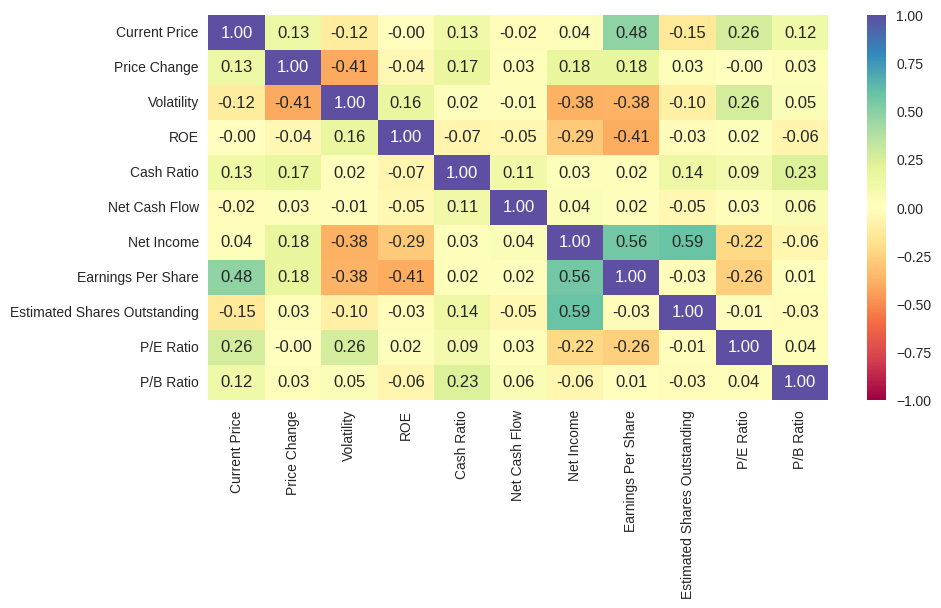

In [ ]:
#Heatmap showing correlation values between different variables.
plt.figure(figsize=(10, 5))
sns.heatmap(subset_df_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

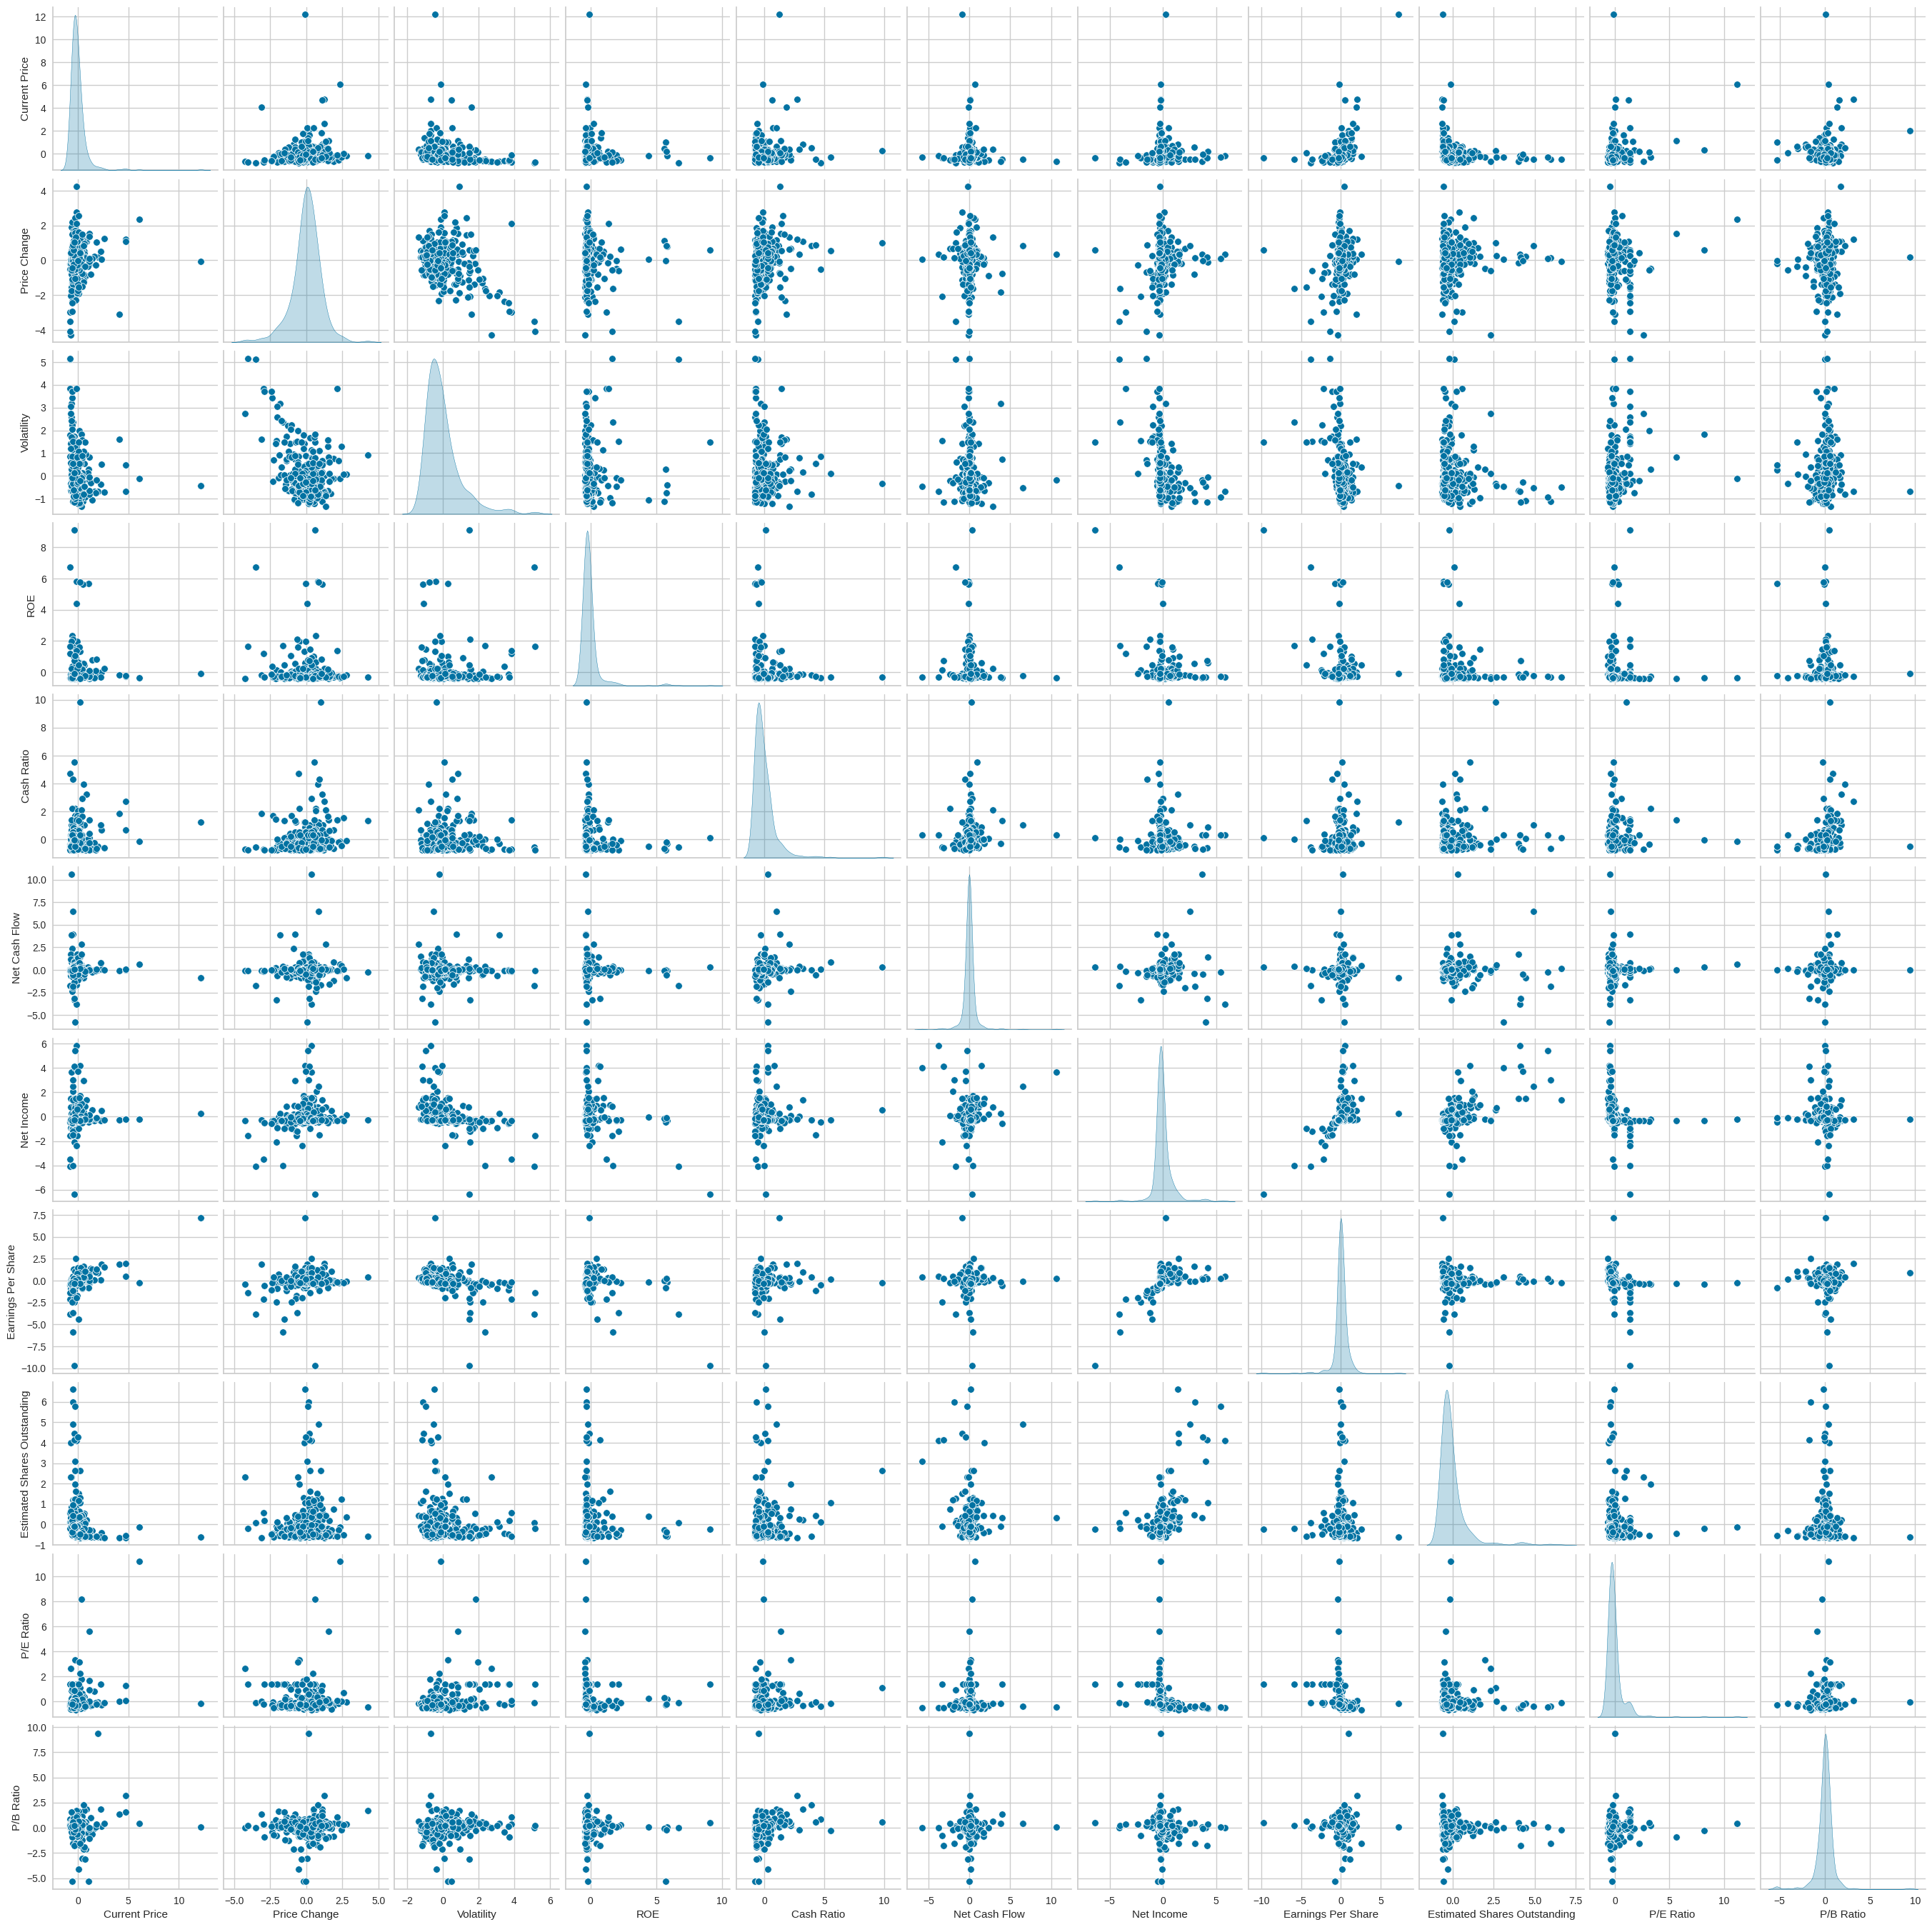

In [ ]:
sns.pairplot(data=subset_scaled_df, diag_kind="kde");
plt.show()

Observations:

*   All the numerical variables have been scaled so that their distributions have a mean value of 0 and a standard deviation of almost 1.
*   The statistical summary values such as min, max, and the different quartiles have also been calculated accordingly.
*   There are no changes in the correlation values among the different features.




## **K-means Clustering**

In [ ]:
# Creating a copy of the scaled data:
k_means_df = subset_scaled_df.copy()

#### Elbow Plot

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


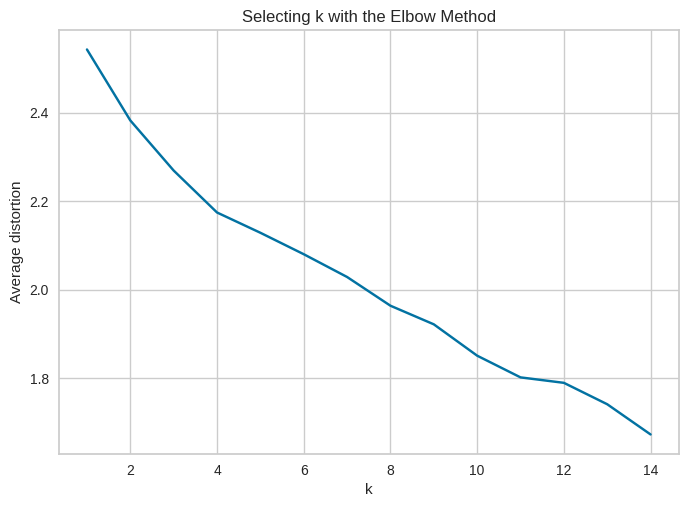

In [ ]:
#Creatig elbow plot :
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))/ subset_scaled_df.shape[0])
    meanDistortions.append(distortion)
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

Observations:

*   The plot seems to have elbows at cluster sizes 4, 8, and 11.
*   Cluster sizes below 4 seem to be too few while cluster sizes above 6 seem too many.
*   Hence, from the elbow plot the appropriate values of clusters seem to be 4, 5, or 6.


#### Silhouette Scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


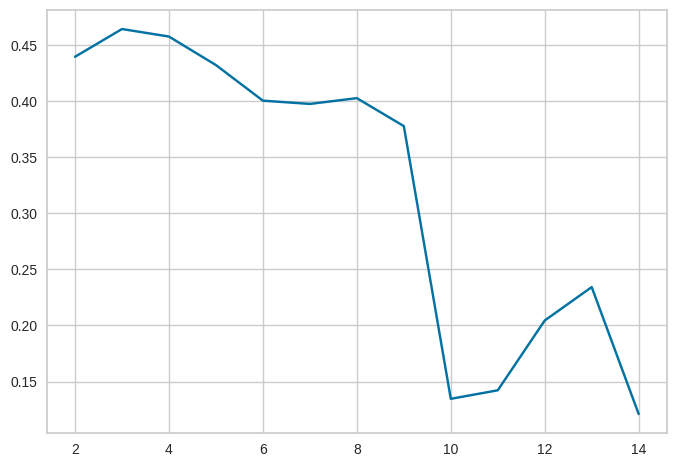

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Observations:

*   Following are the no of clusters and their respective silhouette coefficients:

Cluster Size | Silhouette Coefficient
-|-
3 | 0.46
4 | 0.46
5 | 0.43
6 | 0.40

*   Clusters with sizes 3 and 4 have the highest silhouette coefficient at 0.46.   
*   Also, as seen from the above plot, cluster sizes above 8 have very low silhouette scores. Since a low silhouette score indicates that the clusters are not well separable, hence we do not further analyze such a large number of clusters.
*   Hence, the appropriate number of clusters seems to be from the range of 3 to 6. These clusters have been further analyzed.




#### K-Means model with no of clusters = 4

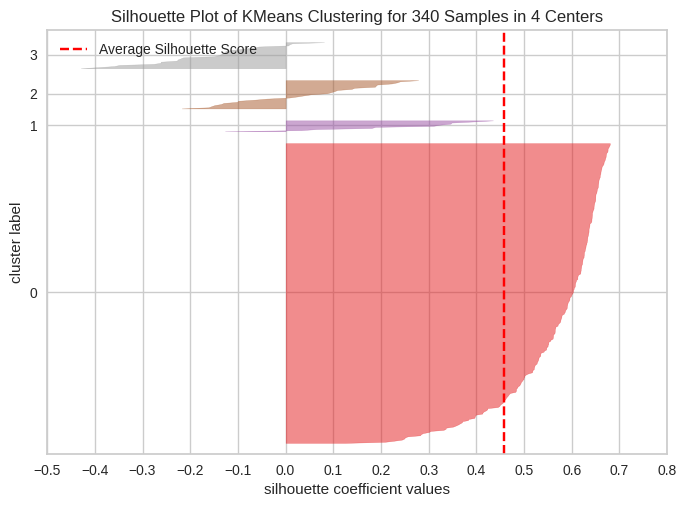

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# n_clusters = 4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans_4.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# creating a copy of the original and the scaled dataset:
df_kmeans_cluster_4 = df.copy()
k_means_df_4 = k_means_df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df_4["KM_segments"] = kmeans_4.labels_
df_kmeans_cluster_4["KM_segments"] = kmeans_4.labels_

Cluster Profiling using 4 clusters

In [ ]:
# Grouping the records using cluster labels:
km_cluster_profile_4 = df_kmeans_cluster_4.groupby('KM_segments').mean()

In [ ]:
# Calculating number of rows in each cluster:
km_cluster_profile_4["count_in_each_segment"] = (
    df_kmeans_cluster_4.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile_4.style.highlight_max(color="lightgreen", axis=0)

<Axes: xlabel='KM_segments'>

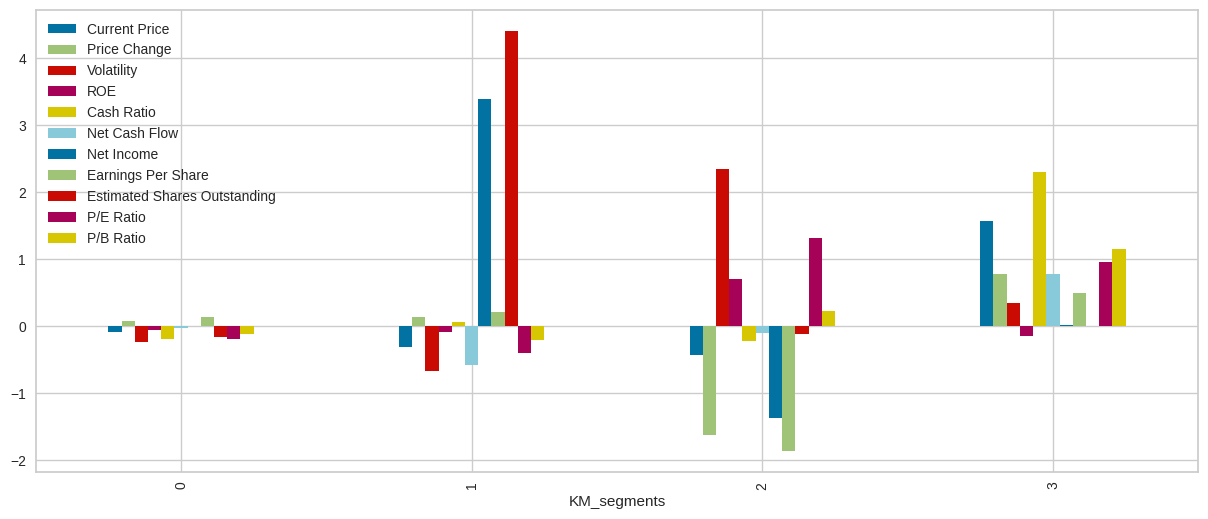

In [ ]:
k_means_df_4.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

#### K-Means model with no of clusters = 5

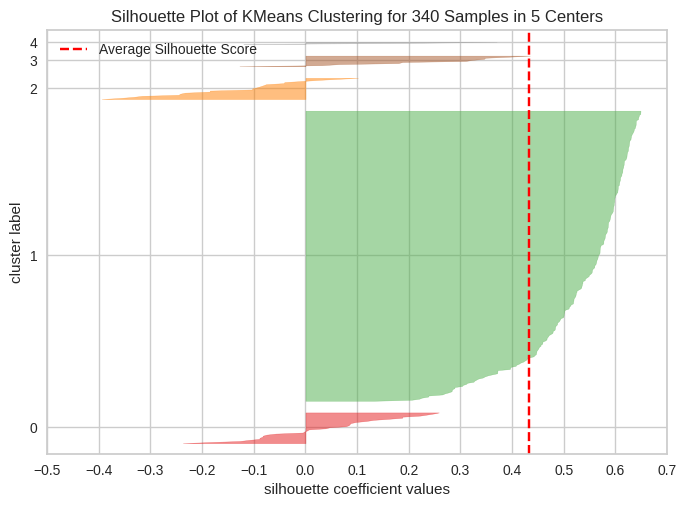

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# n_clusters = 5
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=1)  ## Complete the code to choose the number of clusters
kmeans_5.fit(k_means_df)

KMeans(n_clusters=5, random_state=1)

In [ ]:
# creating a copy of the original and the scaled dataset:
df_kmeans_cluster_5 = df.copy()
k_means_df_5 = k_means_df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df_5["KM_segments"] = kmeans_5.labels_
df_kmeans_cluster_5["KM_segments"] = kmeans_5.labels_

Cluster Profiling using 5 clusters

In [ ]:
# Grouping the records using cluster labels:
km_cluster_profile_5 = df_kmeans_cluster_5.groupby('KM_segments').mean()

In [ ]:
# Calculating number of rows in each cluster:
km_cluster_profile_5["count_in_each_segment"] = (
    df_kmeans_cluster_5.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile_5.style.highlight_max(color="lightgreen", axis=0)

<Axes: xlabel='KM_segments'>

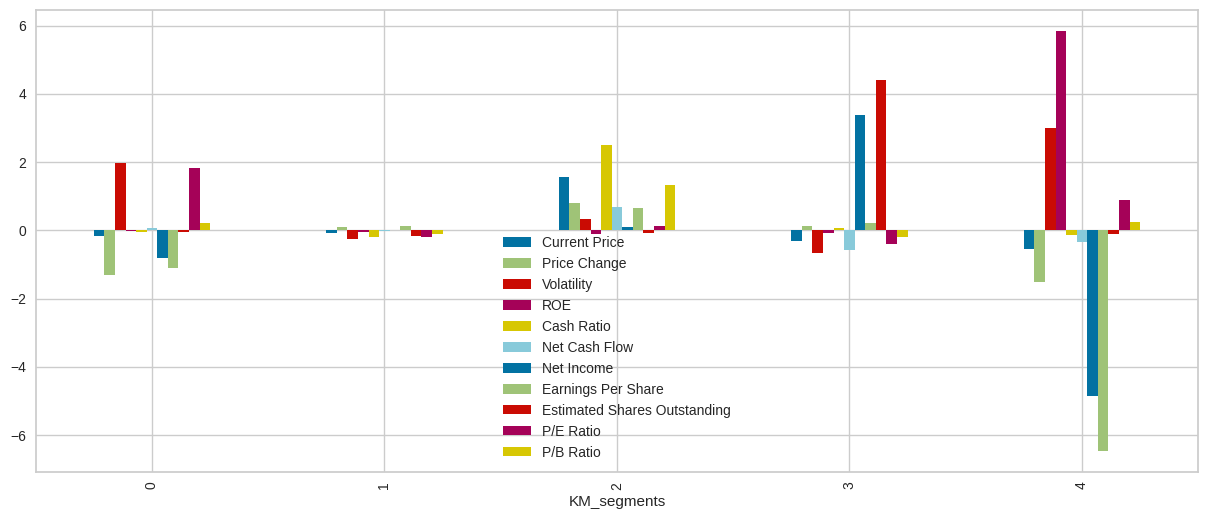

In [ ]:
k_means_df_5.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

#### K-Means model with no of clusters = 6

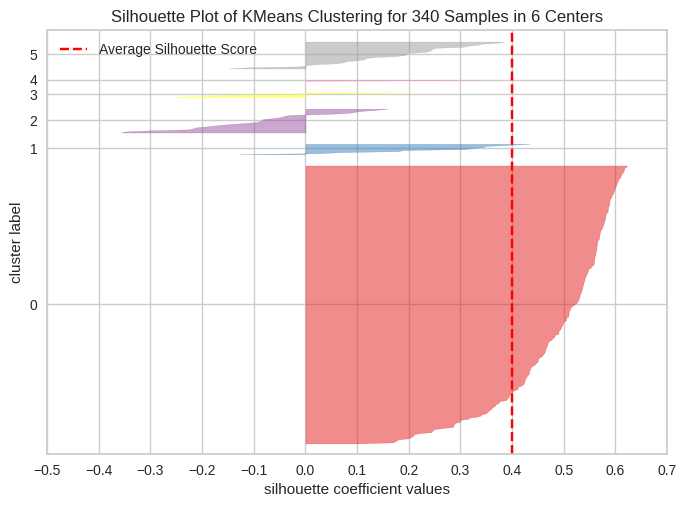

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# n_clusters = 6
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
kmeans_6 = KMeans(n_clusters=6, random_state=1)  ## Complete the code to choose the number of clusters
kmeans_6.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# creating a copy of the original and the scaled dataset:
df_kmeans_cluster_6 = df.copy()
k_means_df_6 = k_means_df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df_6["KM_segments"] = kmeans_6.labels_
df_kmeans_cluster_6["KM_segments"] = kmeans_6.labels_

Cluster Profiling using 6 clusters

In [ ]:
# Grouping the records using cluster labels:
km_cluster_profile_6 = df_kmeans_cluster_6.groupby('KM_segments').mean()

In [ ]:
# Calculating number of rows in each cluster:
km_cluster_profile_6["count_in_each_segment"] = (
    df_kmeans_cluster_6.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile_6.style.highlight_max(color="lightgreen", axis=0)

<Axes: xlabel='KM_segments'>

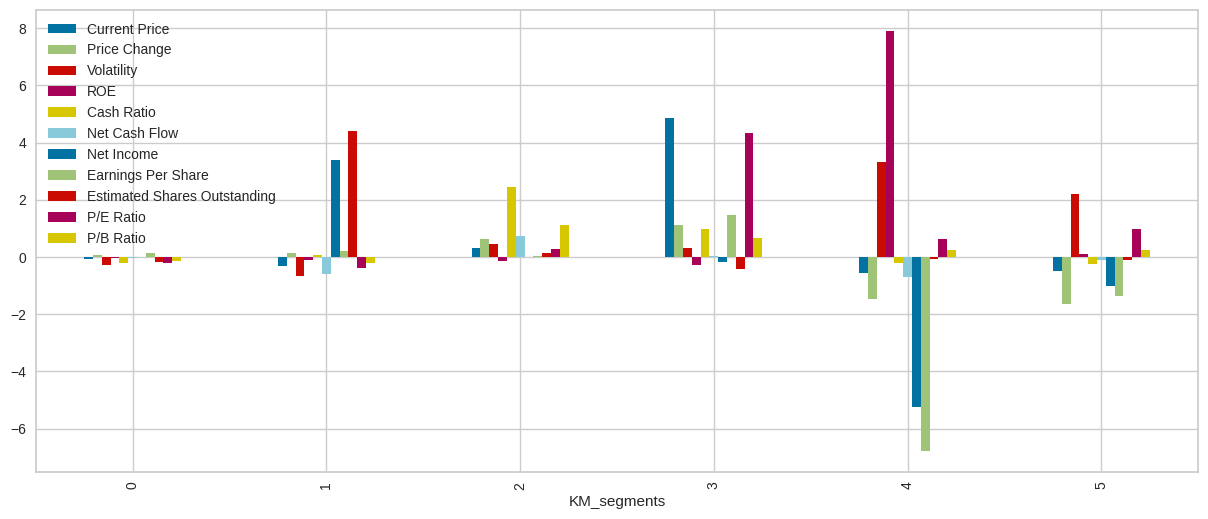

In [ ]:
k_means_df_6.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

##### Observations:





*   With cluster size equal to 4, the number of companies concerning the clusters as shown below:

Cluster | No. of companies
-|-
0 | 277
1 | 11
2 | 27
3 | 25

*   With cluster size equal to 5, the number of companies with respect to the clusters as shown below:

Cluster | No. of companies
-|-
0 | 30
1 | 275
2 | 21
3 | 11
4 | 3

*   With cluster size equal to 6, the number of companies with respect to the clusters as shown below:

Cluster | No. of companies
-|-
0 | 270
1 | 11
2 | 24
3 | 6
4 | 2
5 | 7

*   In the models with 5('kmeans_5') and 6('kmeans_6') clusters, some clusters have very few companies (such as 2, 3, 6 and 7), which seems to suggest that the variability is very low. Hence, we will not finalize these models.
*   The elbow plot seems to suggest a sharp elbow at 4 clusters. Also, the silhouette coefficient is highest for 4 clusters. Hence, we finalize the model 'kmeans_4' as the final model.

#### Final Model

In [ ]:
start_time_km = time()
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)
end_time_km = time()

In [ ]:
time_kmeans = end_time_km-start_time_km
print(f'Time taken to fit the entire dataset into 4 clusters using K-Mean Clustering: {time_kmeans} seconds.')

Time taken to fit the entire dataset into 4 clusters using K-Mean Clustering: 0.03307843208312988 seconds.


In [ ]:
# creating a copy of the original and the scaled dataset:
df_kmeans_cluster = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df_kmeans_cluster["KM_segments"] = kmeans.labels_

Cluster Profiling

In [ ]:
# Grouping the records using cluster labels:
km_cluster_profile = df_kmeans_cluster.groupby('KM_segments').mean()

In [ ]:
# Calculating number of rows in each cluster:
km_cluster_profile["count_in_each_segment"] = (
    df_kmeans_cluster.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
km_cluster_profile.style.highlight_min(color="lightgreen", axis=0)

In [ ]:
# Printing the companies in each cluster:
for cl in df_kmeans_cluster["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_kmeans_cluster[df_kmeans_cluster["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [ ]:
df_kmeans_cluster.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

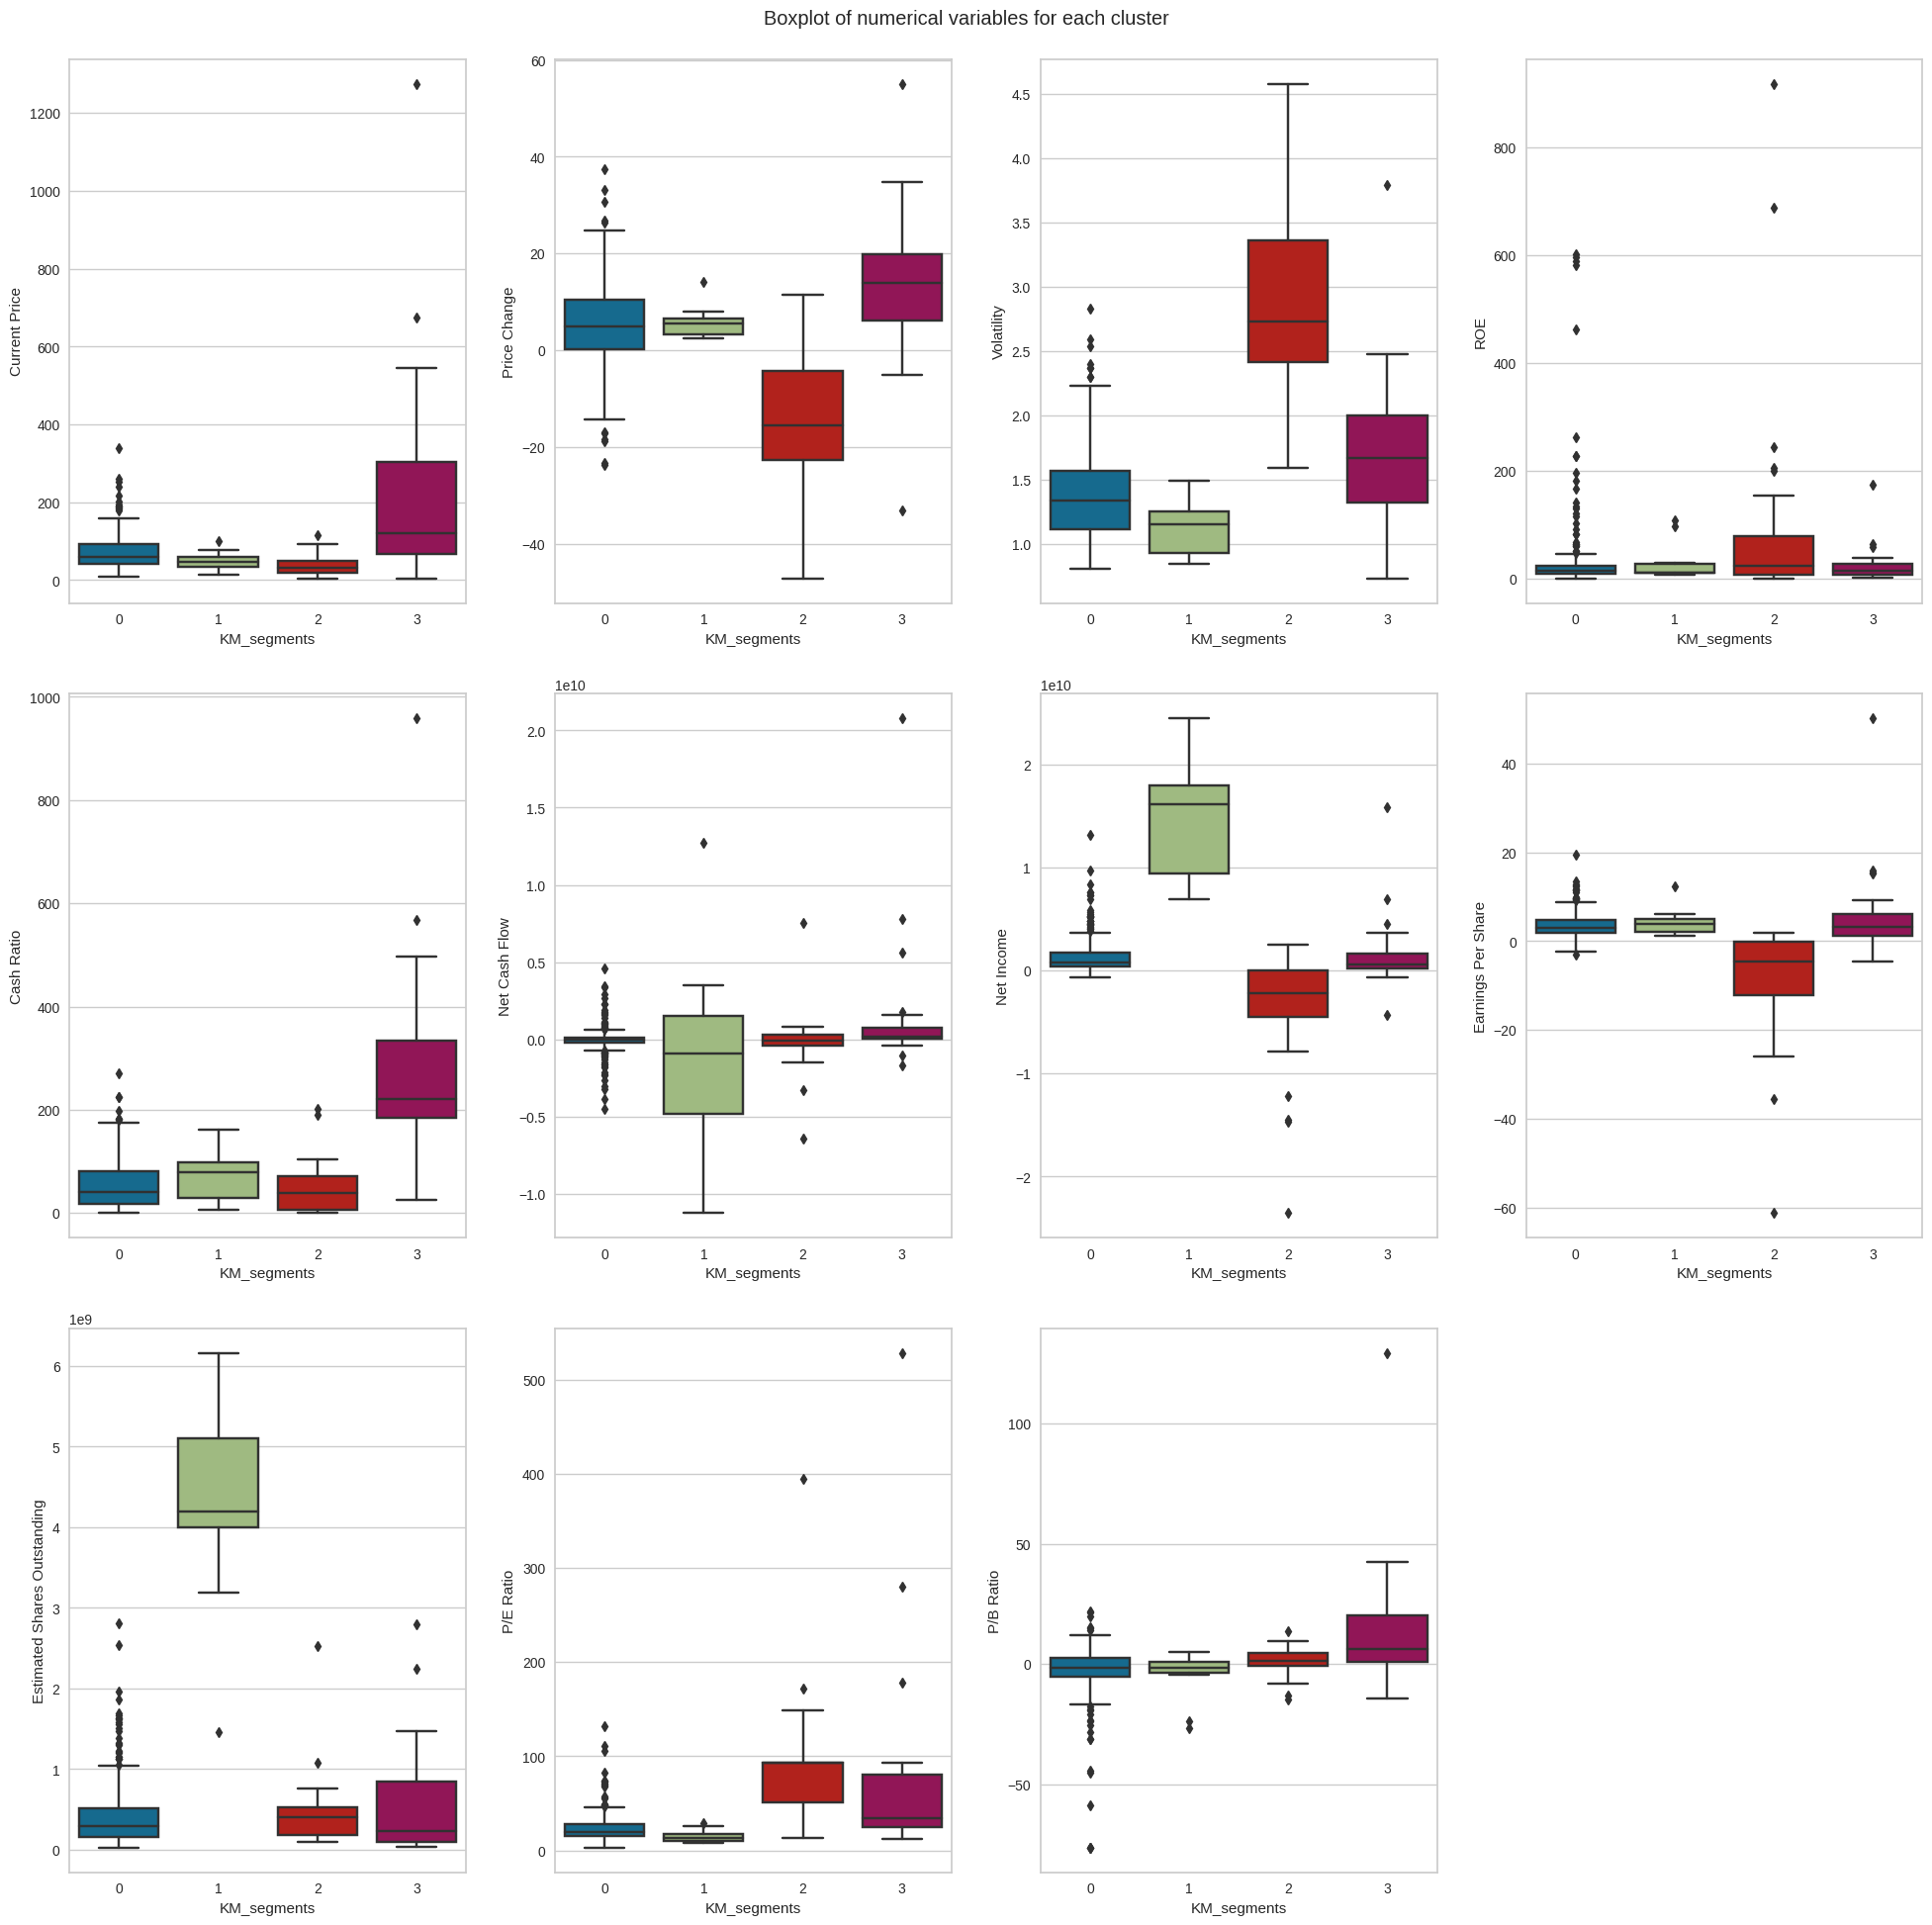

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_kmeans_cluster, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

**Insights from K-Means Clustering**:

*   Cluster 0:
    *   There are 277 companies in this cluster.
    *   The top 5 sectors to which the companies in this cluster belong are the Industrial, Financials, Consumer Discretionary, Health Care, and Real Estate sectors.
    *   This cluster is characterized by the lowest estimated shares outstanding.
    *   Also, on average this cluster has a negative net cash flow and P/B ratio.
     
*   Cluster 1:
    *   There are 11 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Financials, and Health Care sectors.
    *   This cluster is characterized by highest net income and estimated shares outstanding.
    *   This cluster has moderate cash ratio and earnings per share.
    *   This cluster also has the lowest volatility and P/E ratio.
    *   The net cash flow and P/B ratios are the least among clusters. Also, average of these attributes are negative.

*   Cluster 2:
    *   There are 27 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Energy, and Information Technology sectors.
    *   This cluster is characterized by highest volatility, ROE and P/E ratio.
    *   This cluster also has the lowest current stock prices and cash ratio.
    *   This cluster also has low net cash flow.
    *   The price change, net income, and earnings per share are the least among clusters. Also, the average of these attributes is negative.

*   Cluster 3:
    *   There are 25 companies in this cluster.
    *   The top 3 sectors to which the companies in this cluster belong are the Health Care, Consumer Discretionary, and Information Technology sectors.
    *   This cluster is characterized by the highest current stock prices, price change, cash ratio, net cash flow, earnings per share, and P/B ratio.
    *   This cluster also has the lowest ROE.


## **Hierarchical Clustering**

In [ ]:
# Creating a copy of the scaled data:
hc_df = subset_scaled_df.copy()

#### Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# Checking cophenetic correlations with Euclidean distance:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Observations:

*   The cophenetic correlation is maximum with average linkage.



#### Dendograms

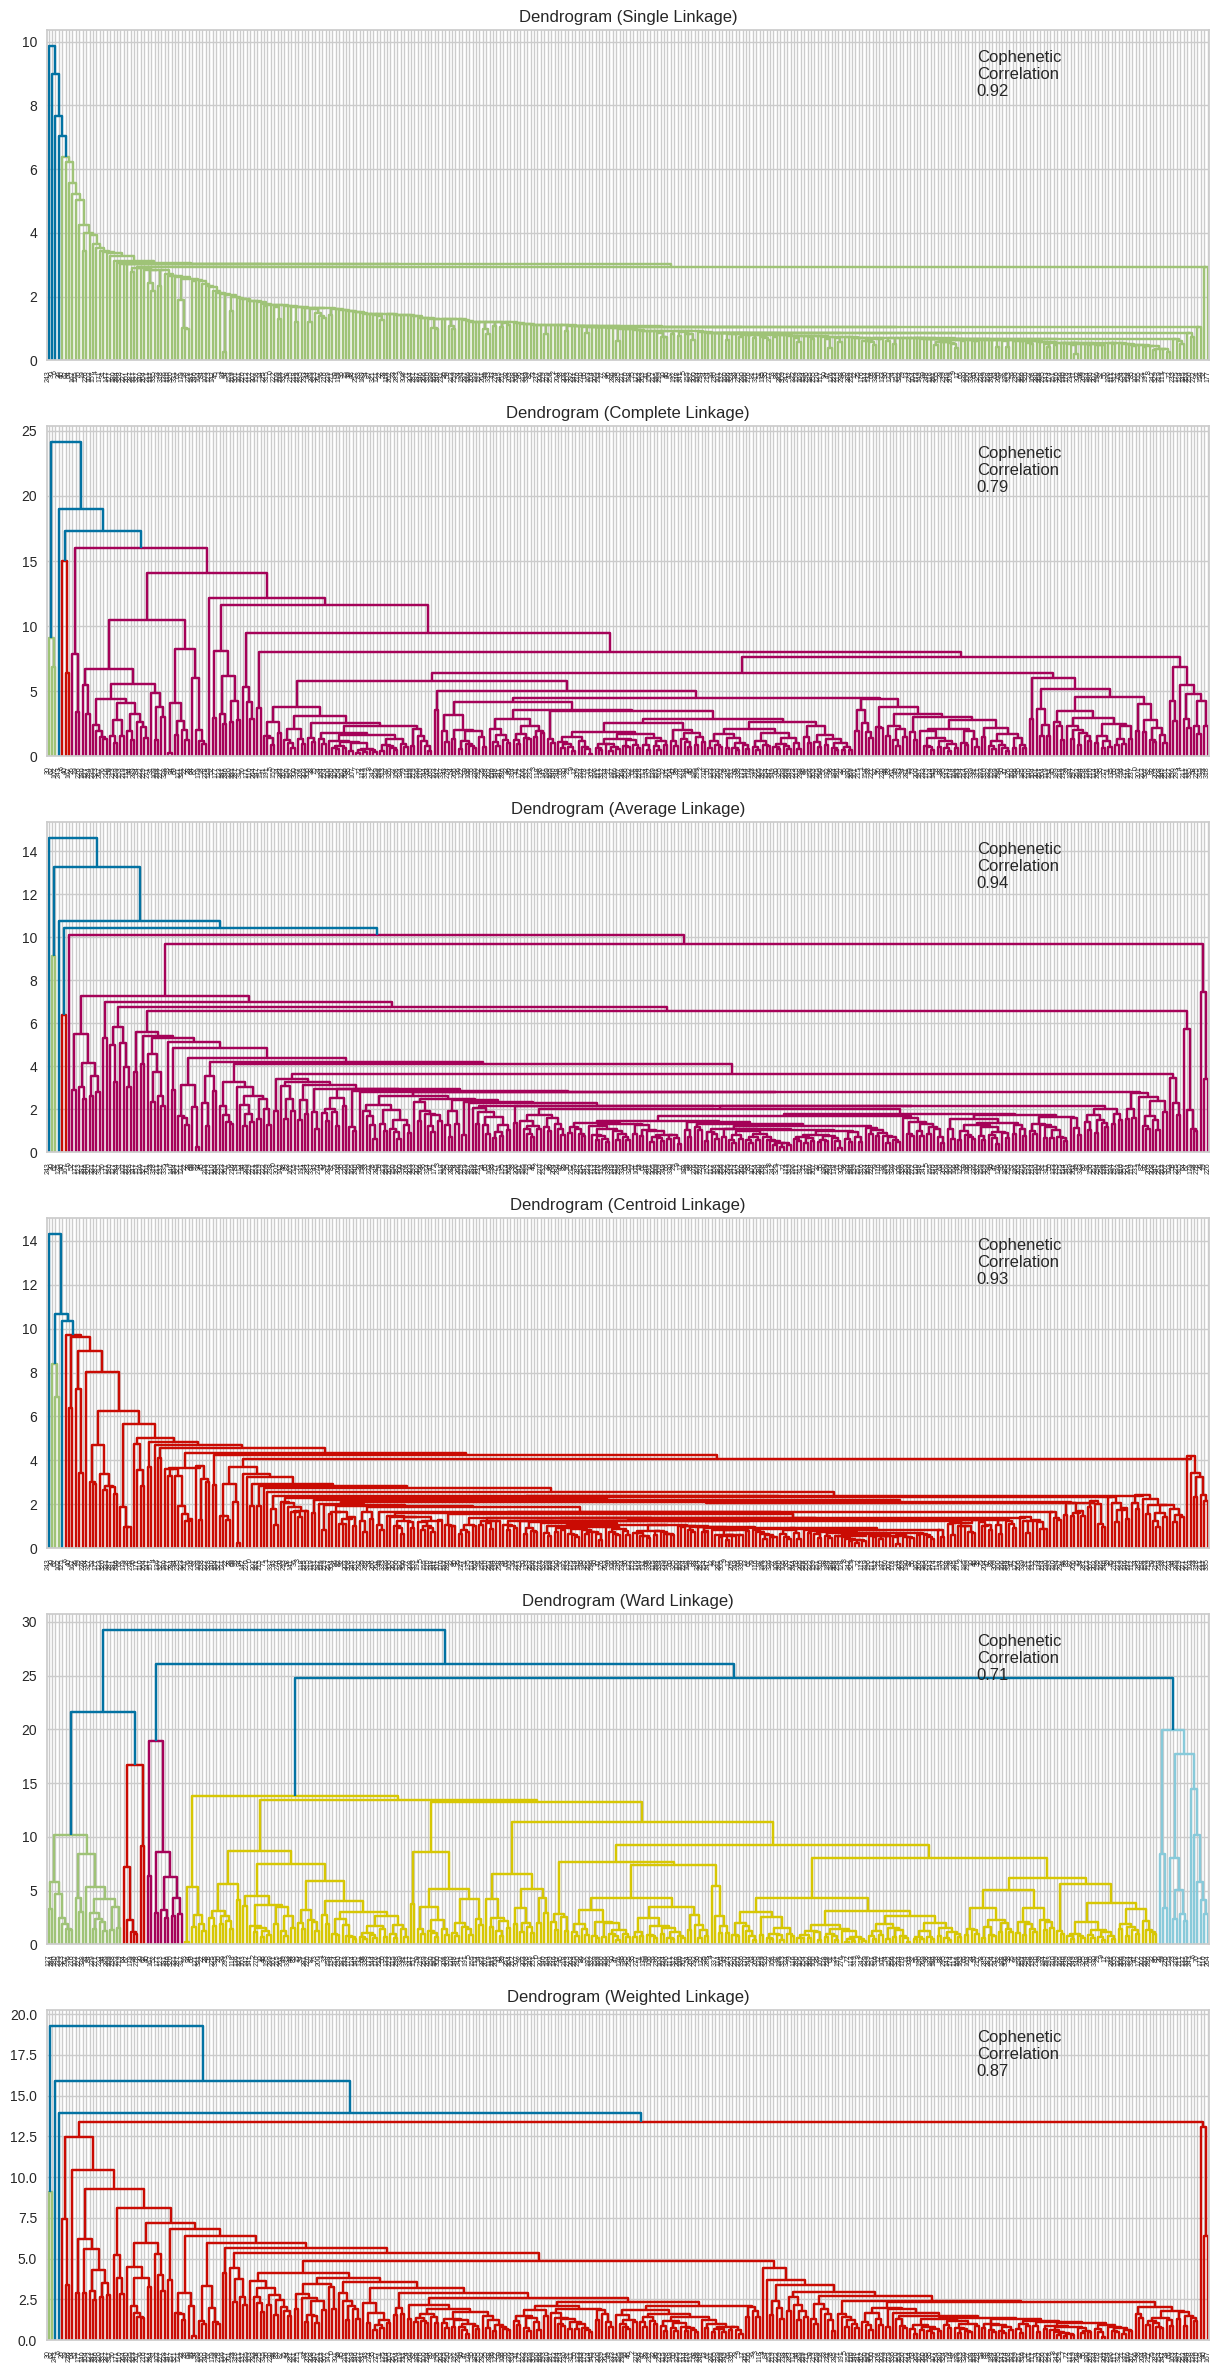

In [ ]:
start_time_dendogram = time()
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])
end_time_dendogram = time()

In [ ]:
time_dendogram = end_time_dendogram-start_time_dendogram
print(f'Time taken to print the different dendograms using euclidean distance and various linkages : {time_dendogram} seconds.')

Time taken to print the different dendograms using euclidean distance and various linkages : 5.467153310775757 seconds.


In [ ]:
# Creating and printing a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                 0.71012
1  complete                 0.78733
5  weighted                 0.86938
0    single                 0.92323
3  centroid                 0.93140
2   average                 0.94225

Observations:

*   The cophenetic correlation is highest for average and centroid linkage methods.
*   However, we will move ahead with ward linkage as it seems to produce the most balanced groups.
*   4 or 5 appears to be the appropriate number of clusters from the dendrogram for ward linkage. Hence, the clusters created using agglomerative clustering with Euclidean distance and ward linkage for cluster sizes 4 and 5 have been analyzed below.




#### Agglomerative clustering model with no of clusters = 4

In [ ]:
hc_model_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_model_4.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data and the scaled dataset:
hc_model_df_4 = df.copy()
hc_df_4 = subset_scaled_df.copy()

# Adding hierarchical cluster labels to the original and scaled dataframes:
hc_df_4["HC_segments"] = hc_model_4.labels_
hc_model_df_4["HC_segments"] = hc_model_4.labels_

Cluster Profiling using 4 clusters

In [ ]:
# Grouping the records using cluster labels:
hc_cluster_profile_4 = hc_model_df_4.groupby("HC_segments").mean()

In [ ]:
# Calculating number of rows in each cluster:
hc_cluster_profile_4["count_in_each_segment"] = (
    hc_model_df_4.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile_4.style.highlight_max(color="lightgreen", axis=0)

<Axes: xlabel='HC_segments'>

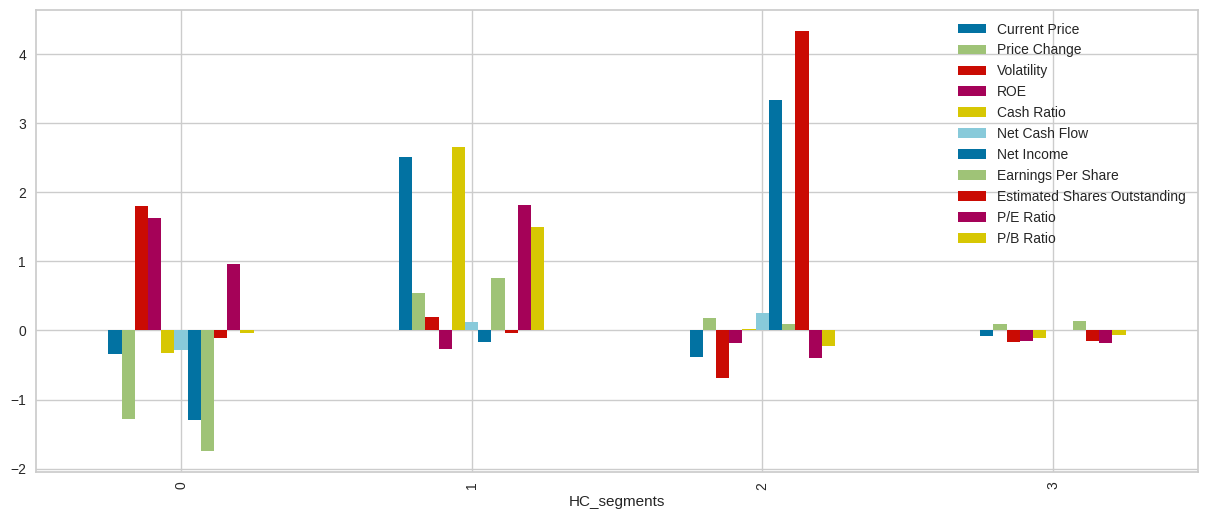

In [ ]:
hc_df_4.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

#### Agglomerative clustering model with no of clusters = 5

In [ ]:
hc_model_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_model_5.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
# Creating a copy of the original data and the scaled dataset:
hc_model_df_5 = df.copy()
hc_df_5 = subset_scaled_df.copy()

# Adding hierarchical cluster labels to the original and scaled dataframes:
hc_df_5["HC_segments"] = hc_model_5.labels_
hc_model_df_5["HC_segments"] = hc_model_5.labels_

Cluster Profiling using 5 clusters

In [ ]:
# Grouping the records using cluster labels:
hc_cluster_profile_5 = hc_model_df_5.groupby("HC_segments").mean()

In [ ]:
# Calculating number of rows in each cluster:
hc_cluster_profile_5["count_in_each_segment"] = (
    hc_model_df_5.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile_5.style.highlight_max(color="lightgreen", axis=0)

<Axes: xlabel='HC_segments'>

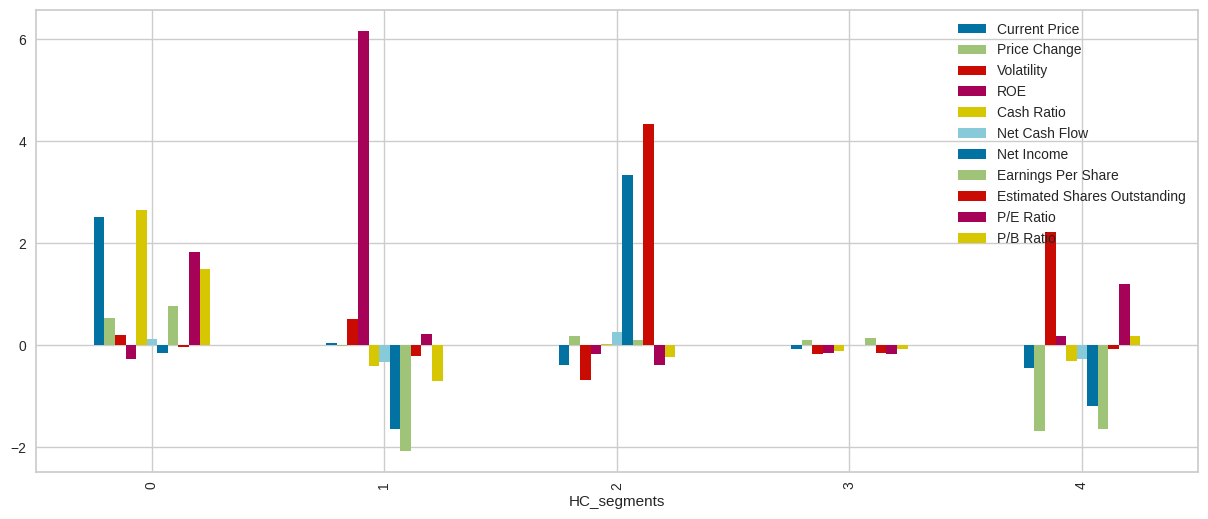

In [ ]:
hc_df_5.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

##### Observations:

*   With cluster size equal to 4, the number of companies with respect to the clusters as shown below:

Cluster | No. of companies
-|-
0 | 29
1 | 15
2 | 285
3 | 11

*   With cluster size equal to 5, the number of companies concerning the clusters as shown below:

Cluster | No. of companies
-|-
0 | 15
1 | 11
2 | 285
3 | 7
4 | 22

*   In both the models with 4('hc_model_4') and 5('hc_model_5') clusters, the clusters variability seems to be good.
*   Hence, we will move ahead with a 5 clustered model as there are 5 distinct color-coordinated groups in the dendrogram, and these 5 clusters will have data points that have higher similarity among themselves as compared to a 4 clustered model.

#### Final Model

In [ ]:
start_time_hc = time()
hc_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_model.fit(hc_df)
end_time_hc = time ()

In [ ]:
time_hc = end_time_hc-start_time_hc
print(f'Time taken to fit the entire dataset into 5 clusters using Agglomerative Clustering: {time_hc} seconds.')

Time taken to fit the entire dataset into 5 clusters using Agglomerative Clustering: 0.008890151977539062 seconds.


In [ ]:
# creating a copy of the original data
hc_model_df = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = hc_model.labels_
hc_model_df["HC_segments"] = hc_model.labels_

Cluster Profiling

In [ ]:
hc_cluster_profile = hc_model_df.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    hc_model_df.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
hc_cluster_profile.style.highlight_min(color="lightgreen", axis=0)

In [ ]:
## Print the companies in each cluster
for cl in hc_model_df["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(hc_model_df[hc_model_df["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [ ]:
hc_model_df.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

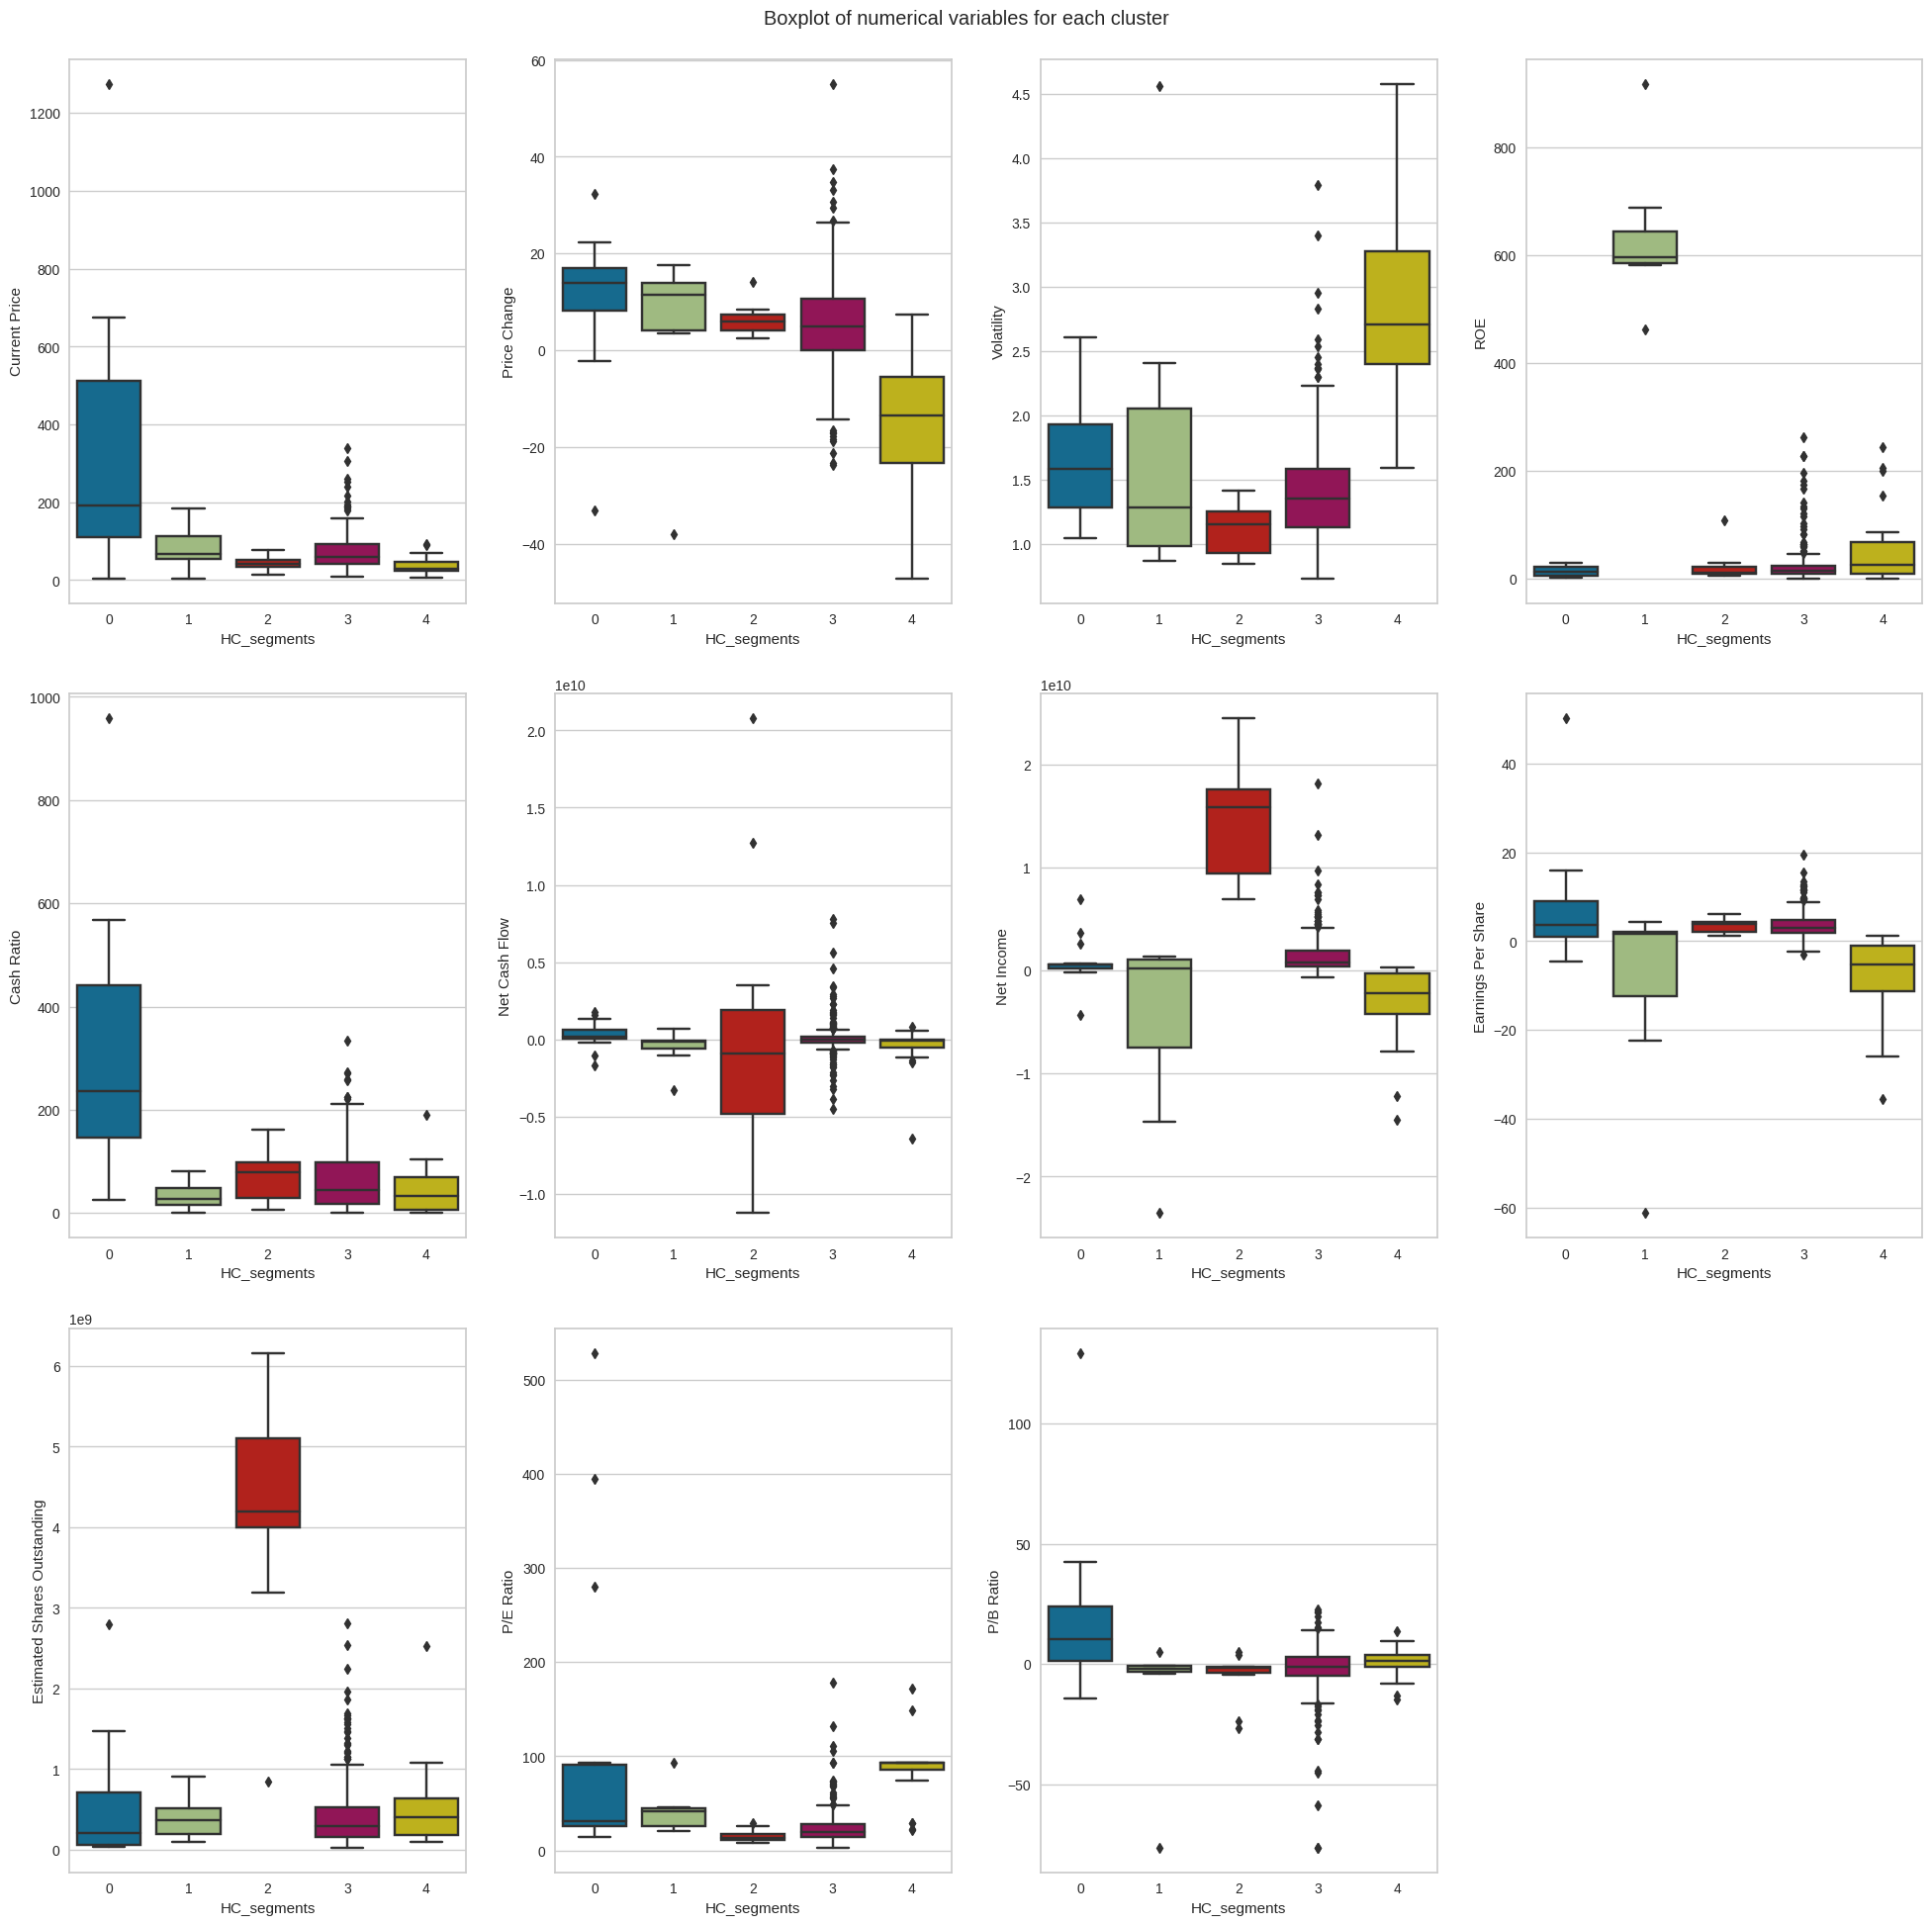

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hc_model_df, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Insights from Hierarchical Clustering**:

*   Cluster 0:
    *   There are 15 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Health Care, and Information Technology sectors.
    *   This cluster is characterized by highest current stock prices, price change, cash ratio, earnings per share, P/E ratio and P/B ratio.
    *   This cluster also has the lowest ROE among all the clusters.

*   Cluster 1:
    *   There are 7 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Consumer Staples and Energy sectors.
    *   This cluster is characterized by the highest ROE.
    *   This cluster also has the lowest estimated shares outstanding, and P/E ratio.
    *   The net cash flow, net income, earnings per share, and P/B ratio are the least among all the clusters. Also, the average of these attributes is negative.

*   Cluster 2:
    *   There are 11 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Financials and Telecommunications Services sectors.
    *   This cluster is characterized by the highest net cash flow, net income, and estimated shares outstanding.
    *   This cluster also has the lowest volatility and P/E ratio.
    *   The average value of P/B ratio is negative.

*   Cluster 3:
    *   There are 285 companies in this cluster.
    *   The top 5 sectors to which the companies in this cluster belong are the Industrials, Financials, Consumer Discretionary, Health Care and Information Technology sectors.
    *   This cluster is characterized by low Roe and  volatility.
    *   This cluster has a positive average price change and moderately low positive net cash flow.
    *   This cluster has a negative average P/B ratio.

*   Cluster 4:
    *   There are 22 companies in this cluster.
    *   The top sector to which the companies in this cluster belong is the Energy sector.
    *   This cluster is characterized by the highest volatility.
    *   This cluster is characterized by the lowest current share price and price change.
    *   This cluster also has modeerately high P/E ratio.
    *   This cluster has a negative average price change percentage, net cash flow, net income, and earnings per share.


## **K-means vs Hierarchical Clustering**

Q1: Which clustering technique took less time for execution?

*   Time taken to fit the entire dataset into 4 clusters using K-Mean Clustering: 0.03 seconds.
*   Time taken to fit the entire dataset into 5 clusters using Agglomerative Clustering: 0.01 seconds.
*   Time taken to print the different dendrograms using Euclidean distance and various linkages: 5.47 seconds.

Hence, we can conclude that both the clustering techniques took less than 0.1 secs to fit the entire dataset. However, plotting the various dendrograms took a few seconds.



Q2: How many clusters are obtained as the appropriate number of clusters from both algorithms?

*   For the K-means clustering technique:
    *   The elbow plot suggested that there were elbows at cluster sizes 4 and 8.
    *   Comparing the silhouette scores for cluster sizes 3 to 8 showed that cluster sizes 3 and 4 had the highest silhouette scores.
    *   Hence, we conclude that the appropriate number of clusters is 4.

*   For the Agglomerative (Hierarchical) clustering technique:
    *   The cophenetic correlation was highest for average and centroid linkage methods.
    *   However, we clustered based on the ward linkage as it seems to produce the most balanced groups.
    *   The appropriate number of clusters from the dendrogram for ward linkage is 5.

Q3: Which clustering technique gave you more distinct clusters, or are they the same?

 *   The K-Means clustering Algorithm gave us 4 distinct clusters, while the Hierarchical Clustering Algorithm suggested 5 distinct clusters.






Q4: How many observations are there in the similar clusters of both algorithms?

*   Both the clustering algorithms divided the dataset into two parts:
  *   a single cluster consisting of majority stocks and
  *   remaining clusters containing 7 to 29 stocks.






Differences or similarities in the cluster profiles from both the clustering techniques

*   The cluster with the highest number of companies are similar in terms of sectors.




## **Actionable Insights and Recommendations**

**Insights from K-Means Clustering**:

*   Cluster 0:
    *   There are 277 companies in this cluster.
    *   The top 5 sectors to which the companies in this cluster belong are the Industrial, Financials, Consumer Discretionary, Health Care, and Real Estate sectors.
    *   This cluster is characterized by the lowest estimated shares outstanding.
    *   Also, on average this cluster has a negative net cash flow and P/B ratio.
     
*   Cluster 1:
    *   There are 11 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Financials, and Health Care sectors.
    *   This cluster is characterized by highest net income and estimated shares outstanding.
    *   This cluster has moderate cash ratio and earnings per share.
    *   This cluster also has the lowest volatility and P/E ratio.
    *   The net cash flow and P/B ratios are the least among clusters. Also, average of these attributes are negative.

*   Cluster 2:
    *   There are 27 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Energy, and Information Technology sectors.
    *   This cluster is characterized by highest volatility, ROE and P/E ratio.
    *   This cluster also has the lowest current stock prices and cash ratio.
    *   This cluster also has low net cash flow.
    *   The price change, net income, and earnings per share are the least among clusters. Also, the average of these attributes is negative.

*   Cluster 3:
    *   There are 25 companies in this cluster.
    *   The top 3 sectors to which the companies in this cluster belong are the Health Care, Consumer Discretionary, and Information Technology sectors.
    *   This cluster is characterized by the highest current stock prices, price change, cash ratio, net cash flow, earnings per share, and P/B ratio.
    *   This cluster also has the lowest ROE.


**Observations on K-Means clusters**:

*   Cluster 0: This cluster has a diverse stock portfolio, and hence a relatively safe option. However, it may not yied highest profit.
*   Cluster 1: This cluster is a moderately good stock portfolio as it has  highest net income and estimated shares outstanding, moderate earnings per share, and lowest volatility and net cash flow. However, this cluster has the least number of companies, and hence not the most diverse option.
*   Cluster 2: This cluster is a high risk stock portfolio as it has high volatility, low current price, negative price change, and negative earnings per share.
*   Cluster 3: This cluster is a strong and promising portfolio as it has the highest current stock prices, price change, cash ratio, net cash flow, earnings per share, and P/B ratio.



**Insights from Hierarchical Clustering**:

*   Cluster 0:
    *   There are 15 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Health Care, and Information Technology sectors.
    *   This cluster is characterized by highest current stock prices, price change, cash ratio, earnings per share, P/E ratio and P/B ratio.
    *   This cluster also has the lowest ROE among all the clusters.

*   Cluster 1:
    *   There are 7 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Consumer Staples and Energy sectors.
    *   This cluster is characterized by the highest ROE.
    *   This cluster also has the lowest estimated shares outstanding, and P/E ratio.
    *   The net cash flow, net income, earnings per share, and P/B ratio are the least among all the clusters. Also, the average of these attributes is negative.

*   Cluster 2:
    *   There are 11 companies in this cluster.
    *   The top 2 sectors to which the companies in this cluster belong are the Financials and Telecommunications Services sectors.
    *   This cluster is characterized by the highest net cash flow, net income, and estimated shares outstanding.
    *   This cluster also has the lowest volatility and P/E ratio.
    *   The average value of P/B ratio is negative.

*   Cluster 3:
    *   There are 285 companies in this cluster.
    *   The top 5 sectors to which the companies in this cluster belong are the Industrials, Financials, Consumer Discretionary, Health Care and Information Technology sectors.
    *   This cluster is characterized by low ROE and  volatility.
    *   This cluster has a positive average price change and moderately low positive net cash flow.
    *   This cluster has a negative average P/B ratio.

*   Cluster 4:
    *   There are 22 companies in this cluster.
    *   The top sector to which the companies in this cluster belong is the Energy sector.
    *   This cluster is characterized by the highest volatility.
    *   This cluster is characterized by the lowest current share price and price change.
    *   This cluster also has moderately high P/E ratio.
    *   This cluster has a negative average price change percentage, net cash flow, net income, and earnings per share.


**Observations on Hierarchical clusters**:

*   Cluster 3: This cluster has a diverse stock portfolio, and hence a relatively safe option. However, it may not yield the highest profit.
*   Cluster 1 and Cluster 4: These clusters are relatively high-risk portfolios since Cluster 4 has ha highest volatility and low current price and negative price change and both clusters have low net cash flow, net income, and earnings per share.
*   Cluster 2: This cluster is a strong and promising stock portfolio as it has high net cash flow, net income, and estimated shares outstanding, and low volatility. However, this cluster is the least diverse in terms of the number of companies to invest in as compared to other clusters.
*   Cluster 0: This cluster is a moderately strong stock portfolio as it has a price change, cash ratio, and earnings per share are high. However, this cluster could be risky because of the high current price, P/E, and P/B ratios.



**Insights from EDA and Recommendations**:

*   Sectors with the highest increase in stock prices are Health Care, Consumer Staples, Information Technology and Telecommunications Services, while Engergy sector has the highest decrease in stock prices.
*   Information Technology sector has the highest cash ratio followed by Telecommunication Sevices, Health Care, Financials, and Consumer Staples sectors while the Utilities sector has the least.
*   The companies in the Energy sector have the highest P/E ratio followed by Information Technology, Real Estate, Health Care, and Consumer Discretionary sectors while the Telecommunications Sevices sector has the least.
*   Among the sub industries, Casinos & Gaming has the highest positive price changes followed by Semiconductor Equipment and Alternative Carriers, while Copper has the highest negative price change, followed by Technology Hardware, Storage & Peripherals.
*   Among the sub industries, Biotechnology has the highest cash ratio followed by Internet Software & Services and Gold, while Trucking has the least, followed by Environmental Services.
*   Among the sub industries, Internet & Direct Marketing Retail has the highest P/E  ratio followed by Office REITs and Oil & Gas Exploration & Production, while Alternative Carriers has the least, followed by Automobile Manufacturers.
*   Clusters with multiple negative attributes should be choosen with care, if need be.
*   Trade&Ahead should first identify the financial goals, risk tolerance, and investment behaviors of their clilents to recommend a cluster as a potential portfolio of stocks which will fit their needs.
*   Alternatively, Trade&Ahead could use these clusters as a starting point for further financial statement analysis, particularly which individual stocks do not fit the "profile" of the cluster.
*   Trade&Ahead can also look into the historical performance of the stocks to have a better understanding to recommend various stock options to their clients.



In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert --to html Trade_n_Ahead_FullCode_NehaBiswas.ipynb

[NbConvertApp] Converting notebook Trade_n_Ahead_FullCode_NehaBiswas.ipynb to html
[NbConvertApp] Writing 10261879 bytes to Trade_n_Ahead_FullCode_NehaBiswas.html
